DATASET EXPLORATION - AFS-BERT PROJECT

Dataset: ADHD
Shape: (37109, 10)
Columns: ['author', 'body', 'created_utc', 'id', 'num_comments', 'score', 'subreddit', 'title', 'upvote_ratio', 'url']

First 2 rows:
                author                                               body  \
0  HotConversation1273  A few months ago I was accepted into this full...   
1           snorefestt  Hey guys, I was curious if anyone else has the...   

                created_utc      id  num_comments  score subreddit  \
0  2021-12-22T18:32:56.000Z  rmbjwb             1      1      ADHD   
1  2021-12-22T18:24:25.000Z  rmbd1y             3      5      ADHD   

                                               title  upvote_ratio  \
0    I get extremely anxious if I’m not working 24/7           1.0   
1  I can't will myself to clean my own house, but...           1.0   

                                                 url  
0  https://www.reddit.com/r/ADHD/comments/rmbjwb/...  
1  https://www.reddit.com/r/A

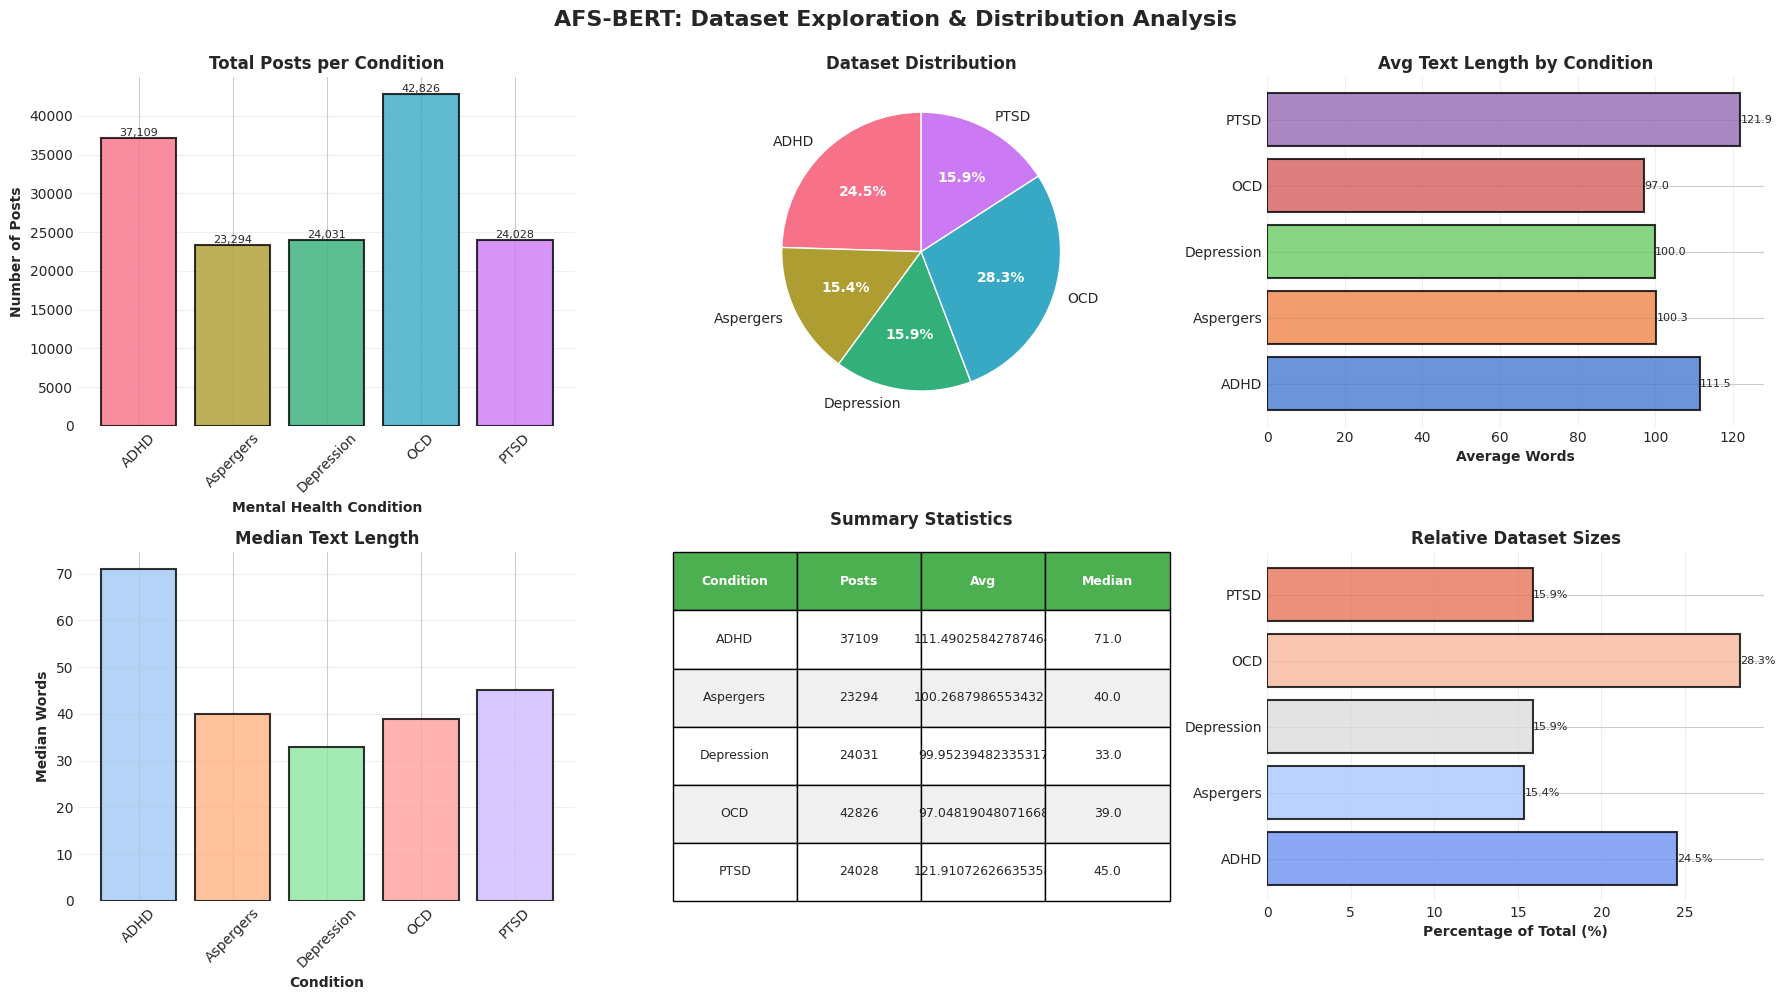


DATASET SUMMARY FOR AFS-BERT
 Condition  Total_Posts  Avg_Length  Median_Length Text_Column
      ADHD        37109  111.490258           71.0        body
 Aspergers        23294  100.268799           40.0        body
Depression        24031   99.952395           33.0        body
       OCD        42826   97.048190           39.0        body
      PTSD        24028  121.910726           45.0        body

Total Posts Across All Conditions: 151,288
Average Posts per Condition: 30257.6


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import os

# Set plotting style for AFS-BERT project
sns.set_style("whitegrid")
sns.set_palette("husl")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 10

# Create output directory for plots
os.makedirs('afs_bert_plots', exist_ok=True)

# Load all datasets
datasets = {
    'ADHD': pd.read_csv('/kaggle/input/reddit/adhd.csv'),
    'Aspergers': pd.read_csv('/kaggle/input/reddit/aspergers.csv'),
    'Depression': pd.read_csv('/kaggle/input/reddit/depression.csv'),
    'OCD': pd.read_csv('/kaggle/input/reddit/ocd.csv'),
    'PTSD': pd.read_csv('/kaggle/input/reddit/ptsd.csv')
}

# Explore structure
print("="*80)
print("DATASET EXPLORATION - AFS-BERT PROJECT")
print("="*80)

dataset_stats = []

for name, df in datasets.items():
    print(f"\n{'='*80}")
    print(f"Dataset: {name}")
    print(f"{'='*80}")
    print(f"Shape: {df.shape}")
    print(f"Columns: {df.columns.tolist()}")
    print(f"\nFirst 2 rows:")
    print(df.head(2))
    print(f"\nData types:")
    print(df.dtypes)
    print(f"\nMissing values:")
    print(df.isnull().sum())
    print(f"\nSample text (if available):")
    # Try to find text column
    text_cols = [col for col in df.columns if any(keyword in col.lower() for keyword in ['text', 'post', 'content', 'body', 'selftext'])]
    if text_cols:
        sample_text = df[text_cols[0]].iloc[0] if len(df) > 0 else "No data"
        print(f"{sample_text[:200]}...")
        
        # Collect statistics
        text_lengths = df[text_cols[0]].dropna().apply(lambda x: len(str(x).split()))
        dataset_stats.append({
            'Condition': name,
            'Total_Posts': len(df),
            'Avg_Length': text_lengths.mean(),
            'Median_Length': text_lengths.median(),
            'Text_Column': text_cols[0]
        })
    else:
        print("No obvious text column found")

stats_df = pd.DataFrame(dataset_stats)

# ============================================================================
# PLOT 1: DATASET DISTRIBUTION PLOTS
# ============================================================================

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('AFS-BERT: Dataset Exploration & Distribution Analysis', 
             fontsize=16, fontweight='bold', y=0.995)

# Plot 1.1: Total Posts
ax1 = axes[0, 0]
bars1 = ax1.bar(stats_df['Condition'], stats_df['Total_Posts'], 
                color=sns.color_palette("husl", len(stats_df)), 
                edgecolor='black', linewidth=1.5, alpha=0.8)
ax1.set_title('Total Posts per Condition', fontweight='bold')
ax1.set_xlabel('Mental Health Condition', fontweight='bold')
ax1.set_ylabel('Number of Posts', fontweight='bold')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}', ha='center', va='bottom', fontsize=8)

# Plot 1.2: Pie Chart
ax2 = axes[0, 1]
colors = sns.color_palette("husl", len(stats_df))
wedges, texts, autotexts = ax2.pie(stats_df['Total_Posts'], 
                                     labels=stats_df['Condition'],
                                     autopct='%1.1f%%',
                                     colors=colors,
                                     startangle=90)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
ax2.set_title('Dataset Distribution', fontweight='bold')

# Plot 1.3: Average Text Length
ax3 = axes[0, 2]
bars3 = ax3.barh(stats_df['Condition'], stats_df['Avg_Length'],
                 color=sns.color_palette("muted", len(stats_df)),
                 edgecolor='black', linewidth=1.5, alpha=0.8)
ax3.set_xlabel('Average Words', fontweight='bold')
ax3.set_title('Avg Text Length by Condition', fontweight='bold')
ax3.grid(axis='x', alpha=0.3)
for bar in bars3:
    width = bar.get_width()
    ax3.text(width, bar.get_y() + bar.get_height()/2.,
            f'{width:.1f}', ha='left', va='center', fontsize=8)

# Plot 1.4: Median Text Length
ax4 = axes[1, 0]
ax4.bar(stats_df['Condition'], stats_df['Median_Length'],
        color=sns.color_palette("pastel", len(stats_df)),
        edgecolor='black', linewidth=1.5, alpha=0.8)
ax4.set_title('Median Text Length', fontweight='bold')
ax4.set_xlabel('Condition', fontweight='bold')
ax4.set_ylabel('Median Words', fontweight='bold')
ax4.tick_params(axis='x', rotation=45)
ax4.grid(axis='y', alpha=0.3)

# Plot 1.5: Comparison Table
ax5 = axes[1, 1]
ax5.axis('off')
table_data = stats_df[['Condition', 'Total_Posts', 'Avg_Length', 'Median_Length']].values
table = ax5.table(cellText=table_data,
                  colLabels=['Condition', 'Posts', 'Avg', 'Median'],
                  cellLoc='center',
                  loc='center',
                  bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2)
for i in range(len(stats_df) + 1):
    for j in range(4):
        cell = table[(i, j)]
        if i == 0:
            cell.set_facecolor('#4CAF50')
            cell.set_text_props(weight='bold', color='white')
        else:
            cell.set_facecolor('#f0f0f0' if i % 2 == 0 else 'white')
ax5.set_title('Summary Statistics', fontweight='bold', pad=20)

# Plot 1.6: Dataset Size Comparison
ax6 = axes[1, 2]
total_posts = stats_df['Total_Posts'].sum()
percentages = (stats_df['Total_Posts'] / total_posts * 100).values
y_pos = np.arange(len(stats_df))
bars6 = ax6.barh(y_pos, percentages,
                 color=sns.color_palette("coolwarm", len(stats_df)),
                 edgecolor='black', linewidth=1.5, alpha=0.8)
ax6.set_yticks(y_pos)
ax6.set_yticklabels(stats_df['Condition'])
ax6.set_xlabel('Percentage of Total (%)', fontweight='bold')
ax6.set_title('Relative Dataset Sizes', fontweight='bold')
ax6.grid(axis='x', alpha=0.3)
for i, bar in enumerate(bars6):
    width = bar.get_width()
    ax6.text(width, bar.get_y() + bar.get_height()/2.,
            f'{width:.1f}%', ha='left', va='center', fontsize=8)

plt.tight_layout()
plt.savefig('afs_bert_plots/step1_dataset_exploration.png', dpi=300, bbox_inches='tight')
print("\n" + "="*80)
print("✅ PLOT 1 SAVED: afs_bert_plots/step1_dataset_exploration.png")
print("="*80)
plt.show()

# Print summary
print("\n" + "="*80)
print("DATASET SUMMARY FOR AFS-BERT")
print("="*80)
print(stats_df.to_string(index=False))
print(f"\nTotal Posts Across All Conditions: {stats_df['Total_Posts'].sum():,}")
print(f"Average Posts per Condition: {stats_df['Total_Posts'].mean():.1f}")
print("="*80)


STANDARDIZING DATASETS - AFS-BERT PROJECT

Processing ADHD...
  ✅ ADHD: 37109 posts

Processing Aspergers...
  ✅ Aspergers: 23294 posts

Processing Depression...
  ✅ Depression: 24031 posts

Processing OCD...
  ✅ OCD: 42826 posts

Processing PTSD...
  ✅ PTSD: 24028 posts

COMBINED DATASET
Total posts: 151288

Condition distribution:
condition
OCD           42826
ADHD          37109
Depression    24031
PTSD          24028
Aspergers     23294
Name: count, dtype: int64

Text length statistics:
count    151288.000000
mean        605.915598
std         981.065011
min           9.000000
25%          58.000000
50%         273.000000
75%         804.000000
max       40126.000000
Name: text_length, dtype: float64

Posts with text length < 10: 1

SAMPLE POSTS FROM EACH CONDITION

ADHD:
--------------------------------------------------------------------------------
Text: I get extremely anxious if I’m not working 24/7. A few months ago I was accepted into this full time software engineering fell

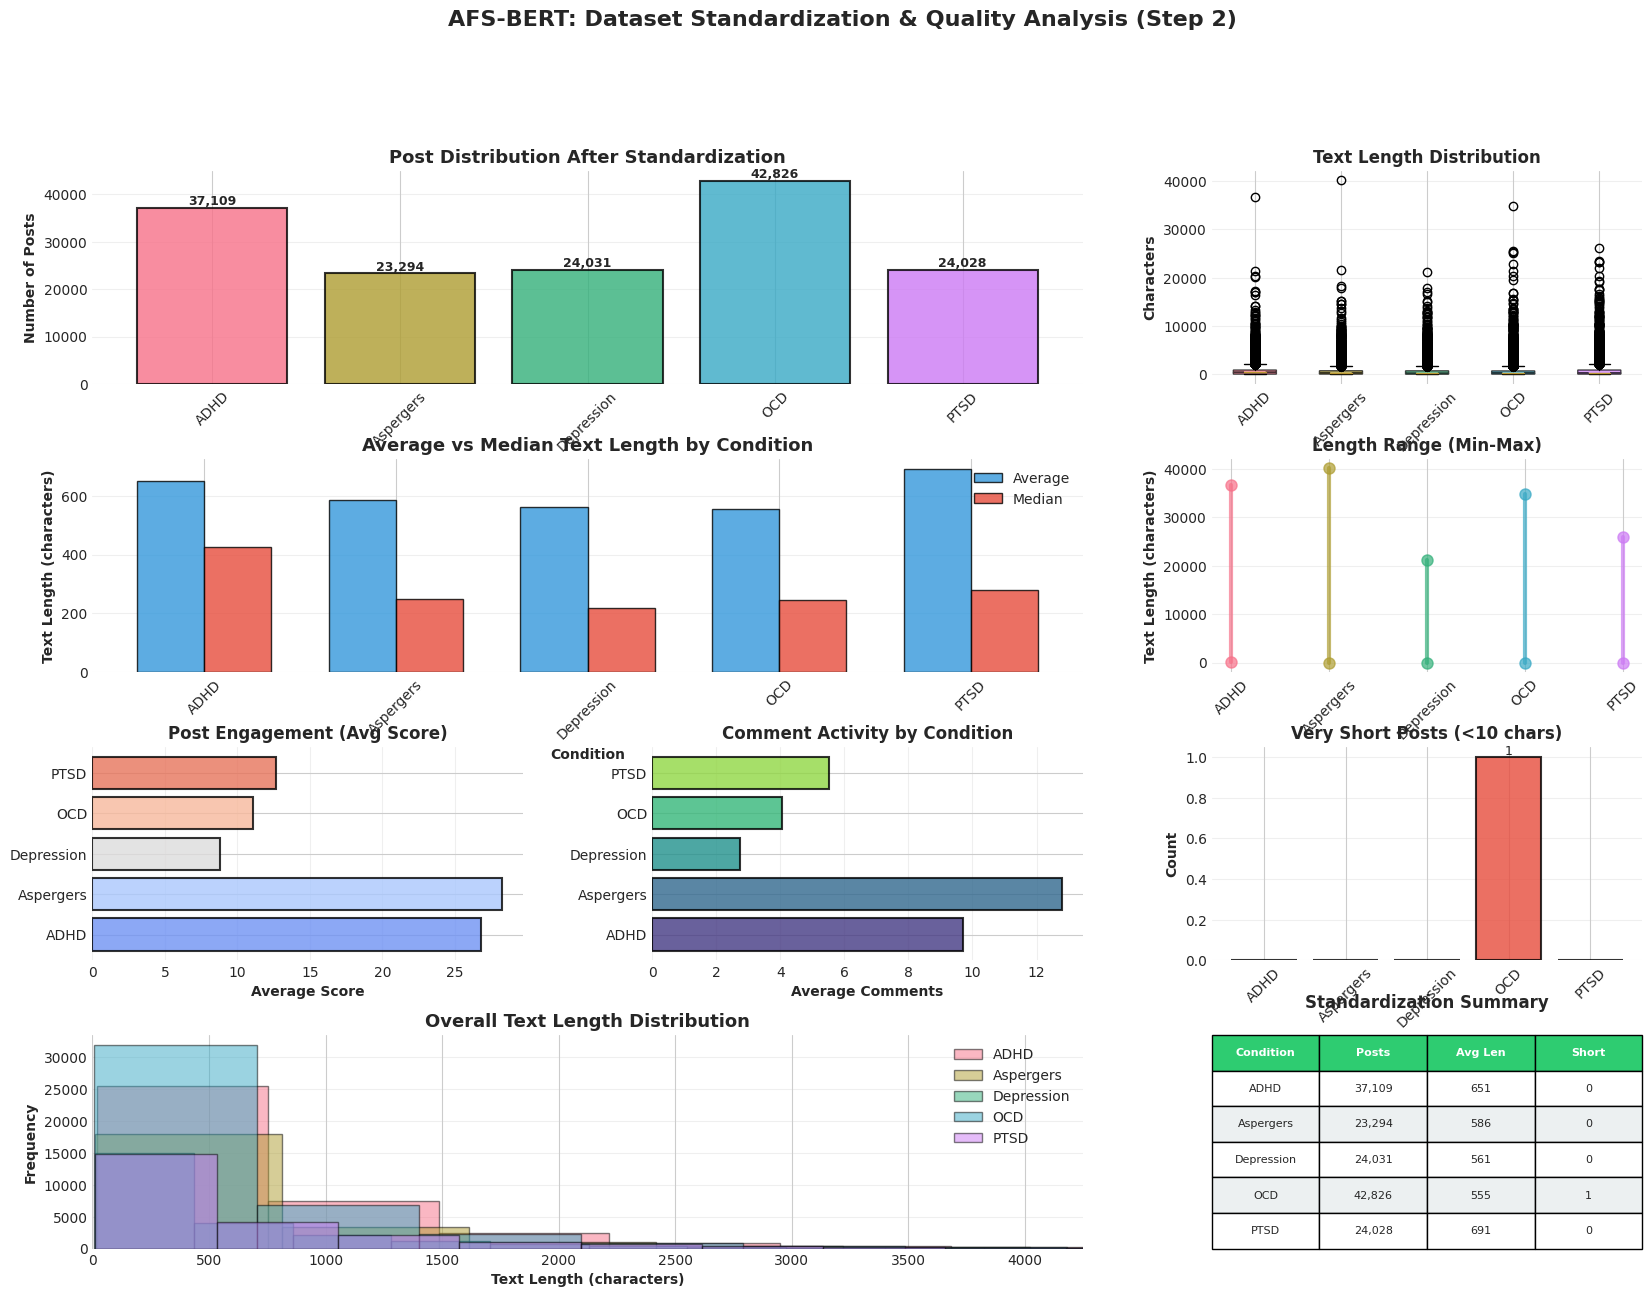


✅ Step 2 complete!

Combined dataset shape: (151288, 10)
Columns: ['title', 'body', 'text', 'condition', 'score', 'num_comments', 'created_utc', 'subreddit', 'author', 'text_length']

STANDARDIZATION SUMMARY
 Condition  Count  Avg_Length  Median_Length  Min_Length  Max_Length  Avg_Score  Avg_Comments  Very_Short
      ADHD  37109  651.047293          425.0          21       36629  26.799698      9.709154           0
 Aspergers  23294  585.639306          249.0          12       40126  28.287456     12.799433           0
Depression  24031  561.341476          217.0          12       21183   8.830219      2.741958           0
       OCD  42826  555.134568          246.0           9       34777  11.055597      4.069561           1
      PTSD  24028  690.959422          278.0          12       26041  12.694232      5.518770           0


In [20]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import os

# Ensure plot directory exists
os.makedirs('afs_bert_plots', exist_ok=True)

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300

# ============================================================================
# STEP 2: STANDARDIZE AND CLEAN DATASETS
# ============================================================================

def standardize_dataset(df, condition_name):
    """
    Standardize dataset to common format
    Combines 'title' and 'body' into single text field
    """
    standardized_df = pd.DataFrame()

    # Combine title and body for richer context
    # Many Reddit posts have important info in both title and body
    standardized_df['title'] = df['title'].fillna('')
    standardized_df['body'] = df['body'].fillna('')

    # Combine: "Title. Body"
    standardized_df['text'] = (
        standardized_df['title'].astype(str) + '. ' +
        standardized_df['body'].astype(str)
    )

    # Add condition label
    standardized_df['condition'] = condition_name

    # Add metadata
    standardized_df['score'] = df['score']
    standardized_df['num_comments'] = df['num_comments']
    standardized_df['created_utc'] = df['created_utc']
    standardized_df['subreddit'] = df['subreddit']
    standardized_df['author'] = df['author']

    return standardized_df

# Standardize all datasets
print("="*80)
print("STANDARDIZING DATASETS - AFS-BERT PROJECT")
print("="*80)

standardized_datasets = {}
for name, df in datasets.items():
    print(f"\nProcessing {name}...")
    standardized_datasets[name] = standardize_dataset(df, name)
    print(f"  ✅ {name}: {len(standardized_datasets[name])} posts")

# Combine into single dataset
combined_df = pd.concat(standardized_datasets.values(), ignore_index=True)

print(f"\n{'='*80}")
print(f"COMBINED DATASET")
print(f"{'='*80}")
print(f"Total posts: {len(combined_df)}")
print(f"\nCondition distribution:")
print(combined_df['condition'].value_counts())

# Check for empty or very short texts
combined_df['text_length'] = combined_df['text'].str.len()

print(f"\nText length statistics:")
print(combined_df['text_length'].describe())

# Filter out very short texts (less than 10 characters)
print(f"\nPosts with text length < 10: {(combined_df['text_length'] < 10).sum()}")

# Show sample from each condition
print(f"\n{'='*80}")
print("SAMPLE POSTS FROM EACH CONDITION")
print(f"{'='*80}")

for condition in combined_df['condition'].unique():
    print(f"\n{condition}:")
    print("-" * 80)
    sample = combined_df[combined_df['condition'] == condition].iloc[0]
    print(f"Text: {sample['text'][:300]}...")
    print(f"Length: {sample['text_length']} characters")

# ============================================================================
# PLOT 2: DATASET STANDARDIZATION & QUALITY ANALYSIS
# ============================================================================

fig = plt.figure(figsize=(20, 14))
gs = fig.add_gridspec(4, 3, hspace=0.35, wspace=0.3)
fig.suptitle('AFS-BERT: Dataset Standardization & Quality Analysis (Step 2)', 
             fontsize=16, fontweight='bold', y=0.995)

# Prepare data for plotting
condition_stats = []
for condition in combined_df['condition'].unique():
    condition_data = combined_df[combined_df['condition'] == condition]
    condition_stats.append({
        'Condition': condition,
        'Count': len(condition_data),
        'Avg_Length': condition_data['text_length'].mean(),
        'Median_Length': condition_data['text_length'].median(),
        'Min_Length': condition_data['text_length'].min(),
        'Max_Length': condition_data['text_length'].max(),
        'Avg_Score': condition_data['score'].mean(),
        'Avg_Comments': condition_data['num_comments'].mean(),
        'Very_Short': (condition_data['text_length'] < 10).sum()
    })
stats_summary = pd.DataFrame(condition_stats)

# Plot 2.1: Condition Distribution (Bar Chart)
ax1 = fig.add_subplot(gs[0, :2])
colors = sns.color_palette("husl", len(stats_summary))
bars = ax1.bar(stats_summary['Condition'], stats_summary['Count'],
               color=colors, edgecolor='black', linewidth=1.5, alpha=0.8)
ax1.set_title('Post Distribution After Standardization', fontsize=13, fontweight='bold')
ax1.set_xlabel('Mental Health Condition', fontweight='bold')
ax1.set_ylabel('Number of Posts', fontweight='bold')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}', ha='center', va='bottom', fontsize=9, fontweight='bold')

# Plot 2.2: Text Length Distribution (Box Plot)
ax2 = fig.add_subplot(gs[0, 2])
text_length_data = [combined_df[combined_df['condition'] == cond]['text_length'].values 
                    for cond in stats_summary['Condition']]
bp = ax2.boxplot(text_length_data, labels=stats_summary['Condition'], 
                 patch_artist=True, notch=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
ax2.set_title('Text Length Distribution', fontsize=12, fontweight='bold')
ax2.set_ylabel('Characters', fontweight='bold')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

# Plot 2.3: Average Text Length Comparison
ax3 = fig.add_subplot(gs[1, :2])
x_pos = np.arange(len(stats_summary))
width = 0.35
bars1 = ax3.bar(x_pos - width/2, stats_summary['Avg_Length'], width,
                label='Average', color='#3498db', edgecolor='black', alpha=0.8)
bars2 = ax3.bar(x_pos + width/2, stats_summary['Median_Length'], width,
                label='Median', color='#e74c3c', edgecolor='black', alpha=0.8)
ax3.set_xlabel('Condition', fontweight='bold')
ax3.set_ylabel('Text Length (characters)', fontweight='bold')
ax3.set_title('Average vs Median Text Length by Condition', fontsize=13, fontweight='bold')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(stats_summary['Condition'], rotation=45)
ax3.legend(loc='upper right')
ax3.grid(axis='y', alpha=0.3)

# Plot 2.4: Min-Max Length Range
ax4 = fig.add_subplot(gs[1, 2])
for i, row in stats_summary.iterrows():
    ax4.plot([i, i], [row['Min_Length'], row['Max_Length']], 
             'o-', linewidth=3, markersize=8, color=colors[i], alpha=0.7)
ax4.set_xticks(range(len(stats_summary)))
ax4.set_xticklabels(stats_summary['Condition'], rotation=45)
ax4.set_ylabel('Text Length (characters)', fontweight='bold')
ax4.set_title('Length Range (Min-Max)', fontsize=12, fontweight='bold')
ax4.grid(axis='y', alpha=0.3)

# Plot 2.5: Post Engagement Metrics (Score)
ax5 = fig.add_subplot(gs[2, 0])
ax5.barh(stats_summary['Condition'], stats_summary['Avg_Score'],
         color=sns.color_palette("coolwarm", len(stats_summary)),
         edgecolor='black', linewidth=1.5, alpha=0.8)
ax5.set_xlabel('Average Score', fontweight='bold')
ax5.set_title('Post Engagement (Avg Score)', fontsize=12, fontweight='bold')
ax5.grid(axis='x', alpha=0.3)

# Plot 2.6: Comment Activity
ax6 = fig.add_subplot(gs[2, 1])
ax6.barh(stats_summary['Condition'], stats_summary['Avg_Comments'],
         color=sns.color_palette("viridis", len(stats_summary)),
         edgecolor='black', linewidth=1.5, alpha=0.8)
ax6.set_xlabel('Average Comments', fontweight='bold')
ax6.set_title('Comment Activity by Condition', fontsize=12, fontweight='bold')
ax6.grid(axis='x', alpha=0.3)

# Plot 2.7: Very Short Posts Detection
ax7 = fig.add_subplot(gs[2, 2])
bars = ax7.bar(stats_summary['Condition'], stats_summary['Very_Short'],
               color='#e74c3c', edgecolor='black', linewidth=1.5, alpha=0.8)
ax7.set_title('Very Short Posts (<10 chars)', fontsize=12, fontweight='bold')
ax7.set_ylabel('Count', fontweight='bold')
ax7.tick_params(axis='x', rotation=45)
ax7.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    if height > 0:
        ax7.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}', ha='center', va='bottom', fontsize=9)

# Plot 2.8: Text Length Histogram (Combined)
ax8 = fig.add_subplot(gs[3, :2])
for condition, color in zip(stats_summary['Condition'], colors):
    data = combined_df[combined_df['condition'] == condition]['text_length']
    ax8.hist(data, bins=50, alpha=0.5, label=condition, color=color, edgecolor='black')
ax8.set_xlabel('Text Length (characters)', fontweight='bold')
ax8.set_ylabel('Frequency', fontweight='bold')
ax8.set_title('Overall Text Length Distribution', fontsize=13, fontweight='bold')
ax8.legend(loc='upper right')
ax8.grid(axis='y', alpha=0.3)
ax8.set_xlim(0, min(5000, combined_df['text_length'].quantile(0.99)))

# Plot 2.9: Summary Statistics Table
ax9 = fig.add_subplot(gs[3, 2])
ax9.axis('off')
table_data = stats_summary[['Condition', 'Count', 'Avg_Length', 'Very_Short']].values
table_data_formatted = []
for row in table_data:
    table_data_formatted.append([
        row[0], 
        f"{int(row[1]):,}", 
        f"{row[2]:.0f}",
        f"{int(row[3])}"
    ])
table = ax9.table(cellText=table_data_formatted,
                  colLabels=['Condition', 'Posts', 'Avg Len', 'Short'],
                  cellLoc='center',
                  loc='center',
                  bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1, 2.5)
for i in range(len(stats_summary) + 1):
    for j in range(4):
        cell = table[(i, j)]
        if i == 0:
            cell.set_facecolor('#2ecc71')
            cell.set_text_props(weight='bold', color='white')
        else:
            cell.set_facecolor('#ecf0f1' if i % 2 == 0 else 'white')
ax9.set_title('Standardization Summary', fontsize=12, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('afs_bert_plots/step2_standardization_analysis.png', dpi=300, bbox_inches='tight')
print("\n" + "="*80)
print("✅ PLOT 2 SAVED: afs_bert_plots/step2_standardization_analysis.png")
print("="*80)
plt.show()

# Print final summary
print(f"\n✅ Step 2 complete!")
print(f"\nCombined dataset shape: {combined_df.shape}")
print(f"Columns: {combined_df.columns.tolist()}")
print("\n" + "="*80)
print("STANDARDIZATION SUMMARY")
print("="*80)
print(stats_summary.to_string(index=False))
print("="*80)


✅ NLTK data ready
TEXT PREPROCESSING - AFS-BERT PROJECT

Cleaning text data...
✅ Text cleaning complete!

Posts before filtering: 151288
Posts after filtering (>= 20 chars): 141998
Posts > 5000 characters: 1003
Posts after filtering (<= 5000 chars): 140995

CLEANED DATA STATISTICS
Total posts: 140995

Condition distribution:
condition
OCD           39643
ADHD          35325
PTSD          22170
Aspergers     22058
Depression    21799
Name: count, dtype: int64

Text length statistics (after cleaning):
count    140995.000000
mean        583.157367
std         736.380814
min          20.000000
25%          57.000000
50%         328.000000
75%         827.000000
max        5000.000000
Name: text_clean_length, dtype: float64

BEFORE vs AFTER CLEANING - SAMPLES

Sample 1 (Depression):
--------------------------------------------------------------------------------
BEFORE:
i have no one to tell this so thats why im telling it here. i feel like  ending my life...

AFTER:
i have no one to tell t

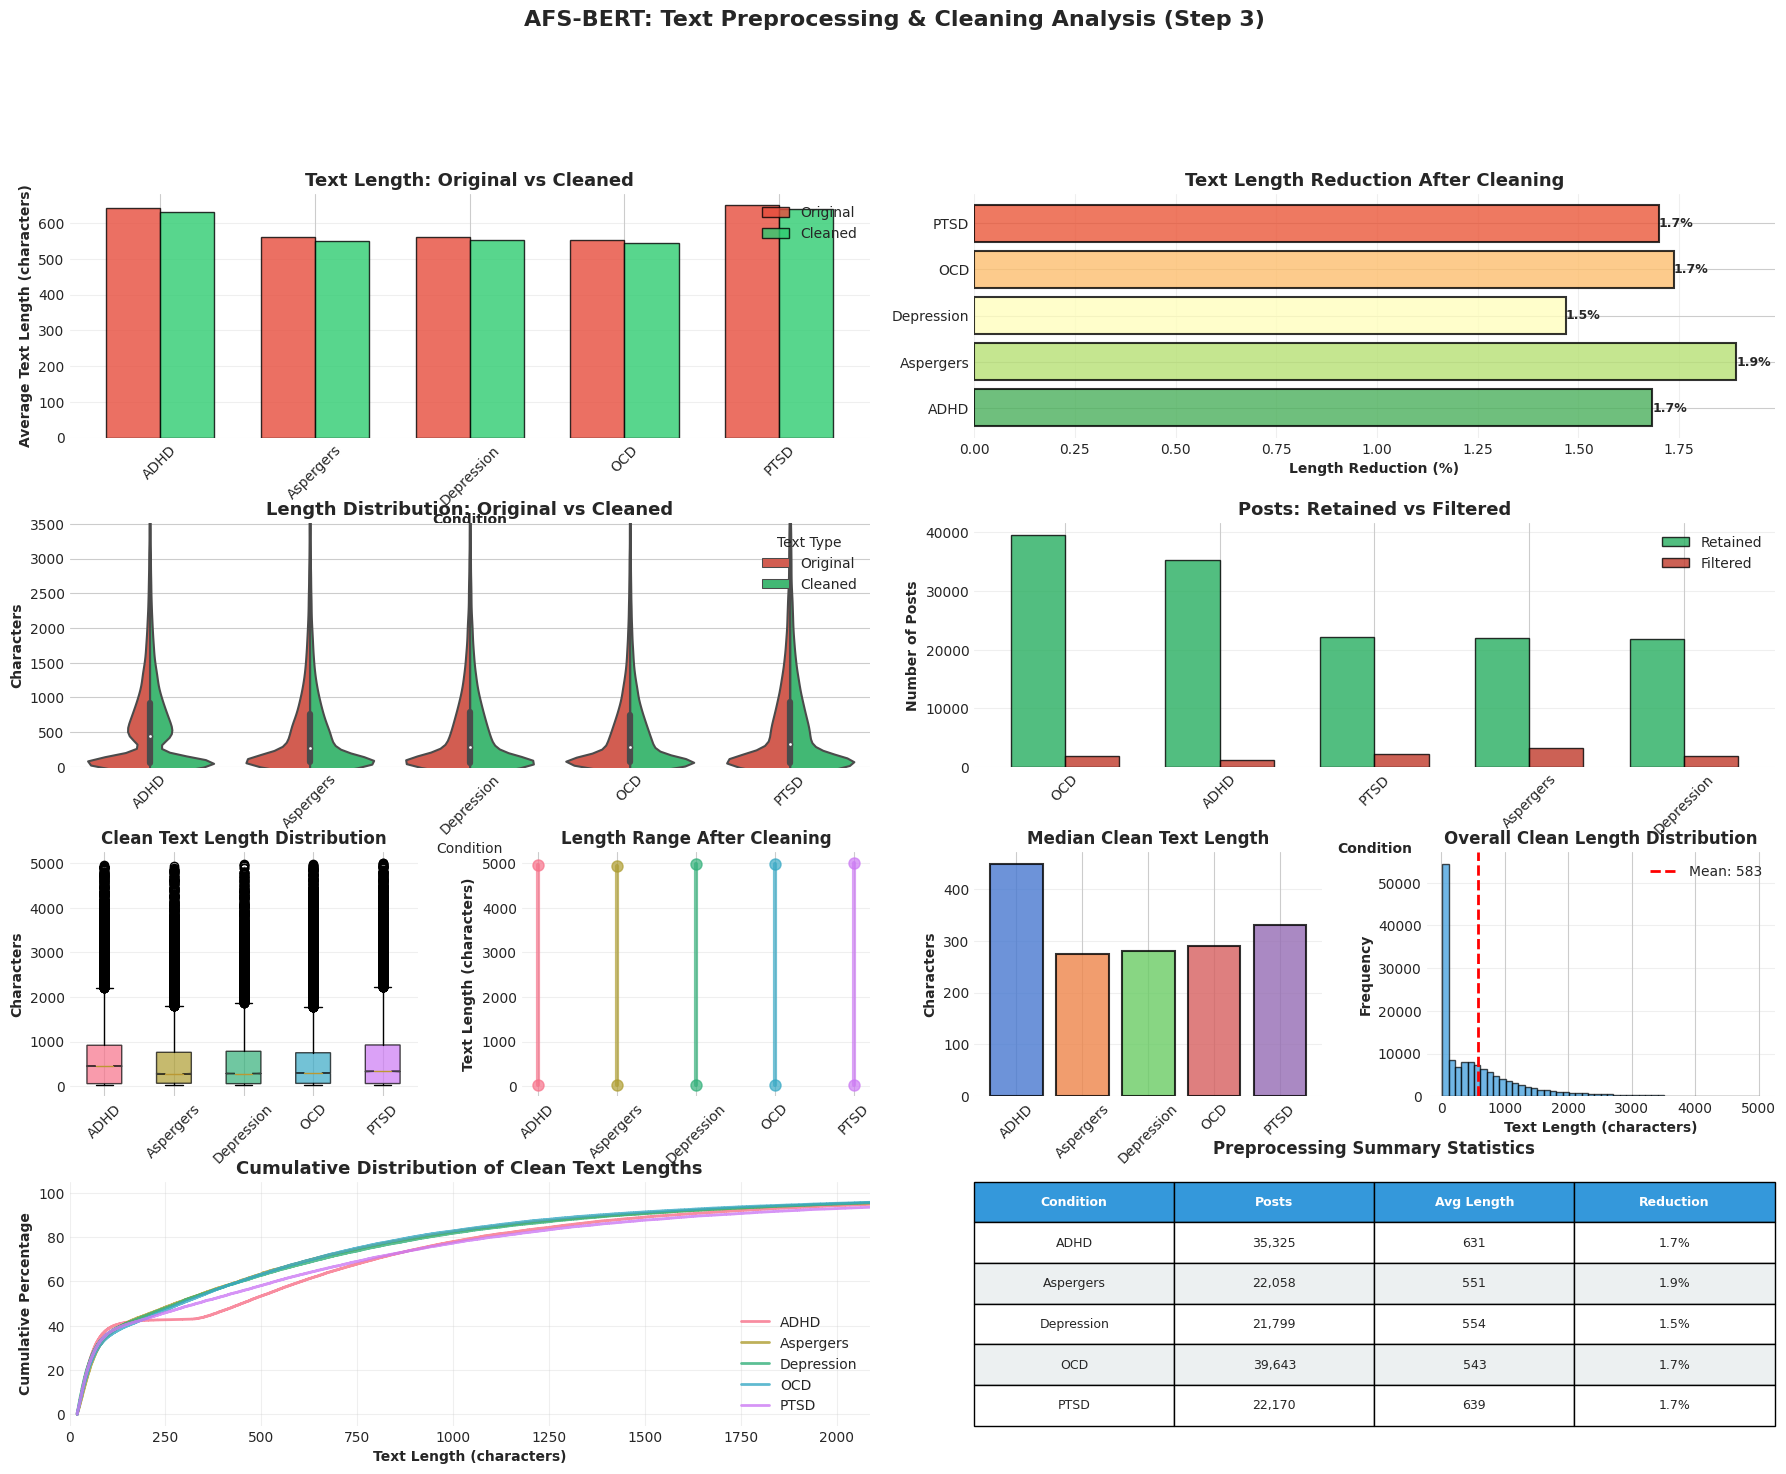


✅ Step 3 complete!

Final dataset: (140995, 12)

PREPROCESSING SUMMARY
 Condition  Count  Avg_Original  Avg_Clean  Reduction  Min_Clean  Max_Clean  Median_Clean
      ADHD  35325    642.003652 631.193914   1.683750         20       4953         448.0
 Aspergers  22058    561.672681 551.043068   1.892492         20       4951         274.0
Depression  21799    562.061471 553.809303   1.468197         20       4991         281.0
       OCD  39643    552.770754 543.172010   1.736478         20       4996         290.0
      PTSD  22170    649.974154 638.925710   1.699828         20       5000         330.0


In [21]:
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from collections import Counter
import os

# Ensure plot directory exists
os.makedirs('afs_bert_plots', exist_ok=True)

# Download NLTK data (run once)
try:
    nltk.download('punkt', quiet=True)
    nltk.download('stopwords', quiet=True)
    nltk.download('wordnet', quiet=True)
    print("✅ NLTK data ready")
except:
    print("⚠️ NLTK download failed, continuing anyway...")

# ============================================================================
# STEP 3: TEXT PREPROCESSING
# ============================================================================

class TextPreprocessor:
    def __init__(self):
        # Don't remove important negation/emotion words
        try:
            from nltk.corpus import stopwords
            self.stop_words = set(stopwords.words('english'))
            # Keep emotion-relevant words
            self.stop_words -= {
                'not', 'no', 'never', 'nothing', 'nobody', 'none',
                'neither', 'nor', 'can', 'cannot', 'couldn', 'shouldn',
                'don', 'won', 'wouldn', 'very', 'too', 'really', 'so',
                'just', 'but', 'however', 'although'
            }
        except:
            self.stop_words = set()

    def clean_text(self, text):
        """Clean Reddit-specific text"""
        if pd.isna(text) or text == '':
            return ""

        text = str(text)

        # Remove URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

        # Remove Reddit-specific markers
        text = re.sub(r'\[deleted\]|\[removed\]', '', text)

        # Remove user mentions and subreddit links
        text = re.sub(r'u/\w+|r/\w+', '', text)

        # Remove markdown formatting
        text = re.sub(r'\*\*|\*|__|_|~~', '', text)

        # Remove excessive punctuation (keep some for emotion)
        text = re.sub(r'[!]{3,}', '!!', text)
        text = re.sub(r'[?]{3,}', '??', text)
        text = re.sub(r'[.]{3,}', '...', text)

        # Remove newlines and tabs
        text = re.sub(r'\n|\t|\r', ' ', text)

        # Remove excessive whitespace
        text = re.sub(r'\s+', ' ', text).strip()

        # Remove non-ASCII characters (keep basic punctuation)
        text = re.sub(r'[^\x00-\x7F]+', '', text)

        return text

# Initialize preprocessor
preprocessor = TextPreprocessor()

print("="*80)
print("TEXT PREPROCESSING - AFS-BERT PROJECT")
print("="*80)

# Store original stats for comparison
original_stats = {
    'total_posts': len(combined_df),
    'avg_length': combined_df['text_length'].mean(),
    'conditions': combined_df['condition'].value_counts().to_dict()
}

# Apply cleaning
print("\nCleaning text data...")
combined_df['text_clean'] = combined_df['text'].apply(preprocessor.clean_text)

# Calculate new lengths
combined_df['text_clean_length'] = combined_df['text_clean'].str.len()

print("✅ Text cleaning complete!")

# Filter out very short posts (< 20 chars after cleaning)
print(f"\nPosts before filtering: {len(combined_df)}")
combined_df = combined_df[combined_df['text_clean_length'] >= 20].copy()
print(f"Posts after filtering (>= 20 chars): {len(combined_df)}")

# Filter out extremely long posts (> 5000 chars to avoid memory issues)
long_posts = (combined_df['text_clean_length'] > 5000).sum()
print(f"Posts > 5000 characters: {long_posts}")
combined_df = combined_df[combined_df['text_clean_length'] <= 5000].copy()
print(f"Posts after filtering (<= 5000 chars): {len(combined_df)}")

# Reset index
combined_df = combined_df.reset_index(drop=True)

# Statistics
print(f"\n{'='*80}")
print("CLEANED DATA STATISTICS")
print(f"{'='*80}")
print(f"Total posts: {len(combined_df)}")
print(f"\nCondition distribution:")
print(combined_df['condition'].value_counts())

print(f"\nText length statistics (after cleaning):")
print(combined_df['text_clean_length'].describe())

# Compare before/after cleaning
print(f"\n{'='*80}")
print("BEFORE vs AFTER CLEANING - SAMPLES")
print(f"{'='*80}")

for i in range(3):
    sample = combined_df.sample(1).iloc[0]
    print(f"\nSample {i+1} ({sample['condition']}):")
    print("-" * 80)
    print("BEFORE:")
    print(sample['text'][:300] + "...")
    print("\nAFTER:")
    print(sample['text_clean'][:300] + "...")
    print(f"Length: {sample['text_length']} → {sample['text_clean_length']}")

# ============================================================================
# PLOT 3: TEXT PREPROCESSING ANALYSIS
# ============================================================================

fig = plt.figure(figsize=(22, 16))
gs = fig.add_gridspec(4, 4, hspace=0.35, wspace=0.3)
fig.suptitle('AFS-BERT: Text Preprocessing & Cleaning Analysis (Step 3)', 
             fontsize=16, fontweight='bold', y=0.995)

# Prepare statistics by condition
preprocessing_stats = []
for condition in combined_df['condition'].unique():
    cond_data = combined_df[combined_df['condition'] == condition]
    preprocessing_stats.append({
        'Condition': condition,
        'Count': len(cond_data),
        'Avg_Original': cond_data['text_length'].mean(),
        'Avg_Clean': cond_data['text_clean_length'].mean(),
        'Reduction': (1 - cond_data['text_clean_length'].mean() / cond_data['text_length'].mean()) * 100,
        'Min_Clean': cond_data['text_clean_length'].min(),
        'Max_Clean': cond_data['text_clean_length'].max(),
        'Median_Clean': cond_data['text_clean_length'].median()
    })
prep_stats_df = pd.DataFrame(preprocessing_stats)

colors = sns.color_palette("husl", len(prep_stats_df))

# Plot 3.1: Before vs After Text Length Comparison
ax1 = fig.add_subplot(gs[0, :2])
x_pos = np.arange(len(prep_stats_df))
width = 0.35
bars1 = ax1.bar(x_pos - width/2, prep_stats_df['Avg_Original'], width,
                label='Original', color='#e74c3c', edgecolor='black', alpha=0.8)
bars2 = ax1.bar(x_pos + width/2, prep_stats_df['Avg_Clean'], width,
                label='Cleaned', color='#2ecc71', edgecolor='black', alpha=0.8)
ax1.set_xlabel('Condition', fontweight='bold')
ax1.set_ylabel('Average Text Length (characters)', fontweight='bold')
ax1.set_title('Text Length: Original vs Cleaned', fontsize=13, fontweight='bold')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(prep_stats_df['Condition'], rotation=45)
ax1.legend(loc='upper right')
ax1.grid(axis='y', alpha=0.3)

# Plot 3.2: Length Reduction Percentage
ax2 = fig.add_subplot(gs[0, 2:])
bars = ax2.barh(prep_stats_df['Condition'], prep_stats_df['Reduction'],
                color=sns.color_palette("RdYlGn_r", len(prep_stats_df)),
                edgecolor='black', linewidth=1.5, alpha=0.8)
ax2.set_xlabel('Length Reduction (%)', fontweight='bold')
ax2.set_title('Text Length Reduction After Cleaning', fontsize=13, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax2.text(width, bar.get_y() + bar.get_height()/2.,
            f'{width:.1f}%', ha='left', va='center', fontsize=9, fontweight='bold')

# Plot 3.3: Distribution Comparison (Violin Plot)
ax3 = fig.add_subplot(gs[1, :2])
data_original = []
data_clean = []
labels = []
for condition in prep_stats_df['Condition']:
    cond_data = combined_df[combined_df['condition'] == condition]
    data_original.extend(cond_data['text_length'].values)
    data_clean.extend(cond_data['text_clean_length'].values)
    labels.extend([condition] * len(cond_data))

df_violin = pd.DataFrame({
    'Condition': labels * 2,
    'Length': data_original + data_clean,
    'Type': ['Original'] * len(data_original) + ['Cleaned'] * len(data_clean)
})
sns.violinplot(data=df_violin, x='Condition', y='Length', hue='Type',
               split=True, ax=ax3, palette={'Original': '#e74c3c', 'Cleaned': '#2ecc71'})
ax3.set_title('Length Distribution: Original vs Cleaned', fontsize=13, fontweight='bold')
ax3.set_ylabel('Characters', fontweight='bold')
ax3.tick_params(axis='x', rotation=45)
ax3.legend(title='Text Type', loc='upper right')
ax3.set_ylim(0, min(6000, df_violin['Length'].quantile(0.99)))

# Plot 3.4: Post Count After Filtering
ax4 = fig.add_subplot(gs[1, 2:])
final_counts = combined_df['condition'].value_counts()
original_counts = pd.Series(original_stats['conditions'])
filtered_counts = original_counts - final_counts
x_pos = np.arange(len(final_counts))
width = 0.35
bars1 = ax4.bar(x_pos - width/2, final_counts.values, width,
                label='Retained', color='#27ae60', edgecolor='black', alpha=0.8)
bars2 = ax4.bar(x_pos + width/2, filtered_counts.values, width,
                label='Filtered', color='#c0392b', edgecolor='black', alpha=0.8)
ax4.set_xlabel('Condition', fontweight='bold')
ax4.set_ylabel('Number of Posts', fontweight='bold')
ax4.set_title('Posts: Retained vs Filtered', fontsize=13, fontweight='bold')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(final_counts.index, rotation=45)
ax4.legend(loc='upper right')
ax4.grid(axis='y', alpha=0.3)

# Plot 3.5: Clean Text Length Box Plot
ax5 = fig.add_subplot(gs[2, 0])
text_length_clean = [combined_df[combined_df['condition'] == cond]['text_clean_length'].values 
                     for cond in prep_stats_df['Condition']]
bp = ax5.boxplot(text_length_clean, labels=prep_stats_df['Condition'], 
                 patch_artist=True, notch=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
ax5.set_title('Clean Text Length Distribution', fontsize=12, fontweight='bold')
ax5.set_ylabel('Characters', fontweight='bold')
ax5.tick_params(axis='x', rotation=45)
ax5.grid(axis='y', alpha=0.3)

# Plot 3.6: Min-Max Range After Cleaning
ax6 = fig.add_subplot(gs[2, 1])
for i, row in prep_stats_df.iterrows():
    ax6.plot([i, i], [row['Min_Clean'], row['Max_Clean']], 
             'o-', linewidth=3, markersize=8, color=colors[i], alpha=0.7)
ax6.set_xticks(range(len(prep_stats_df)))
ax6.set_xticklabels(prep_stats_df['Condition'], rotation=45)
ax6.set_ylabel('Text Length (characters)', fontweight='bold')
ax6.set_title('Length Range After Cleaning', fontsize=12, fontweight='bold')
ax6.grid(axis='y', alpha=0.3)

# Plot 3.7: Median Length Comparison
ax7 = fig.add_subplot(gs[2, 2])
ax7.bar(prep_stats_df['Condition'], prep_stats_df['Median_Clean'],
        color=sns.color_palette("muted", len(prep_stats_df)),
        edgecolor='black', linewidth=1.5, alpha=0.8)
ax7.set_title('Median Clean Text Length', fontsize=12, fontweight='bold')
ax7.set_ylabel('Characters', fontweight='bold')
ax7.tick_params(axis='x', rotation=45)
ax7.grid(axis='y', alpha=0.3)

# Plot 3.8: Histogram of Cleaned Text Lengths
ax8 = fig.add_subplot(gs[2, 3])
ax8.hist(combined_df['text_clean_length'], bins=50, color='#3498db',
         edgecolor='black', alpha=0.7)
ax8.set_xlabel('Text Length (characters)', fontweight='bold')
ax8.set_ylabel('Frequency', fontweight='bold')
ax8.set_title('Overall Clean Length Distribution', fontsize=12, fontweight='bold')
ax8.grid(axis='y', alpha=0.3)
ax8.axvline(combined_df['text_clean_length'].mean(), color='red', 
            linestyle='--', linewidth=2, label=f'Mean: {combined_df["text_clean_length"].mean():.0f}')
ax8.legend()

# Plot 3.9: Cumulative Length Distribution
ax9 = fig.add_subplot(gs[3, :2])
for condition, color in zip(prep_stats_df['Condition'], colors):
    data = combined_df[combined_df['condition'] == condition]['text_clean_length'].sort_values()
    cumulative = np.arange(1, len(data) + 1) / len(data) * 100
    ax9.plot(data.values, cumulative, label=condition, color=color, linewidth=2, alpha=0.8)
ax9.set_xlabel('Text Length (characters)', fontweight='bold')
ax9.set_ylabel('Cumulative Percentage', fontweight='bold')
ax9.set_title('Cumulative Distribution of Clean Text Lengths', fontsize=13, fontweight='bold')
ax9.legend(loc='lower right')
ax9.grid(alpha=0.3)
ax9.set_xlim(0, min(4000, combined_df['text_clean_length'].quantile(0.95)))

# Plot 3.10: Summary Statistics Table
ax10 = fig.add_subplot(gs[3, 2:])
ax10.axis('off')
table_data = prep_stats_df[['Condition', 'Count', 'Avg_Clean', 'Reduction']].values
table_data_formatted = []
for row in table_data:
    table_data_formatted.append([
        row[0], 
        f"{int(row[1]):,}", 
        f"{row[2]:.0f}",
        f"{row[3]:.1f}%"
    ])
table = ax10.table(cellText=table_data_formatted,
                   colLabels=['Condition', 'Posts', 'Avg Length', 'Reduction'],
                   cellLoc='center',
                   loc='center',
                   bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2.5)
for i in range(len(prep_stats_df) + 1):
    for j in range(4):
        cell = table[(i, j)]
        if i == 0:
            cell.set_facecolor('#3498db')
            cell.set_text_props(weight='bold', color='white')
        else:
            cell.set_facecolor('#ecf0f1' if i % 2 == 0 else 'white')
ax10.set_title('Preprocessing Summary Statistics', fontsize=12, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('afs_bert_plots/step3_preprocessing_analysis.png', dpi=300, bbox_inches='tight')
print("\n" + "="*80)
print("✅ PLOT 3 SAVED: afs_bert_plots/step3_preprocessing_analysis.png")
print("="*80)
plt.show()

print(f"\n✅ Step 3 complete!")
print(f"\nFinal dataset: {combined_df.shape}")
print("\n" + "="*80)
print("PREPROCESSING SUMMARY")
print("="*80)
print(prep_stats_df.to_string(index=False))
print("="*80)


CREATING MENTAL HEALTH LEXICON (MHL)
Formerly: Emotion Dimension Dictionary (EDD)

MENTAL HEALTH LEXICON (MHL) STATISTICS

Desirable: 98 total words
  - general: 37 words
  - treatment: 12 words
  - adhd_positive: 11 words
  - depression_positive: 11 words
  - ocd_positive: 8 words
  - ptsd_positive: 9 words
  - asd_positive: 10 words

Undesirable: 166 total words
  - general: 29 words
  - crisis: 21 words
  - adhd_symptoms: 19 words
  - depression_symptoms: 32 words
  - ocd_symptoms: 23 words
  - ptsd_symptoms: 22 words
  - asd_symptoms: 22 words

Praiseworthy: 60 total words
  - providers: 22 words
  - support: 26 words
  - self: 12 words

Blameworthy: 49 total words
  - self_blame: 17 words
  - blame_others: 19 words
  - system: 13 words

Confirmed: 23 total words
  - diagnosis: 10 words
  - realization: 13 words

Disconfirmed: 21 total words
  - false_alarm: 10 words
  - unexpected: 11 words

✅ PLOT 4 SAVED: afs_bert_plots/step4_mhl_lexicon_analysis.png


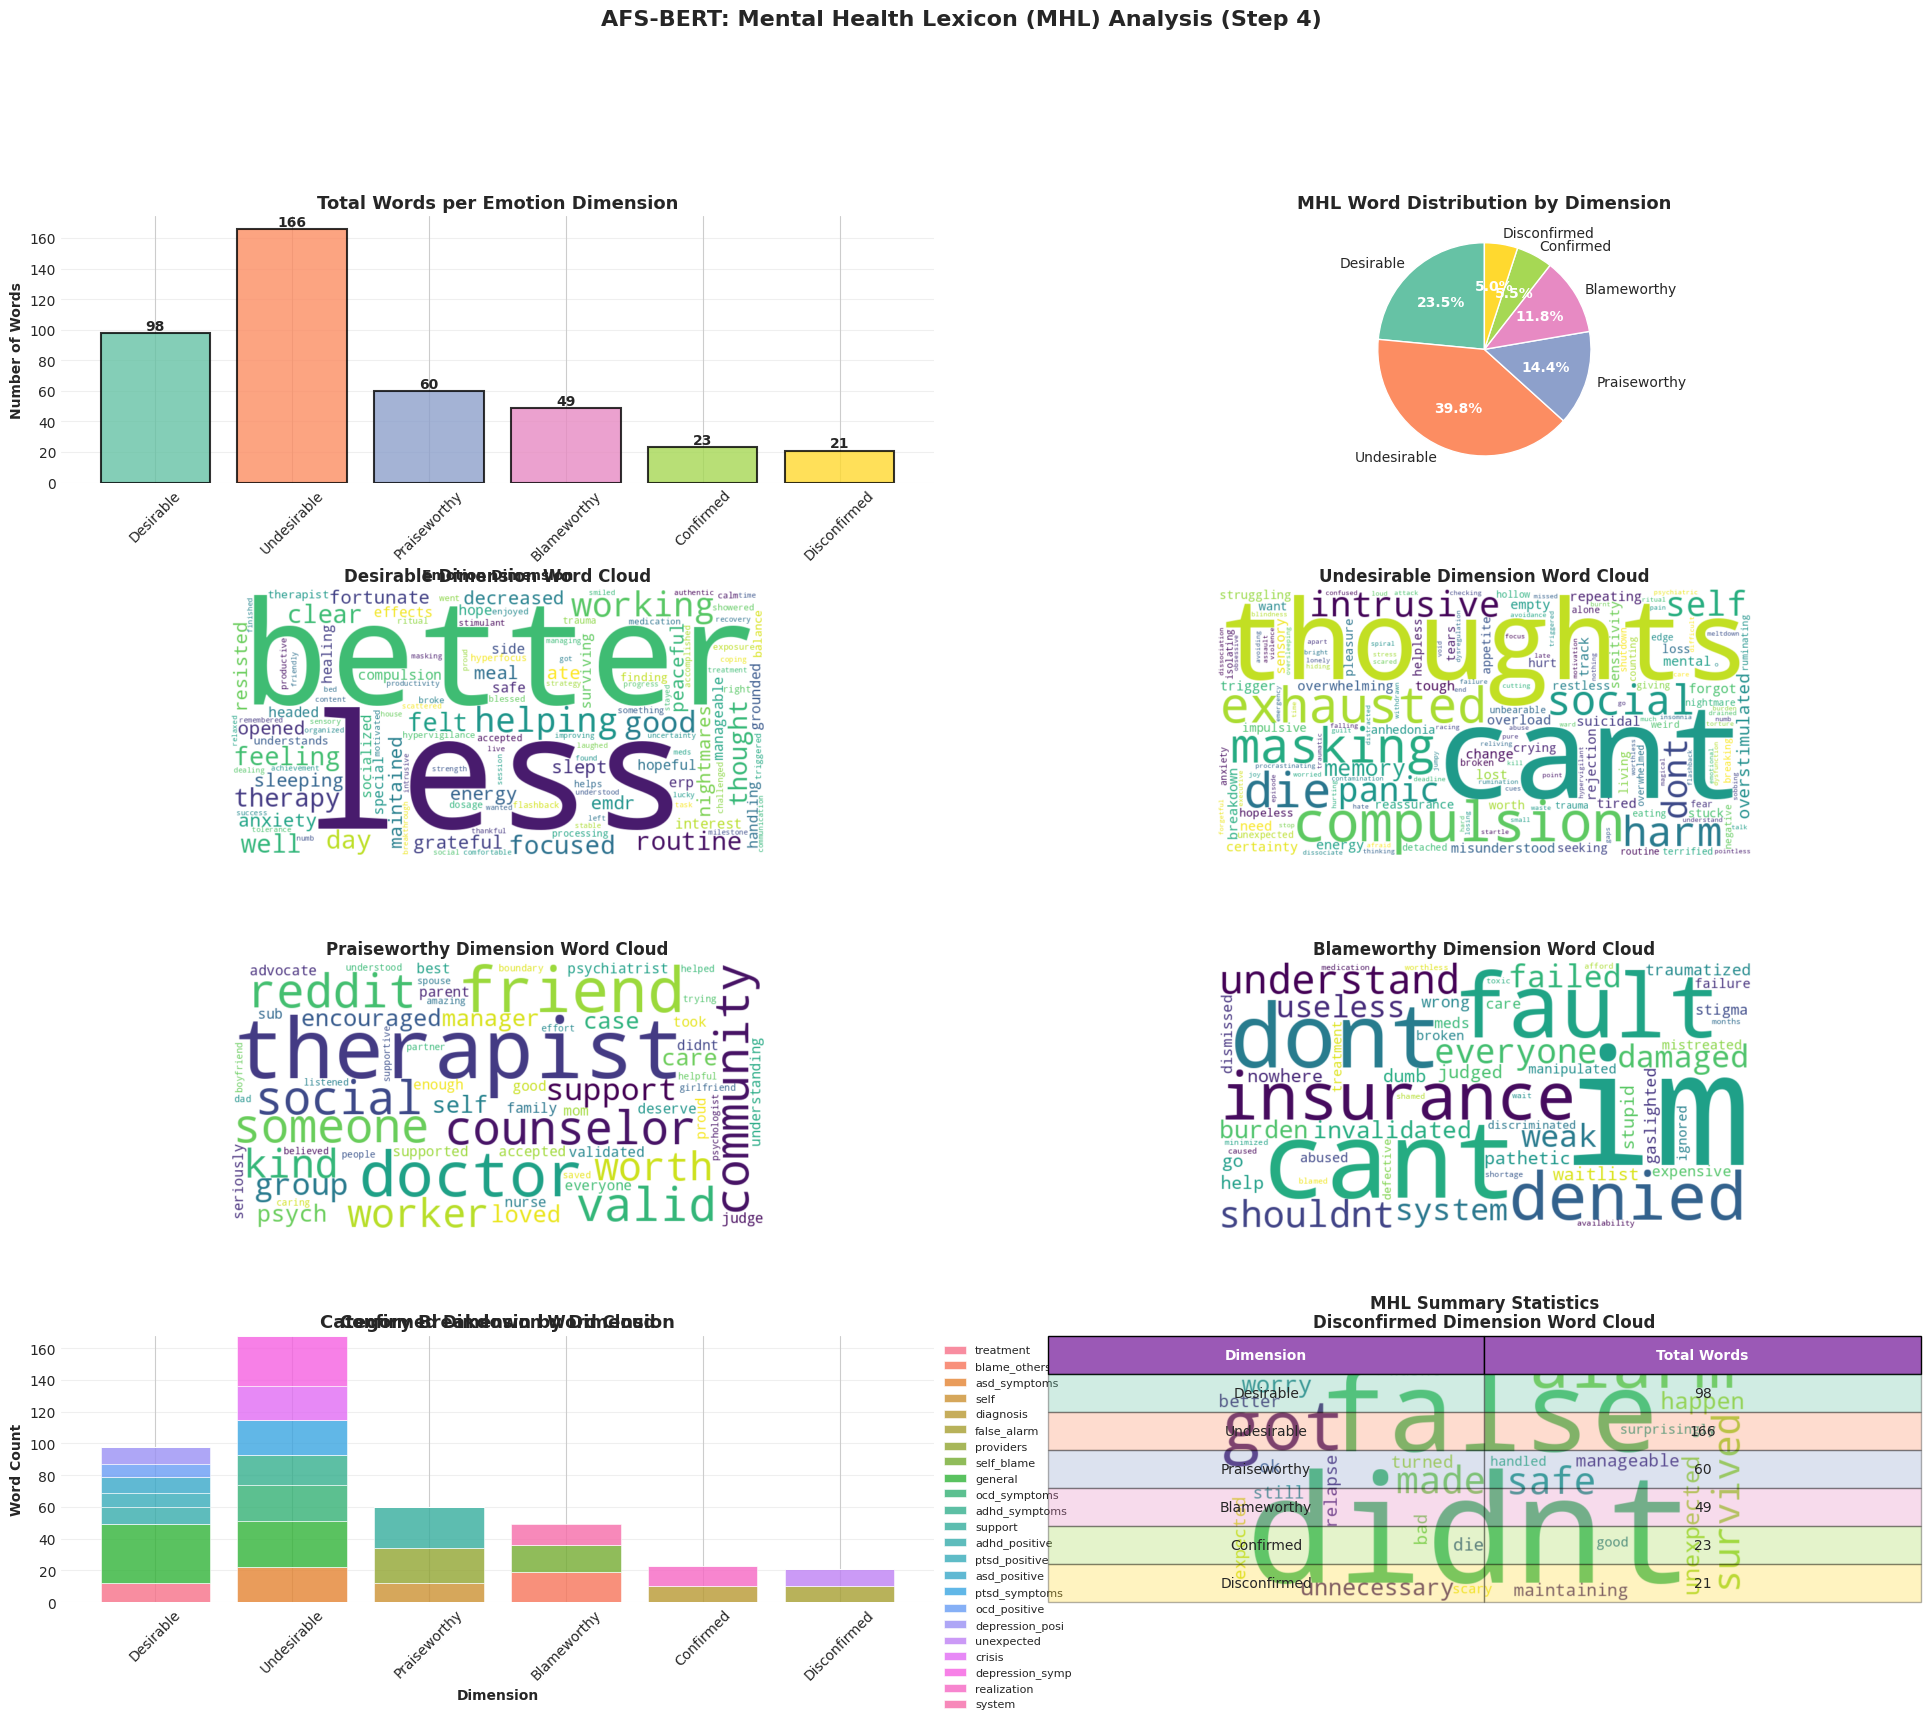


✅ Step 4 complete!

MHL (Mental Health Lexicon) created with 6 dimensions:
  1. Desirable (positive mental health states)
  2. Undesirable (negative symptoms/distress)
  3. Praiseworthy (appreciation/support)
  4. Blameworthy (blame/criticism)
  5. Confirmed (validation of fears)
  6. Disconfirmed (relief from avoided outcomes)

TOTAL MHL COVERAGE
   Dimension  Total_Words
   Desirable           98
 Undesirable          166
Praiseworthy           60
 Blameworthy           49
   Confirmed           23
Disconfirmed           21

Grand Total: 417 unique emotional terms


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from wordcloud import WordCloud
from collections import Counter
import os

# Ensure plot directory exists
os.makedirs('afs_bert_plots', exist_ok=True)

# ============================================================================
# STEP 4: CREATE MENTAL HEALTH LEXICON (MHL)
# Renamed from EDD (Emotion Dimension Dictionary)
# ============================================================================

class MentalHealthLexicon:
    """
    Mental Health Lexicon (MHL)
    Based on OCC model with 6 dimensions adapted for mental health
    Previously called: Emotion Dimension Dictionary (EDD)
    """

    def __init__(self):
        self.emotion_dimensions = self._build_dimensions()
        self.intensity_modifiers = self._build_intensity_modifiers()

    def _build_dimensions(self):
        """Build 6 emotion dimensions with condition-specific terms"""

        dimensions = {
            'Desirable': {
                # General positive mental health
                'general': [
                    'better', 'improving', 'progress', 'recovery', 'healing',
                    'hopeful', 'hope', 'motivated', 'energy', 'strength',
                    'coping', 'managing', 'handling', 'dealing', 'surviving',
                    'breakthrough', 'milestone', 'achievement', 'proud',
                    'peaceful', 'calm', 'relaxed', 'content', 'stable',
                    'grateful', 'thankful', 'blessed', 'lucky', 'fortunate',
                    'good day', 'better day', 'felt good', 'slept well',
                    'clear headed', 'focused', 'productive', 'accomplished'
                ],

                # Treatment success
                'treatment': [
                    'therapy helps', 'therapy working', 'medication working',
                    'treatment helping', 'meds helping', 'feeling better',
                    'side effects manageable', 'right dosage', 'finding balance',
                    'therapist understands', 'good session', 'opened up'
                ],

                # ADHD-specific positive
                'adhd_positive': [
                    'hyperfocus', 'found strategy', 'remembered', 'organized',
                    'on time', 'finished task', 'stayed focused', 'productivity',
                    'stimulant working', 'less scattered', 'routine helping'
                ],

                # Depression-specific positive
                'depression_positive': [
                    'got out of bed', 'showered', 'ate meal', 'left house',
                    'socialized', 'enjoyed something', 'laughed', 'smiled',
                    'less numb', 'feeling again', 'wanted to live'
                ],

                # OCD-specific positive
                'ocd_positive': [
                    'resisted compulsion', 'exposure went well', 'anxiety decreased',
                    'less intrusive thoughts', 'erp working', 'broke ritual',
                    'challenged thought', 'uncertainty tolerance'
                ],

                # PTSD-specific positive
                'ptsd_positive': [
                    'no nightmares', 'no flashback', 'felt safe', 'grounded',
                    'emdr helping', 'processing trauma', 'less triggered',
                    'hypervigilance down', 'sleeping better'
                ],

                # Aspergers/ASD positive
                'asd_positive': [
                    'special interest', 'comfortable', 'understood', 'accepted',
                    'clear communication', 'sensory friendly', 'routine maintained',
                    'social success', 'masking less', 'authentic'
                ]
            },

            'Undesirable': {
                # General distress
                'general': [
                    'suffering', 'pain', 'hurt', 'struggling', 'difficult',
                    'hard', 'tough', 'unbearable', 'overwhelming', 'exhausted',
                    'tired', 'drained', 'burnt out', 'breaking', 'falling apart',
                    'losing it', 'scared', 'terrified', 'afraid',
                    'worried', 'anxious', 'nervous', 'panic', 'stress',
                    'crying', 'tears', 'sobbing', 'breakdown', 'episode'
                ],

                # Crisis indicators
                'crisis': [
                    'suicidal', 'kill myself', 'end it', 'die', 'death',
                    'not worth living', 'better off dead', 'giving up',
                    'no point', 'hopeless', 'helpless',
                    'self harm', 'cutting', 'hurting myself', 'crisis',
                    'emergency', 'hospital', 'psychiatric ward', 'hotline',
                    'cant go on', 'want to die'
                ],

                # ADHD symptoms
                'adhd_symptoms': [
                    'cant focus', 'distracted', 'scattered', 'forgetful',
                    'forgot again', 'lost track', 'missed deadline', 'late',
                    'overwhelmed', 'too much', 'executive dysfunction',
                    'time blindness', 'procrastinating', 'avoidance',
                    'rejection sensitivity', 'emotional dysregulation',
                    'impulsive', 'restless', 'racing thoughts'
                ],

                # Depression symptoms
                'depression_symptoms': [
                    'empty', 'numb', 'hollow', 'void', 'nothing', 'pointless',
                    'worthless', 'useless', 'failure', 'burden', 'waste',
                    'cant get up', 'bed all day', 'no energy', 'no motivation',
                    'dont care', 'anhedonia', 'no pleasure', 'no joy',
                    'isolating', 'alone', 'lonely', 'withdrawn', 'hiding',
                    'ruminating', 'negative thoughts', 'self hate', 'guilt',
                    'appetite loss', 'not eating', 'insomnia', 'oversleeping'
                ],

                # OCD symptoms
                'ocd_symptoms': [
                    'intrusive thoughts', 'obsessive', 'compulsion', 'ritual',
                    'checking', 'washing', 'counting', 'repeating',
                    'contamination', 'fear of harm', 'magical thinking',
                    'pure o', 'mental compulsion', 'reassurance seeking',
                    'cant stop', 'stuck', 'rumination', 'doubt', 'uncertainty',
                    'need certainty', 'spiral', 'loop', 'torture'
                ],

                # PTSD symptoms
                'ptsd_symptoms': [
                    'flashback', 'nightmare', 'triggered', 'trigger',
                    'hypervigilant', 'on edge', 'startle', 'jumpy',
                    'dissociate', 'dissociation', 'detached',
                    'avoidance', 'avoiding', 'memory gaps',
                    'panic attack', 'reliving', 'intrusive memory',
                    'traumatic', 'trauma', 'abuse', 'assault', 'violence'
                ],

                # Aspergers/ASD struggles
                'asd_symptoms': [
                    'sensory overload', 'too loud', 'too bright', 'overstimulated',
                    'meltdown', 'shutdown', 'masking', 'exhausted from masking',
                    'dont understand', 'confused', 'social anxiety',
                    'misunderstood', 'different', 'weird', 'outcast',
                    'routine broken', 'change', 'unexpected', 'uncertainty',
                    'eye contact uncomfortable', 'small talk', 'social cues'
                ]
            },

            'Praiseworthy': {
                # Healthcare providers
                'providers': [
                    'therapist', 'psychiatrist', 'psychologist', 'counselor',
                    'doctor', 'nurse', 'social worker', 'case manager',
                    'my therapist', 'my doctor', 'my psych',
                    'helpful', 'supportive', 'understanding', 'caring',
                    'listened', 'validated', 'believed me', 'took seriously',
                    'good therapist', 'amazing therapist', 'saved me'
                ],

                # Support system
                'support': [
                    'friend', 'friends', 'family', 'mom', 'dad', 'parent',
                    'partner', 'spouse', 'girlfriend', 'boyfriend',
                    'support group', 'community', 'reddit', 'this sub',
                    'someone', 'people', 'everyone here', 'you all',
                    'helped me', 'there for me', 'supported', 'encouraged',
                    'understood', 'accepted', 'didnt judge', 'loved'
                ],

                # Self-compassion
                'self': [
                    'proud of myself', 'did my best', 'trying', 'effort',
                    'kind to myself', 'self care', 'boundary', 'advocate',
                    'deserve', 'worth', 'valid', 'enough'
                ]
            },

            'Blameworthy': {
                # Self-blame
                'self_blame': [
                    'my fault', 'im stupid', 'im dumb', 'im weak',
                    'im pathetic', 'im useless', 'im worthless',
                    'im a failure', 'im a burden', 'im broken',
                    'i should', 'i shouldnt', 'why cant i', 'everyone else can',
                    'wrong with me', 'defective', 'damaged'
                ],

                # Blame others
                'blame_others': [
                    'their fault', 'they caused', 'they dont care',
                    'dont understand', 'dismissed', 'ignored', 'minimized',
                    'invalidated', 'judged', 'blamed', 'shamed', 'stigma',
                    'discriminated', 'mistreated', 'abused', 'toxic',
                    'gaslighted', 'manipulated', 'traumatized me'
                ],

                # System failures
                'system': [
                    'insurance denied', 'cant afford', 'too expensive',
                    'no insurance', 'waitlist', 'months wait', 'no availability',
                    'no help', 'nowhere to go', 'system failed',
                    'medication shortage', 'cant get meds', 'denied treatment'
                ]
            },

            'Confirmed': {
                # Diagnosis/validation
                'diagnosis': [
                    'diagnosed', 'diagnosis', 'confirmed', 'doctor said',
                    'test showed', 'evaluation', 'assessment results',
                    'officially', 'on paper', 'medical record'
                ],

                # Fear realization
                'realization': [
                    'as expected', 'knew it', 'i was right', 'getting worse',
                    'deteriorating', 'declining', 'relapse', 'relapsed',
                    'back to square one', 'happening again', 'pattern',
                    'predictable', 'inevitable'
                ]
            },

            'Disconfirmed': {
                # False alarms
                'false_alarm': [
                    'wasnt as bad', 'better than expected', 'overreacted',
                    'false alarm', 'unnecessary worry', 'made it through',
                    'survived', 'didnt happen', 'didnt die', 'safe now'
                ],

                # Unexpected positive
                'unexpected': [
                    'surprisingly good', 'unexpected relief', 'turned out ok',
                    'not as scary', 'manageable', 'handled it', 'got through',
                    'no relapse', 'stable', 'maintaining', 'still here'
                ]
            }
        }

        return dimensions

    def _build_intensity_modifiers(self):
        """Build intensity modifiers"""
        return {
            'amplifiers': {
                'extreme': ['extremely', 'severely', 'unbearably', 'impossibly', 'absolutely'],
                'high': ['very', 'really', 'so', 'incredibly', 'totally', 'completely'],
                'medium': ['pretty', 'quite', 'fairly', 'rather', 'somewhat']
            },
            'dampeners': ['a bit', 'a little', 'slightly', 'somewhat', 'kind of', 'sort of'],
            'negators': ['not', 'no', 'never', 'neither', 'nowhere', 'nobody', 'nothing', 'without']
        }

    def get_all_words(self, dimension):
        """Get all words for a dimension"""
        if dimension not in self.emotion_dimensions:
            return set()

        all_words = set()
        for category, words in self.emotion_dimensions[dimension].items():
            all_words.update(words)
        return all_words

    def get_intensity(self, word, context, dimension):
        """Calculate intensity score (0-5)"""
        base_intensity = 1.0

        # Crisis keywords get maximum intensity
        if dimension == 'Undesirable':
            crisis_words = self.emotion_dimensions['Undesirable']['crisis']
            if any(crisis in context.lower() for crisis in crisis_words):
                return 5.0

        # Check for amplifiers
        context_lower = context.lower()
        for level, amplifiers in self.intensity_modifiers['amplifiers'].items():
            if any(amp in context_lower for amp in amplifiers):
                if level == 'extreme':
                    base_intensity *= 2.0
                elif level == 'high':
                    base_intensity *= 1.5
                elif level == 'medium':
                    base_intensity *= 1.2

        # Check for dampeners
        if any(damp in context_lower for damp in self.intensity_modifiers['dampeners']):
            base_intensity *= 0.5

        # Check for negation (simple)
        words = context_lower.split()
        try:
            word_idx = words.index(word.lower())
            preceding_words = words[max(0, word_idx-3):word_idx]
            if any(neg in preceding_words for neg in self.intensity_modifiers['negators']):
                return 0.0  # Negated
        except ValueError:
            pass

        return min(base_intensity, 5.0)

    def get_statistics(self):
        """Print MHL statistics"""
        print("\n" + "="*80)
        print("MENTAL HEALTH LEXICON (MHL) STATISTICS")
        print("="*80)

        stats = []
        for dimension in self.emotion_dimensions:
            all_words = self.get_all_words(dimension)
            print(f"\n{dimension}: {len(all_words)} total words")
            for category, words in self.emotion_dimensions[dimension].items():
                print(f"  - {category}: {len(words)} words")
                stats.append({
                    'Dimension': dimension,
                    'Category': category,
                    'Word_Count': len(words)
                })
        
        return pd.DataFrame(stats)

# Create MHL (Mental Health Lexicon)
print("="*80)
print("CREATING MENTAL HEALTH LEXICON (MHL)")
print("Formerly: Emotion Dimension Dictionary (EDD)")
print("="*80)

MHL = MentalHealthLexicon()
mhl_stats_df = MHL.get_statistics()

# ============================================================================
# PLOT 4: MENTAL HEALTH LEXICON (MHL) VISUALIZATION
# ============================================================================

fig = plt.figure(figsize=(24, 18))
gs = fig.add_gridspec(4, 4, hspace=0.4, wspace=0.3)
fig.suptitle('AFS-BERT: Mental Health Lexicon (MHL) Analysis (Step 4)', 
             fontsize=16, fontweight='bold', y=0.995)

# Prepare data
dimension_totals = []
for dimension in MHL.emotion_dimensions:
    total_words = len(MHL.get_all_words(dimension))
    dimension_totals.append({
        'Dimension': dimension,
        'Total_Words': total_words
    })
dim_totals_df = pd.DataFrame(dimension_totals)

colors_dim = sns.color_palette("Set2", len(dim_totals_df))

# Plot 4.1: Total Words per Dimension
ax1 = fig.add_subplot(gs[0, :2])
bars = ax1.bar(dim_totals_df['Dimension'], dim_totals_df['Total_Words'],
               color=colors_dim, edgecolor='black', linewidth=1.5, alpha=0.8)
ax1.set_title('Total Words per Emotion Dimension', fontsize=13, fontweight='bold')
ax1.set_xlabel('Emotion Dimension', fontweight='bold')
ax1.set_ylabel('Number of Words', fontweight='bold')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Plot 4.2: Dimension Distribution Pie Chart
ax2 = fig.add_subplot(gs[0, 2:])
wedges, texts, autotexts = ax2.pie(dim_totals_df['Total_Words'],
                                     labels=dim_totals_df['Dimension'],
                                     autopct='%1.1f%%',
                                     colors=colors_dim,
                                     startangle=90,
                                     textprops={'fontsize': 10})
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
ax2.set_title('MHL Word Distribution by Dimension', fontsize=13, fontweight='bold')

# Plot 4.3-4.8: Word Clouds for Each Dimension
dimension_list = list(MHL.emotion_dimensions.keys())
for idx, dimension in enumerate(dimension_list):
    row = 1 + (idx // 2)
    col = (idx % 2) * 2
    ax = fig.add_subplot(gs[row, col:col+2])
    
    all_words = MHL.get_all_words(dimension)
    if all_words:
        wordcloud = WordCloud(width=800, height=400, background_color='white',
                             colormap='viridis', relative_scaling=0.5,
                             min_font_size=10).generate(' '.join(all_words))
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.set_title(f'{dimension} Dimension Word Cloud', fontsize=12, fontweight='bold')
        ax.axis('off')
    else:
        ax.text(0.5, 0.5, 'No words', ha='center', va='center')
        ax.axis('off')

# Plot 4.9: Category Breakdown (Stacked Bar)
ax9 = fig.add_subplot(gs[3, :2])
categories_by_dim = {}
for dimension in MHL.emotion_dimensions:
    categories_by_dim[dimension] = {}
    for category, words in MHL.emotion_dimensions[dimension].items():
        categories_by_dim[dimension][category] = len(words)

# Prepare data for stacked bar chart
dimensions = list(categories_by_dim.keys())
all_categories = set()
for dim_cats in categories_by_dim.values():
    all_categories.update(dim_cats.keys())

category_counts = {cat: [] for cat in all_categories}
for dimension in dimensions:
    for category in all_categories:
        count = categories_by_dim[dimension].get(category, 0)
        category_counts[category].append(count)

# Plot stacked bars
bottom = np.zeros(len(dimensions))
category_colors = sns.color_palette("husl", len(all_categories))
for idx, (category, counts) in enumerate(category_counts.items()):
    ax9.bar(dimensions, counts, bottom=bottom, label=category[:15],
            color=category_colors[idx], edgecolor='white', linewidth=0.5, alpha=0.8)
    bottom += np.array(counts)

ax9.set_title('Category Breakdown by Dimension', fontsize=13, fontweight='bold')
ax9.set_xlabel('Dimension', fontweight='bold')
ax9.set_ylabel('Word Count', fontweight='bold')
ax9.tick_params(axis='x', rotation=45)
ax9.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=8)
ax9.grid(axis='y', alpha=0.3)

# Plot 4.10: Summary Statistics Table
ax10 = fig.add_subplot(gs[3, 2:])
ax10.axis('off')
table_data = dim_totals_df.values
table = ax10.table(cellText=table_data,
                   colLabels=['Dimension', 'Total Words'],
                   cellLoc='center',
                   loc='center',
                   bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 3)
for i in range(len(dim_totals_df) + 1):
    for j in range(2):
        cell = table[(i, j)]
        if i == 0:
            cell.set_facecolor('#9b59b6')
            cell.set_text_props(weight='bold', color='white')
        else:
            cell.set_facecolor(colors_dim[i-1])
            cell.set_alpha(0.3)
ax10.set_title('MHL Summary Statistics', fontsize=12, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('afs_bert_plots/step4_mhl_lexicon_analysis.png', dpi=300, bbox_inches='tight')
print("\n" + "="*80)
print("✅ PLOT 4 SAVED: afs_bert_plots/step4_mhl_lexicon_analysis.png")
print("="*80)
plt.show()

print("\n✅ Step 4 complete!")
print("\nMHL (Mental Health Lexicon) created with 6 dimensions:")
print("  1. Desirable (positive mental health states)")
print("  2. Undesirable (negative symptoms/distress)")
print("  3. Praiseworthy (appreciation/support)")
print("  4. Blameworthy (blame/criticism)")
print("  5. Confirmed (validation of fears)")
print("  6. Disconfirmed (relief from avoided outcomes)")
print("\n" + "="*80)
print("TOTAL MHL COVERAGE")
print("="*80)
print(dim_totals_df.to_string(index=False))
print(f"\nGrand Total: {dim_totals_df['Total_Words'].sum()} unique emotional terms")
print("="*80)


INITIALIZING EMOTION KNOWLEDGE EXTRACTOR (EKE)
Formerly: Emotion-Cognitive Reasoning (ECR)
✅ EKE initialized with 10 emotion-cognitive rules

TESTING EKE ON SAMPLE POSTS

--------------------------------------------------------------------------------
Condition: OCD
Text: I have an idea for a coping skill. Forgive me if this seems obvious but I've only been struggling with ocd for 7 or 8 months so I'm not super well versed in all of the well known coping skills. Since ...

EKE Results:
  Has emotions: True
  ES: 0.667 (Emotion Score: -1=negative, 0=neutral, 1=positive)
  CS_EKE: 0.667 (Confidence: 0-1)
  PECK count: 12
  NECK count: 2
  Positive emotions: ['gratitude', 'gratitude', 'gratitude']
  Negative emotions: ['distress', 'distress']

--------------------------------------------------------------------------------
Condition: PTSD
Text: I still think about my abuser (possible trigger). I was with my abuser for 3 years, the relationship ended over 3 years ago and my last counsellin

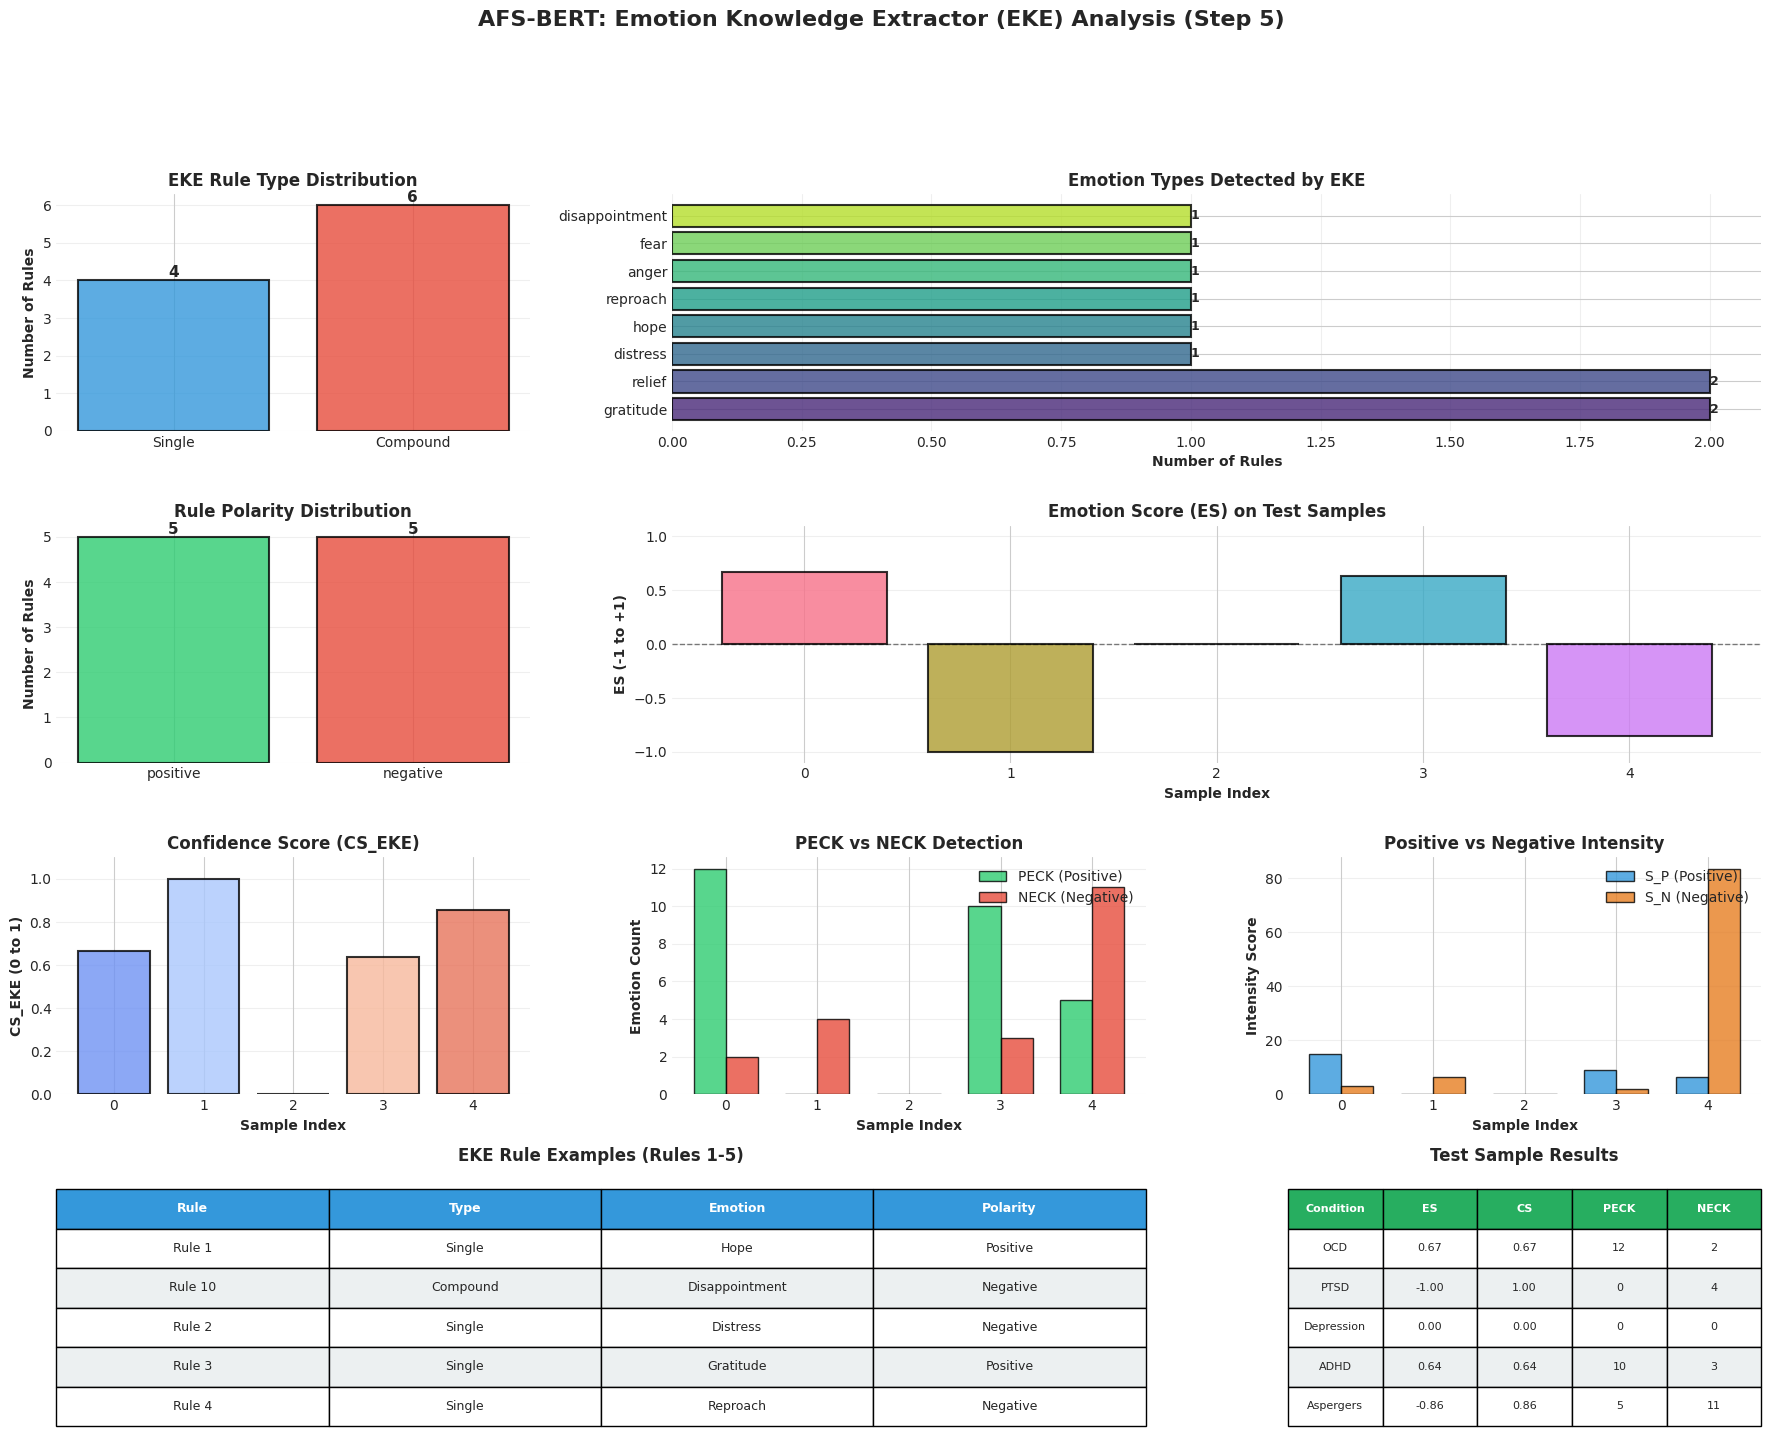


✅ Step 5 complete!

EKE (Emotion Knowledge Extractor) system ready to process full dataset


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from collections import Counter
import os

# Ensure plot directory exists
os.makedirs('afs_bert_plots', exist_ok=True)

# ============================================================================
# STEP 5: EMOTION KNOWLEDGE EXTRACTOR (EKE) SYSTEM
# Renamed from ECR (Emotion-Cognitive Reasoning)
# ============================================================================

class EmotionKnowledgeExtractor:
    """
    Emotion Knowledge Extractor (EKE) for Mental Health
    Implements 10 OCC-based rules
    Previously called: Emotion-Cognitive Reasoning (ECR)
    """

    def __init__(self, MHL):
        self.MHL = MHL
        self.emotion_rules = self._build_emotion_rules()

    def _build_emotion_rules(self):
        """Build 10 emotion-cognitive rules"""
        return {
            # === SINGLE RULES ===
            'rule_1': {
                'type': 'single',
                'condition': ['Desirable'],
                'emotion': 'hope',
                'polarity': 'positive',
                'description': 'Positive coping or recovery signs'
            },
            'rule_2': {
                'type': 'single',
                'condition': ['Undesirable'],
                'emotion': 'distress',
                'polarity': 'negative',
                'description': 'Symptoms or suffering'
            },
            'rule_3': {
                'type': 'single',
                'condition': ['Praiseworthy'],
                'emotion': 'gratitude',
                'polarity': 'positive',
                'description': 'Appreciation for support/treatment'
            },
            'rule_4': {
                'type': 'single',
                'condition': ['Blameworthy'],
                'emotion': 'reproach',
                'polarity': 'negative',
                'description': 'Blame (self or others)'
            },

            # === COMPOUND RULES ===
            'rule_5': {
                'type': 'compound',
                'condition': ['Desirable', 'Praiseworthy'],
                'emotion': 'gratitude',
                'polarity': 'positive',
                'description': 'Thankful for improvement/help'
            },
            'rule_6': {
                'type': 'compound',
                'condition': ['Undesirable', 'Blameworthy'],
                'emotion': 'anger',
                'polarity': 'negative',
                'description': 'Anger about suffering/cause'
            },
            'rule_7': {
                'type': 'compound',
                'condition': ['Desirable', 'Confirmed'],
                'emotion': 'relief',
                'polarity': 'positive',
                'description': 'Relief from positive confirmation'
            },
            'rule_8': {
                'type': 'compound',
                'condition': ['Undesirable', 'Confirmed'],
                'emotion': 'fear',
                'polarity': 'negative',
                'description': 'Fears realized (diagnosis, relapse)'
            },
            'rule_9': {
                'type': 'compound',
                'condition': ['Desirable', 'Disconfirmed'],
                'emotion': 'relief',
                'polarity': 'positive',
                'description': 'Relief from avoided negative outcome'
            },
            'rule_10': {
                'type': 'compound',
                'condition': ['Undesirable', 'Disconfirmed'],
                'emotion': 'disappointment',
                'polarity': 'negative',
                'description': 'Disappointment from failed hope'
            }
        }

    def identify_emotion_words(self, text):
        """Step 1: Identify emotion words from text"""
        text_lower = text.lower()
        emotion_words = {
            'Desirable': [],
            'Undesirable': [],
            'Praiseworthy': [],
            'Blameworthy': [],
            'Confirmed': [],
            'Disconfirmed': []
        }

        for dimension in emotion_words.keys():
            all_words = self.MHL.get_all_words(dimension)

            for word in all_words:
                pattern = r'\b' + re.escape(word.lower()) + r'\b'
                matches = re.finditer(pattern, text_lower)

                for match in matches:
                    position = match.start()
                    context_start = max(0, position - 50)
                    context_end = min(len(text), position + 50)
                    context = text[context_start:context_end]

                    intensity = self.MHL.get_intensity(word, context, dimension)

                    if intensity > 0:
                        emotion_words[dimension].append({
                            'word': word,
                            'position': position,
                            'intensity': intensity,
                            'context': context
                        })

        return emotion_words

    def apply_rules(self, emotion_words):
        """Step 2: Apply 10 emotion-cognitive rules"""
        inferred_emotions = []

        # Compound rules first (higher priority)
        for rule_name in sorted(self.emotion_rules.keys()):
            rule = self.emotion_rules[rule_name]

            if rule['type'] == 'compound':
                conditions = rule['condition']

                if all(len(emotion_words[cond]) > 0 for cond in conditions):
                    words_dim1 = emotion_words[conditions[0]]
                    words_dim2 = emotion_words[conditions[1]]

                    for w1 in words_dim1[:3]:
                        for w2 in words_dim2[:3]:
                            inferred_emotions.append({
                                'rule': rule_name,
                                'emotion': rule['emotion'],
                                'polarity': rule['polarity'],
                                'type': 'compound',
                                'words': [w1['word'], w2['word']],
                                'intensity': (w1['intensity'] + w2['intensity']) / 2,
                                'evidence': f"{w1['word']} + {w2['word']}",
                                'description': rule['description']
                            })

        # Single rules
        for rule_name in sorted(self.emotion_rules.keys()):
            rule = self.emotion_rules[rule_name]

            if rule['type'] == 'single':
                condition = rule['condition'][0]

                if len(emotion_words[condition]) > 0:
                    for word_info in emotion_words[condition][:5]:
                        inferred_emotions.append({
                            'rule': rule_name,
                            'emotion': rule['emotion'],
                            'polarity': rule['polarity'],
                            'type': 'single',
                            'words': [word_info['word']],
                            'intensity': word_info['intensity'],
                            'evidence': word_info['word'],
                            'description': rule['description']
                        })

        return inferred_emotions

    def calculate_emotion_score(self, text, emotion_words):
        """Step 3: Calculate ES and CS_EKE"""
        S_P = 0.0
        S_N = 0.0

        # Positive intensity
        for word_info in emotion_words['Desirable']:
            word = word_info['word']
            intensity = word_info['intensity']
            frequency = text.lower().count(word.lower())
            S_P += intensity * frequency

        for word_info in emotion_words['Praiseworthy']:
            word = word_info['word']
            intensity = word_info['intensity']
            frequency = text.lower().count(word.lower())
            S_P += intensity * frequency

        for word_info in emotion_words['Disconfirmed']:
            word = word_info['word']
            intensity = word_info['intensity']
            frequency = text.lower().count(word.lower())
            S_P += intensity * frequency * 0.5

        # Negative intensity
        for word_info in emotion_words['Undesirable']:
            word = word_info['word']
            intensity = word_info['intensity']
            frequency = text.lower().count(word.lower())
            S_N += intensity * frequency

        for word_info in emotion_words['Blameworthy']:
            word = word_info['word']
            intensity = word_info['intensity']
            frequency = text.lower().count(word.lower())
            S_N += intensity * frequency

        for word_info in emotion_words['Confirmed']:
            word = word_info['word']
            intensity = word_info['intensity']
            frequency = text.lower().count(word.lower())
            S_N += intensity * frequency * 0.5

        # Calculate ES and CS_EKE
        if S_P + S_N == 0:
            ES = 0.0
            CS_EKE = 0.0
        else:
            ES = (S_P - S_N) / (S_P + S_N)
            CS_EKE = abs(ES)

        return ES, CS_EKE, S_P, S_N

    def extract_knowledge(self, text):
        """Main knowledge extraction (Algorithm 1)"""
        emotion_words = self.identify_emotion_words(text)

        has_emotion_words = any(len(words) > 0 for words in emotion_words.values())

        if not has_emotion_words:
            return {
                'PECK': [],
                'NECK': [],
                'ES': 0.0,
                'CS_EKE': 0.0,
                'S_P': 0.0,
                'S_N': 0.0,
                'has_emotions': False,
                'emotion_words': emotion_words
            }

        ES, CS_EKE, S_P, S_N = self.calculate_emotion_score(text, emotion_words)
        all_inferred_emotions = self.apply_rules(emotion_words)

        PECK = [e for e in all_inferred_emotions if e['polarity'] == 'positive']
        NECK = [e for e in all_inferred_emotions if e['polarity'] == 'negative']

        if ES > 0:
            primary_knowledge = 'PECK'
        elif ES < 0:
            primary_knowledge = 'NECK'
        else:
            primary_knowledge = 'BOTH'

        return {
            'PECK': PECK,
            'NECK': NECK,
            'ES': ES,
            'CS_EKE': CS_EKE,
            'S_P': S_P,
            'S_N': S_N,
            'has_emotions': True,
            'primary_knowledge': primary_knowledge,
            'emotion_words': emotion_words,
            'total_emotions': len(all_inferred_emotions)
        }

# Initialize EKE
print("="*80)
print("INITIALIZING EMOTION KNOWLEDGE EXTRACTOR (EKE)")
print("Formerly: Emotion-Cognitive Reasoning (ECR)")
print("="*80)

EKE = EmotionKnowledgeExtractor(MHL)
print("✅ EKE initialized with 10 emotion-cognitive rules")

# Test on samples
print("\n" + "="*80)
print("TESTING EKE ON SAMPLE POSTS")
print("="*80)

test_samples = combined_df.sample(5, random_state=42)
test_results = []

for idx, row in test_samples.iterrows():
    text = row['text_clean']
    condition = row['condition']

    print(f"\n{'-'*80}")
    print(f"Condition: {condition}")
    print(f"Text: {text[:200]}...")

    result = EKE.extract_knowledge(text)

    print(f"\nEKE Results:")
    print(f"  Has emotions: {result['has_emotions']}")
    print(f"  ES: {result['ES']:.3f} (Emotion Score: -1=negative, 0=neutral, 1=positive)")
    print(f"  CS_EKE: {result['CS_EKE']:.3f} (Confidence: 0-1)")
    print(f"  PECK count: {len(result['PECK'])}")
    print(f"  NECK count: {len(result['NECK'])}")

    if result['PECK']:
        print(f"  Positive emotions: {[e['emotion'] for e in result['PECK'][:3]]}")
    if result['NECK']:
        print(f"  Negative emotions: {[e['emotion'] for e in result['NECK'][:3]]}")
    
    test_results.append({
        'condition': condition,
        'ES': result['ES'],
        'CS_EKE': result['CS_EKE'],
        'PECK_count': len(result['PECK']),
        'NECK_count': len(result['NECK']),
        'has_emotions': result['has_emotions'],
        'S_P': result['S_P'],
        'S_N': result['S_N']
    })

test_results_df = pd.DataFrame(test_results)

# ============================================================================
# PLOT 5: EMOTION KNOWLEDGE EXTRACTOR (EKE) ANALYSIS
# ============================================================================

fig = plt.figure(figsize=(22, 16))
gs = fig.add_gridspec(4, 3, hspace=0.4, wspace=0.3)
fig.suptitle('AFS-BERT: Emotion Knowledge Extractor (EKE) Analysis (Step 5)', 
             fontsize=16, fontweight='bold', y=0.995)

# Plot 5.1: Rule Type Distribution
ax1 = fig.add_subplot(gs[0, 0])
rule_types = {'Single': 0, 'Compound': 0}
for rule in EKE.emotion_rules.values():
    rule_types[rule['type'].capitalize()] += 1
bars = ax1.bar(rule_types.keys(), rule_types.values(),
               color=['#3498db', '#e74c3c'], edgecolor='black', linewidth=1.5, alpha=0.8)
ax1.set_title('EKE Rule Type Distribution', fontsize=12, fontweight='bold')
ax1.set_ylabel('Number of Rules', fontweight='bold')
ax1.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Plot 5.2: Emotion Types from Rules
ax2 = fig.add_subplot(gs[0, 1:])
emotions_count = Counter([rule['emotion'] for rule in EKE.emotion_rules.values()])
emotions_df = pd.DataFrame(emotions_count.items(), columns=['Emotion', 'Count'])
emotions_df = emotions_df.sort_values('Count', ascending=False)
bars = ax2.barh(emotions_df['Emotion'], emotions_df['Count'],
                color=sns.color_palette("viridis", len(emotions_df)),
                edgecolor='black', linewidth=1.5, alpha=0.8)
ax2.set_xlabel('Number of Rules', fontweight='bold')
ax2.set_title('Emotion Types Detected by EKE', fontsize=12, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax2.text(width, bar.get_y() + bar.get_height()/2.,
            f'{int(width)}', ha='left', va='center', fontsize=9, fontweight='bold')

# Plot 5.3: Polarity Distribution
ax3 = fig.add_subplot(gs[1, 0])
polarity_count = Counter([rule['polarity'] for rule in EKE.emotion_rules.values()])
colors_pol = {'positive': '#2ecc71', 'negative': '#e74c3c'}
bars = ax3.bar(polarity_count.keys(), polarity_count.values(),
               color=[colors_pol[k] for k in polarity_count.keys()],
               edgecolor='black', linewidth=1.5, alpha=0.8)
ax3.set_title('Rule Polarity Distribution', fontsize=12, fontweight='bold')
ax3.set_ylabel('Number of Rules', fontweight='bold')
ax3.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Plot 5.4: Test Sample ES Distribution
ax4 = fig.add_subplot(gs[1, 1:])
colors_cond = sns.color_palette("husl", len(test_results_df))
bars = ax4.bar(range(len(test_results_df)), test_results_df['ES'],
               color=[colors_cond[i] for i in range(len(test_results_df))],
               edgecolor='black', linewidth=1.5, alpha=0.8)
ax4.set_title('Emotion Score (ES) on Test Samples', fontsize=12, fontweight='bold')
ax4.set_xlabel('Sample Index', fontweight='bold')
ax4.set_ylabel('ES (-1 to +1)', fontweight='bold')
ax4.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
ax4.set_ylim(-1.1, 1.1)
ax4.grid(axis='y', alpha=0.3)

# Plot 5.5: CS_EKE (Confidence) Distribution
ax5 = fig.add_subplot(gs[2, 0])
bars = ax5.bar(range(len(test_results_df)), test_results_df['CS_EKE'],
               color=sns.color_palette("coolwarm", len(test_results_df)),
               edgecolor='black', linewidth=1.5, alpha=0.8)
ax5.set_title('Confidence Score (CS_EKE)', fontsize=12, fontweight='bold')
ax5.set_xlabel('Sample Index', fontweight='bold')
ax5.set_ylabel('CS_EKE (0 to 1)', fontweight='bold')
ax5.set_ylim(0, 1.1)
ax5.grid(axis='y', alpha=0.3)

# Plot 5.6: PECK vs NECK Counts
ax6 = fig.add_subplot(gs[2, 1])
x_pos = np.arange(len(test_results_df))
width = 0.35
bars1 = ax6.bar(x_pos - width/2, test_results_df['PECK_count'], width,
                label='PECK (Positive)', color='#2ecc71', edgecolor='black', alpha=0.8)
bars2 = ax6.bar(x_pos + width/2, test_results_df['NECK_count'], width,
                label='NECK (Negative)', color='#e74c3c', edgecolor='black', alpha=0.8)
ax6.set_xlabel('Sample Index', fontweight='bold')
ax6.set_ylabel('Emotion Count', fontweight='bold')
ax6.set_title('PECK vs NECK Detection', fontsize=12, fontweight='bold')
ax6.set_xticks(x_pos)
ax6.set_xticklabels(x_pos)
ax6.legend(loc='upper right')
ax6.grid(axis='y', alpha=0.3)

# Plot 5.7: S_P vs S_N (Intensity Scores)
ax7 = fig.add_subplot(gs[2, 2])
x_pos = np.arange(len(test_results_df))
width = 0.35
bars1 = ax7.bar(x_pos - width/2, test_results_df['S_P'], width,
                label='S_P (Positive)', color='#3498db', edgecolor='black', alpha=0.8)
bars2 = ax7.bar(x_pos + width/2, test_results_df['S_N'], width,
                label='S_N (Negative)', color='#e67e22', edgecolor='black', alpha=0.8)
ax7.set_xlabel('Sample Index', fontweight='bold')
ax7.set_ylabel('Intensity Score', fontweight='bold')
ax7.set_title('Positive vs Negative Intensity', fontsize=12, fontweight='bold')
ax7.set_xticks(x_pos)
ax7.set_xticklabels(x_pos)
ax7.legend(loc='upper right')
ax7.grid(axis='y', alpha=0.3)

# Plot 5.8: Rule Descriptions Table
ax8 = fig.add_subplot(gs[3, :2])
ax8.axis('off')
rule_data = []
for rule_name, rule in sorted(EKE.emotion_rules.items()):
    rule_data.append([
        rule_name.replace('_', ' ').title(),
        rule['type'].capitalize(),
        rule['emotion'].capitalize(),
        rule['polarity'].capitalize()
    ])
table = ax8.table(cellText=rule_data[:5],  # Show first 5 rules
                  colLabels=['Rule', 'Type', 'Emotion', 'Polarity'],
                  cellLoc='center',
                  loc='center',
                  bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2.5)
for i in range(6):
    for j in range(4):
        cell = table[(i, j)]
        if i == 0:
            cell.set_facecolor('#3498db')
            cell.set_text_props(weight='bold', color='white')
        else:
            cell.set_facecolor('#ecf0f1' if i % 2 == 0 else 'white')
ax8.set_title('EKE Rule Examples (Rules 1-5)', fontsize=12, fontweight='bold', pad=20)

# Plot 5.9: Test Results Summary Table
ax9 = fig.add_subplot(gs[3, 2])
ax9.axis('off')
summary_data = test_results_df[['condition', 'ES', 'CS_EKE', 'PECK_count', 'NECK_count']].values
summary_formatted = []
for row in summary_data:
    summary_formatted.append([
        row[0][:10],  # Truncate condition
        f"{row[1]:.2f}",
        f"{row[2]:.2f}",
        f"{int(row[3])}",
        f"{int(row[4])}"
    ])
table2 = ax9.table(cellText=summary_formatted,
                   colLabels=['Condition', 'ES', 'CS', 'PECK', 'NECK'],
                   cellLoc='center',
                   loc='center',
                   bbox=[0, 0, 1, 1])
table2.auto_set_font_size(False)
table2.set_fontsize(8)
table2.scale(1, 2.5)
for i in range(6):
    for j in range(5):
        cell = table2[(i, j)]
        if i == 0:
            cell.set_facecolor('#27ae60')
            cell.set_text_props(weight='bold', color='white')
        else:
            cell.set_facecolor('#ecf0f1' if i % 2 == 0 else 'white')
ax9.set_title('Test Sample Results', fontsize=12, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('afs_bert_plots/step5_eke_analysis.png', dpi=300, bbox_inches='tight')
print("\n" + "="*80)
print("✅ PLOT 5 SAVED: afs_bert_plots/step5_eke_analysis.png")
print("="*80)
plt.show()

print("\n" + "="*80)
print("✅ Step 5 complete!")
print("\nEKE (Emotion Knowledge Extractor) system ready to process full dataset")
print("="*80)


APPLYING EKE (EMOTION KNOWLEDGE EXTRACTOR) TO FULL DATASET
Formerly: ECR (Emotion-Cognitive Reasoning)
Total posts to process: 140995
This will take approximately 5-10 minutes...


Processing batches:   0%|          | 0/141 [00:00<?, ?it/s]


✅ Processing complete in 10.8 minutes

EKE PROCESSING STATISTICS

Total posts: 140995
Posts with emotions detected: 99952 (70.9%)
Posts without emotions: 41043 (29.1%)

Emotion Score (ES) statistics:
count    140995.000000
mean         -0.067732
std           0.631243
min          -1.000000
25%          -0.573942
50%           0.000000
75%           0.255814
max           1.000000
Name: ES, dtype: float64

Confidence Score (CS_EKE) statistics:
count    140995.000000
mean          0.472774
std           0.423719
min           0.000000
25%           0.000000
50%           0.428571
75%           1.000000
max           1.000000
Name: CS_EKE, dtype: float64

Sentiment Tendency Distribution:
sentiment_tendency
neutral     56901
negative    47359
positive    36735
Name: count, dtype: int64

Percentages:
sentiment_tendency
neutral     40.356750
negative    33.589134
positive    26.054115
Name: proportion, dtype: float64

SENTIMENT TENDENCY BY CONDITION

ADHD:
sentiment_tendency
neutral     15

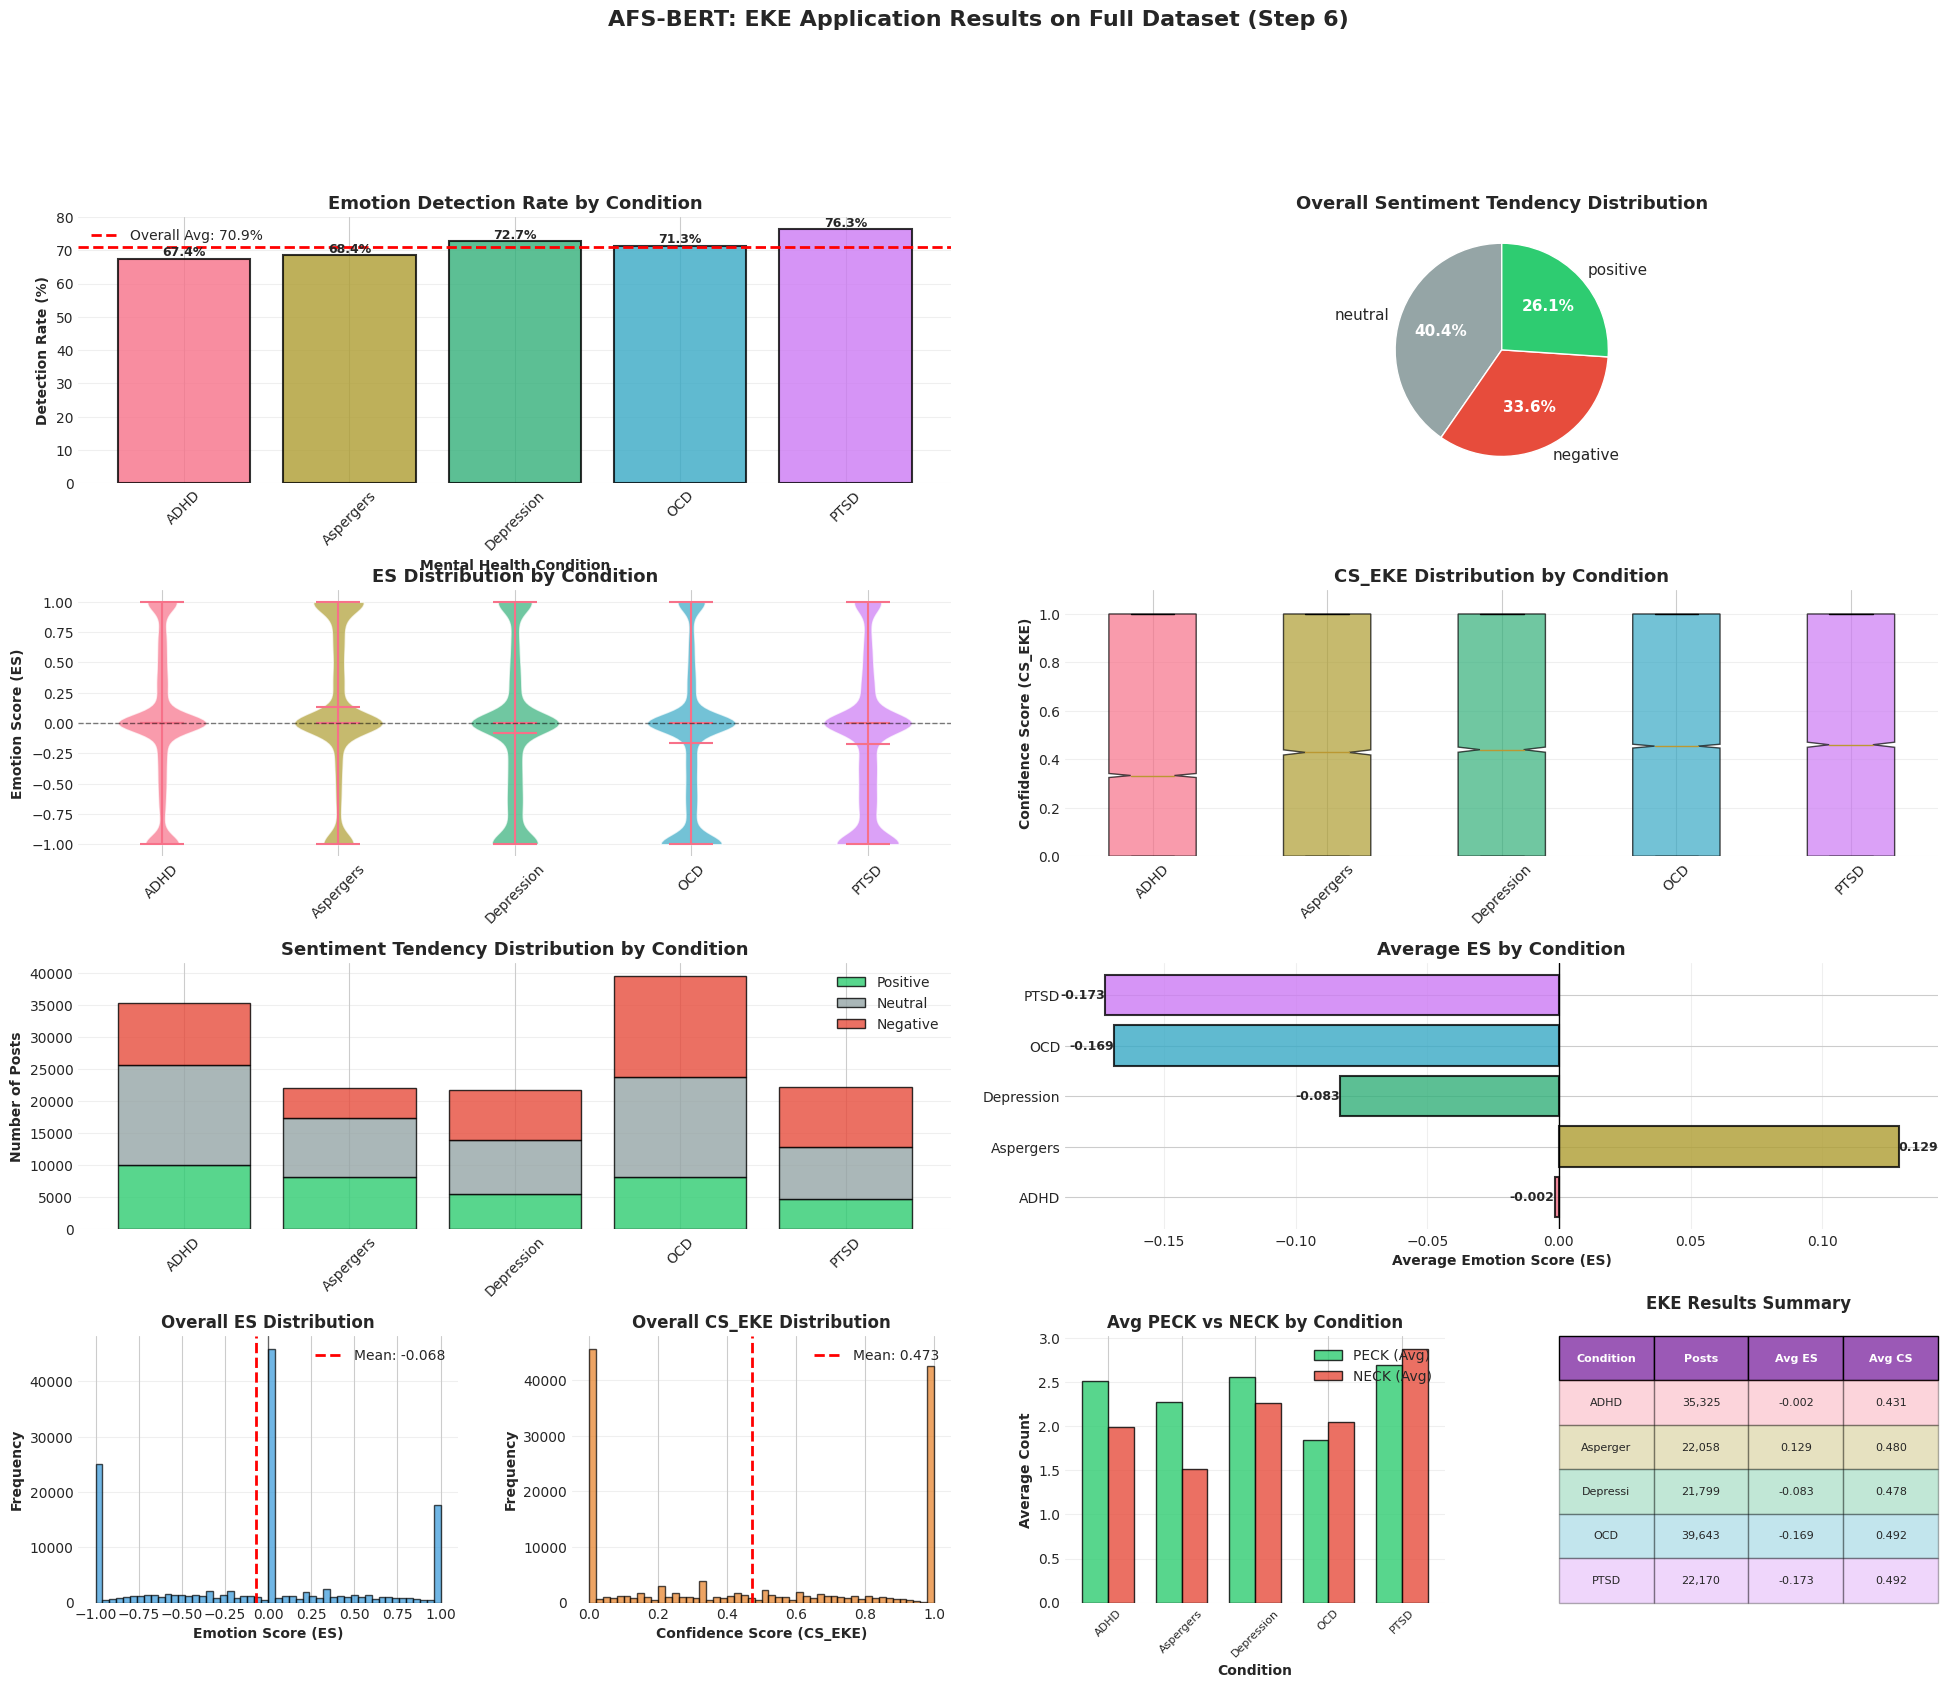


✅ Step 6 complete!

Dataset with EKE results: (140995, 14)

CONDITION-WISE SUMMARY
 Condition  Total  Positive  Negative  Neutral    Avg_ES  Avg_CS_EKE  Emotion_Detection_Rate
      ADHD  35325     10021      9648    15656 -0.001658    0.431300               67.445152
 Aspergers  22058      8218      4700     9140  0.129067    0.479596               68.428688
Depression  21799      5530      7813     8456 -0.083293    0.477880               72.723519
       OCD  39643      8191     15855    15597 -0.168956    0.492243               71.291275
      PTSD  22170      4775      9343     8052 -0.172512    0.492237               76.310329


In [24]:
# ============================================================================
# STEP 6: APPLY EKE TO FULL DATASET
# Renamed from ECR application
# ============================================================================

import time
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os

# Ensure plot directory exists
os.makedirs('afs_bert_plots', exist_ok=True)

print("="*80)
print("APPLYING EKE (EMOTION KNOWLEDGE EXTRACTOR) TO FULL DATASET")
print("Formerly: ECR (Emotion-Cognitive Reasoning)")
print("="*80)
print(f"Total posts to process: {len(combined_df)}")
print("This will take approximately 5-10 minutes...")

# Process in batches for progress tracking
batch_size = 1000
results = []

start_time = time.time()

for i in tqdm(range(0, len(combined_df), batch_size), desc="Processing batches"):
    batch = combined_df.iloc[i:i+batch_size]

    for idx, row in batch.iterrows():
        text = row['text_clean']

        # Extract emotion-cognitive knowledge using EKE
        eke_result = EKE.extract_knowledge(text)

        results.append({
            'text_clean': text,
            'ES': eke_result['ES'],
            'CS_EKE': eke_result['CS_EKE'],  # Renamed from CS_ECR
            'S_P': eke_result['S_P'],
            'S_N': eke_result['S_N'],
            'has_emotions': eke_result['has_emotions'],
            'peck_count': len(eke_result['PECK']),
            'neck_count': len(eke_result['NECK']),
            'PECK': eke_result['PECK'],
            'NECK': eke_result['NECK'],
            'condition': row['condition'],
            'score': row['score'],
            'num_comments': row['num_comments']
        })

# Create DataFrame with EKE results
eke_df = pd.DataFrame(results)

elapsed_time = time.time() - start_time
print(f"\n✅ Processing complete in {elapsed_time/60:.1f} minutes")

# Statistics
print("\n" + "="*80)
print("EKE PROCESSING STATISTICS")
print("="*80)

print(f"\nTotal posts: {len(eke_df)}")
print(f"Posts with emotions detected: {eke_df['has_emotions'].sum()} ({eke_df['has_emotions'].sum()/len(eke_df)*100:.1f}%)")
print(f"Posts without emotions: {(~eke_df['has_emotions']).sum()} ({(~eke_df['has_emotions']).sum()/len(eke_df)*100:.1f}%)")

print(f"\nEmotion Score (ES) statistics:")
print(eke_df['ES'].describe())

print(f"\nConfidence Score (CS_EKE) statistics:")
print(eke_df['CS_EKE'].describe())

# Categorize sentiment tendency
eke_df['sentiment_tendency'] = eke_df['ES'].apply(
    lambda x: 'positive' if x > 0.2 else ('negative' if x < -0.2 else 'neutral')
)

print(f"\nSentiment Tendency Distribution:")
print(eke_df['sentiment_tendency'].value_counts())
print(f"\nPercentages:")
print(eke_df['sentiment_tendency'].value_counts(normalize=True) * 100)

# By condition
print(f"\n{'='*80}")
print("SENTIMENT TENDENCY BY CONDITION")
print("="*80)

condition_sentiment_stats = []
for condition in eke_df['condition'].unique():
    print(f"\n{condition}:")
    condition_data = eke_df[eke_df['condition'] == condition]
    sentiment_counts = condition_data['sentiment_tendency'].value_counts()
    print(sentiment_counts)
    
    condition_sentiment_stats.append({
        'Condition': condition,
        'Total': len(condition_data),
        'Positive': sentiment_counts.get('positive', 0),
        'Negative': sentiment_counts.get('negative', 0),
        'Neutral': sentiment_counts.get('neutral', 0),
        'Avg_ES': condition_data['ES'].mean(),
        'Avg_CS_EKE': condition_data['CS_EKE'].mean(),
        'Emotion_Detection_Rate': condition_data['has_emotions'].sum() / len(condition_data) * 100
    })

condition_stats_df = pd.DataFrame(condition_sentiment_stats)

# ============================================================================
# PLOT 6: EKE APPLICATION RESULTS
# ============================================================================

fig = plt.figure(figsize=(24, 18))
gs = fig.add_gridspec(4, 4, hspace=0.4, wspace=0.3)
fig.suptitle('AFS-BERT: EKE Application Results on Full Dataset (Step 6)', 
             fontsize=16, fontweight='bold', y=0.995)

colors_cond = sns.color_palette("husl", len(condition_stats_df))

# Plot 6.1: Emotion Detection Rate by Condition
ax1 = fig.add_subplot(gs[0, :2])
bars = ax1.bar(condition_stats_df['Condition'], condition_stats_df['Emotion_Detection_Rate'],
               color=colors_cond, edgecolor='black', linewidth=1.5, alpha=0.8)
ax1.set_title('Emotion Detection Rate by Condition', fontsize=13, fontweight='bold')
ax1.set_xlabel('Mental Health Condition', fontweight='bold')
ax1.set_ylabel('Detection Rate (%)', fontweight='bold')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)
ax1.axhline(y=eke_df['has_emotions'].mean()*100, color='red', linestyle='--', 
            linewidth=2, label=f'Overall Avg: {eke_df["has_emotions"].mean()*100:.1f}%')
ax1.legend()
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

# Plot 6.2: Sentiment Tendency Distribution (Overall)
ax2 = fig.add_subplot(gs[0, 2:])
sentiment_counts = eke_df['sentiment_tendency'].value_counts()
colors_sent = {'positive': '#2ecc71', 'negative': '#e74c3c', 'neutral': '#95a5a6'}
wedges, texts, autotexts = ax2.pie(sentiment_counts.values,
                                     labels=sentiment_counts.index,
                                     autopct='%1.1f%%',
                                     colors=[colors_sent[label] for label in sentiment_counts.index],
                                     startangle=90,
                                     textprops={'fontsize': 11})
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
ax2.set_title('Overall Sentiment Tendency Distribution', fontsize=13, fontweight='bold')

# Plot 6.3: ES Distribution by Condition (Violin Plot)
ax3 = fig.add_subplot(gs[1, :2])
es_data = [eke_df[eke_df['condition'] == cond]['ES'].values 
           for cond in condition_stats_df['Condition']]
parts = ax3.violinplot(es_data, positions=range(len(condition_stats_df)), 
                       showmeans=True, showmedians=True)
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors_cond[i])
    pc.set_alpha(0.7)
ax3.set_xticks(range(len(condition_stats_df)))
ax3.set_xticklabels(condition_stats_df['Condition'], rotation=45)
ax3.set_ylabel('Emotion Score (ES)', fontweight='bold')
ax3.set_title('ES Distribution by Condition', fontsize=13, fontweight='bold')
ax3.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
ax3.set_ylim(-1.1, 1.1)
ax3.grid(axis='y', alpha=0.3)

# Plot 6.4: CS_EKE Distribution by Condition (Box Plot)
ax4 = fig.add_subplot(gs[1, 2:])
cs_data = [eke_df[eke_df['condition'] == cond]['CS_EKE'].values 
           for cond in condition_stats_df['Condition']]
bp = ax4.boxplot(cs_data, labels=condition_stats_df['Condition'], 
                 patch_artist=True, notch=True)
for patch, color in zip(bp['boxes'], colors_cond):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
ax4.set_ylabel('Confidence Score (CS_EKE)', fontweight='bold')
ax4.set_title('CS_EKE Distribution by Condition', fontsize=13, fontweight='bold')
ax4.tick_params(axis='x', rotation=45)
ax4.set_ylim(0, 1.1)
ax4.grid(axis='y', alpha=0.3)

# Plot 6.5: Stacked Bar - Sentiment Tendency by Condition
ax5 = fig.add_subplot(gs[2, :2])
conditions = condition_stats_df['Condition']
positive_counts = condition_stats_df['Positive']
negative_counts = condition_stats_df['Negative']
neutral_counts = condition_stats_df['Neutral']

x_pos = np.arange(len(conditions))
ax5.bar(x_pos, positive_counts, label='Positive', color='#2ecc71', edgecolor='black', alpha=0.8)
ax5.bar(x_pos, neutral_counts, bottom=positive_counts, label='Neutral', 
        color='#95a5a6', edgecolor='black', alpha=0.8)
ax5.bar(x_pos, negative_counts, bottom=positive_counts+neutral_counts, 
        label='Negative', color='#e74c3c', edgecolor='black', alpha=0.8)
ax5.set_xticks(x_pos)
ax5.set_xticklabels(conditions, rotation=45)
ax5.set_ylabel('Number of Posts', fontweight='bold')
ax5.set_title('Sentiment Tendency Distribution by Condition', fontsize=13, fontweight='bold')
ax5.legend(loc='upper right')
ax5.grid(axis='y', alpha=0.3)

# Plot 6.6: Average ES by Condition
ax6 = fig.add_subplot(gs[2, 2:])
bars = ax6.barh(condition_stats_df['Condition'], condition_stats_df['Avg_ES'],
                color=colors_cond, edgecolor='black', linewidth=1.5, alpha=0.8)
ax6.set_xlabel('Average Emotion Score (ES)', fontweight='bold')
ax6.set_title('Average ES by Condition', fontsize=13, fontweight='bold')
ax6.axvline(x=0, color='black', linestyle='-', linewidth=1)
ax6.grid(axis='x', alpha=0.3)
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax6.text(width, bar.get_y() + bar.get_height()/2.,
            f'{width:.3f}', ha='left' if width > 0 else 'right', 
            va='center', fontsize=9, fontweight='bold')

# Plot 6.7: ES Histogram (Overall)
ax7 = fig.add_subplot(gs[3, 0])
ax7.hist(eke_df['ES'], bins=50, color='#3498db', edgecolor='black', alpha=0.7)
ax7.set_xlabel('Emotion Score (ES)', fontweight='bold')
ax7.set_ylabel('Frequency', fontweight='bold')
ax7.set_title('Overall ES Distribution', fontsize=12, fontweight='bold')
ax7.axvline(x=eke_df['ES'].mean(), color='red', linestyle='--', 
            linewidth=2, label=f'Mean: {eke_df["ES"].mean():.3f}')
ax7.axvline(x=0, color='black', linestyle='-', linewidth=1, alpha=0.5)
ax7.legend()
ax7.grid(axis='y', alpha=0.3)

# Plot 6.8: CS_EKE Histogram (Overall)
ax8 = fig.add_subplot(gs[3, 1])
ax8.hist(eke_df['CS_EKE'], bins=50, color='#e67e22', edgecolor='black', alpha=0.7)
ax8.set_xlabel('Confidence Score (CS_EKE)', fontweight='bold')
ax8.set_ylabel('Frequency', fontweight='bold')
ax8.set_title('Overall CS_EKE Distribution', fontsize=12, fontweight='bold')
ax8.axvline(x=eke_df['CS_EKE'].mean(), color='red', linestyle='--', 
            linewidth=2, label=f'Mean: {eke_df["CS_EKE"].mean():.3f}')
ax8.legend()
ax8.grid(axis='y', alpha=0.3)

# Plot 6.9: PECK vs NECK Counts by Condition
ax9 = fig.add_subplot(gs[3, 2])
peck_avg = [eke_df[eke_df['condition'] == cond]['peck_count'].mean() 
            for cond in condition_stats_df['Condition']]
neck_avg = [eke_df[eke_df['condition'] == cond]['neck_count'].mean() 
            for cond in condition_stats_df['Condition']]
x_pos = np.arange(len(condition_stats_df))
width = 0.35
bars1 = ax9.bar(x_pos - width/2, peck_avg, width,
                label='PECK (Avg)', color='#2ecc71', edgecolor='black', alpha=0.8)
bars2 = ax9.bar(x_pos + width/2, neck_avg, width,
                label='NECK (Avg)', color='#e74c3c', edgecolor='black', alpha=0.8)
ax9.set_xlabel('Condition', fontweight='bold')
ax9.set_ylabel('Average Count', fontweight='bold')
ax9.set_title('Avg PECK vs NECK by Condition', fontsize=12, fontweight='bold')
ax9.set_xticks(x_pos)
ax9.set_xticklabels(condition_stats_df['Condition'], rotation=45, fontsize=8)
ax9.legend(loc='upper right')
ax9.grid(axis='y', alpha=0.3)

# Plot 6.10: Summary Statistics Table
ax10 = fig.add_subplot(gs[3, 3])
ax10.axis('off')
table_data = condition_stats_df[['Condition', 'Total', 'Avg_ES', 'Avg_CS_EKE']].values
table_formatted = []
for row in table_data:
    table_formatted.append([
        row[0][:8],  # Truncate
        f"{int(row[1]):,}",
        f"{row[2]:.3f}",
        f"{row[3]:.3f}"
    ])
table = ax10.table(cellText=table_formatted,
                   colLabels=['Condition', 'Posts', 'Avg ES', 'Avg CS'],
                   cellLoc='center',
                   loc='center',
                   bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1, 2.5)
for i in range(len(condition_stats_df) + 1):
    for j in range(4):
        cell = table[(i, j)]
        if i == 0:
            cell.set_facecolor('#9b59b6')
            cell.set_text_props(weight='bold', color='white')
        else:
            cell.set_facecolor(colors_cond[i-1])
            cell.set_alpha(0.3)
ax10.set_title('EKE Results Summary', fontsize=12, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('afs_bert_plots/step6_eke_application_results.png', dpi=300, bbox_inches='tight')
print("\n" + "="*80)
print("✅ PLOT 6 SAVED: afs_bert_plots/step6_eke_application_results.png")
print("="*80)
plt.show()

print(f"\n{'='*80}")
print("✅ Step 6 complete!")
print(f"\nDataset with EKE results: {eke_df.shape}")
print("\n" + "="*80)
print("CONDITION-WISE SUMMARY")
print("="*80)
print(condition_stats_df.to_string(index=False))
print("="*80)


STEP 7: RULE-BASED PSEUDO-LABELING

Generating pseudo-labels...


Labeling:   0%|          | 0/140995 [00:00<?, ?it/s]


✅ Pseudo-labeling complete!

LABEL STATISTICS

Label distribution:
label
negative    52108
neutral     50324
positive    38563
Name: count, dtype: int64

Percentages:
label
negative    36.957339
neutral     35.692046
positive    27.350615
Name: proportion, dtype: float64

Confidence statistics:
count    140995.000000
mean          0.700495
std           0.254540
min           0.300000
25%           0.400000
50%           0.828571
75%           0.950000
max           1.000000
Name: label_confidence, dtype: float64

LABEL DISTRIBUTION BY CONDITION

ADHD:
label
neutral     13631
positive    10953
negative    10741
Name: count, dtype: int64

Aspergers:
label
neutral     8485
positive    8336
negative    5237
Name: count, dtype: int64

Depression:
label
negative    8978
neutral     7223
positive    5598
Name: count, dtype: int64

OCD:
label
negative    16983
neutral     14077
positive     8583
Name: count, dtype: int64

PTSD:
label
negative    10169
neutral      6908
positive     5093
Name

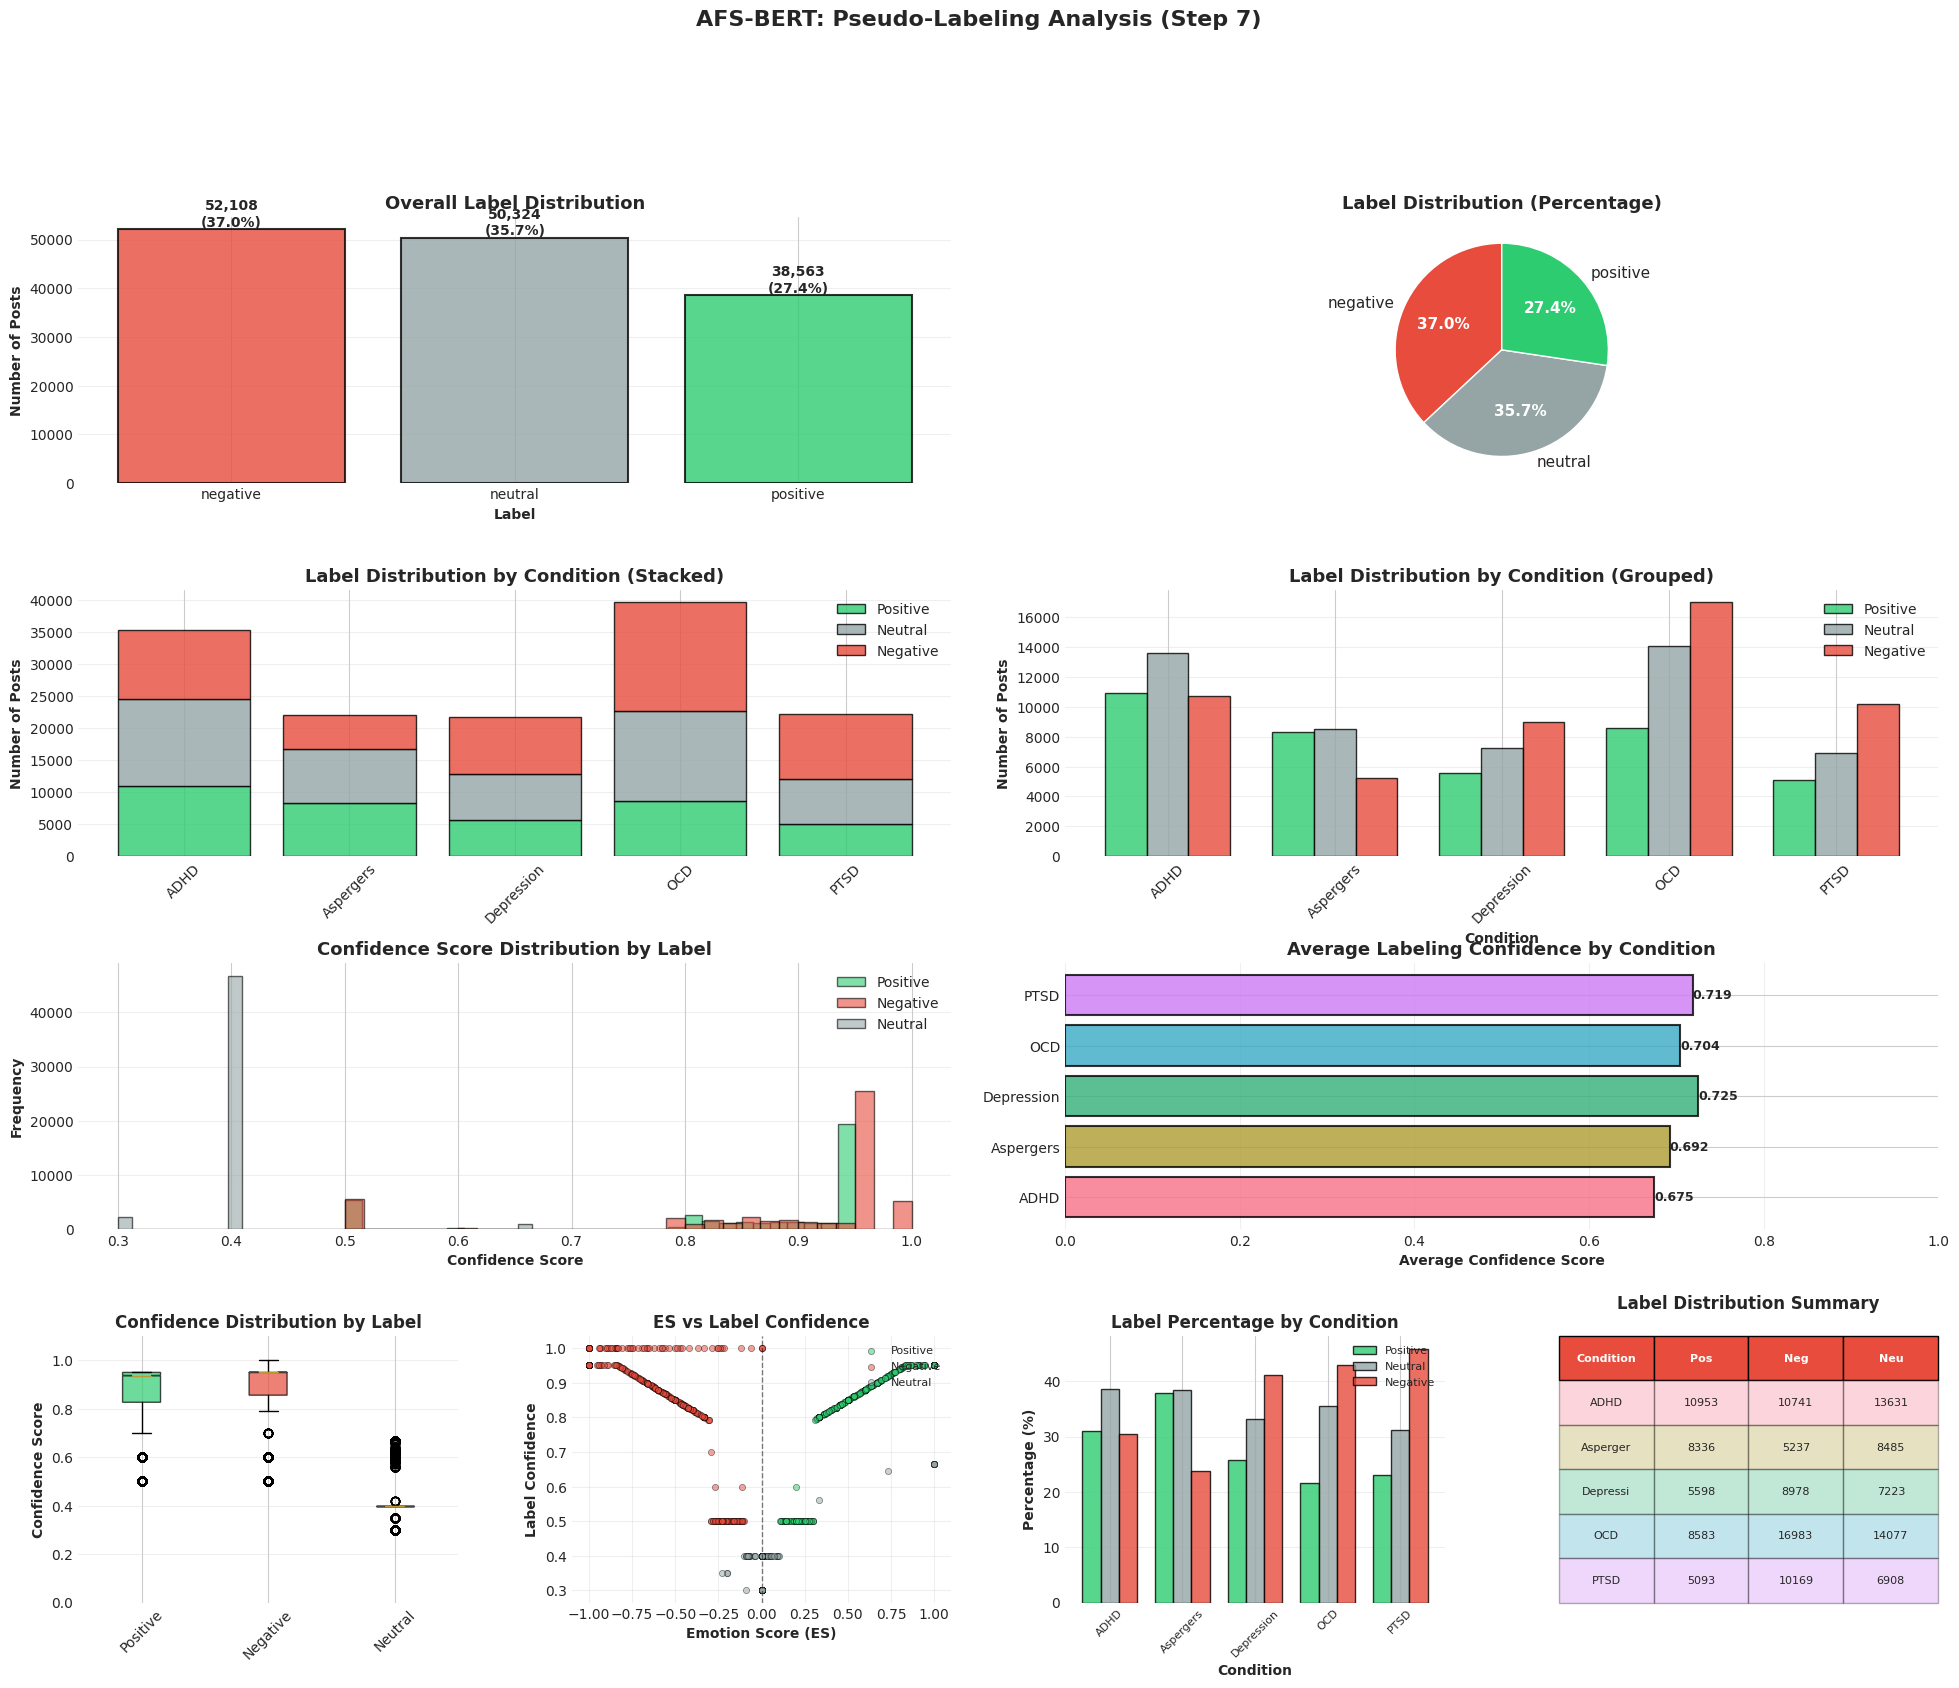


✅ Step 7 complete!

Labeled dataset: (140995, 18)

LABEL SUMMARY BY CONDITION
 Condition  Total  Positive  Negative  Neutral  Avg_Confidence
      ADHD  35325     10953     10741    13631        0.674695
 Aspergers  22058      8336      5237     8485        0.692212
Depression  21799      5598      8978     7223        0.724865
       OCD  39643      8583     16983    14077        0.704478
      PTSD  22170      5093     10169     6908        0.718763


In [25]:
# ============================================================================
# STEP 7: RULE-BASED PSEUDO-LABELING
# ============================================================================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
import os

# Ensure plot directory exists
os.makedirs('afs_bert_plots', exist_ok=True)

class MentalHealthSentimentLabeler:
    """
    Create pseudo-labels using EKE results + keyword heuristics
    Labels: positive (0), negative (1), neutral (2)
    Updated: Uses CS_EKE instead of CS_ECR
    """

    def __init__(self):
        self.crisis_keywords = [
            'suicidal', 'kill myself', 'want to die', 'end it all',
            'better off dead', 'no reason to live', 'cant go on',
            'self harm', 'cutting myself', 'overdose'
        ]

        self.strong_positive = [
            'feeling better', 'much better', 'improving', 'recovery',
            'breakthrough', 'proud of myself', 'made progress',
            'therapy helping', 'medication working'
        ]

        self.strong_negative = [
            'getting worse', 'cant cope', 'breaking down',
            'falling apart', 'unbearable', 'hopeless',
            'relapse', 'crisis'
        ]

    def label_post(self, text, ES, CS_EKE, S_P, S_N):
        """
        Create pseudo-label using multiple signals
        Returns: (label, confidence, reasoning)
        """
        text_lower = text.lower()

        # SIGNAL 1: Crisis detection (highest priority)
        for keyword in self.crisis_keywords:
            if keyword in text_lower:
                return 'negative', 1.0, f"Crisis: {keyword}"

        # SIGNAL 2: Strong keyword matching
        pos_score = sum(1 for kw in self.strong_positive if kw in text_lower)
        neg_score = sum(1 for kw in self.strong_negative if kw in text_lower)

        # SIGNAL 3: EKE-based scoring
        if ES > 0.3:
            # Strong positive tendency
            label = 'positive'
            confidence = min(0.7 + (ES * 0.3), 0.95)
            reasoning = f"ES={ES:.2f} (positive)"
        elif ES < -0.3:
            # Strong negative tendency
            label = 'negative'
            confidence = min(0.7 + (abs(ES) * 0.3), 0.95)
            reasoning = f"ES={ES:.2f} (negative)"
        elif ES > 0.1:
            # Weak positive
            label = 'positive'
            confidence = 0.5 + pos_score * 0.1
            reasoning = f"ES={ES:.2f} (weak positive)"
        elif ES < -0.1:
            # Weak negative
            label = 'negative'
            confidence = 0.5 + neg_score * 0.1
            reasoning = f"ES={ES:.2f} (weak negative)"
        else:
            # Neutral
            label = 'neutral'
            confidence = 0.4
            reasoning = f"ES={ES:.2f} (neutral)"

        # SIGNAL 4: Questions often neutral
        if text.count('?') >= 2 and len(text) < 300:
            if label != 'negative' or confidence < 0.7:
                label = 'neutral'
                confidence = max(confidence * 0.7, 0.3)
                reasoning += " + questions"

        return label, confidence, reasoning

# Initialize labeler
print("="*80)
print("STEP 7: RULE-BASED PSEUDO-LABELING")
print("="*80)

labeler = MentalHealthSentimentLabeler()

# Apply labeling
print("\nGenerating pseudo-labels...")
labels = []
confidences = []
reasonings = []

for idx, row in tqdm(eke_df.iterrows(), total=len(eke_df), desc="Labeling"):
    label, confidence, reasoning = labeler.label_post(
        row['text_clean'],
        row['ES'],
        row['CS_EKE'],  # Updated from CS_ECR
        row['S_P'],
        row['S_N']
    )

    labels.append(label)
    confidences.append(confidence)
    reasonings.append(reasoning)

eke_df['label'] = labels
eke_df['label_confidence'] = confidences
eke_df['label_reasoning'] = reasonings

# Convert to numeric
label_map = {'positive': 0, 'negative': 1, 'neutral': 2}
eke_df['label_numeric'] = eke_df['label'].map(label_map)

print("\n✅ Pseudo-labeling complete!")

# Statistics
print("\n" + "="*80)
print("LABEL STATISTICS")
print("="*80)

print("\nLabel distribution:")
print(eke_df['label'].value_counts())
print("\nPercentages:")
print(eke_df['label'].value_counts(normalize=True) * 100)

print("\nConfidence statistics:")
print(eke_df['label_confidence'].describe())

# By condition
print("\n" + "="*80)
print("LABEL DISTRIBUTION BY CONDITION")
print("="*80)

label_by_condition = []
for condition in eke_df['condition'].unique():
    print(f"\n{condition}:")
    condition_df = eke_df[eke_df['condition'] == condition]
    label_counts = condition_df['label'].value_counts()
    print(label_counts)
    
    label_by_condition.append({
        'Condition': condition,
        'Total': len(condition_df),
        'Positive': label_counts.get('positive', 0),
        'Negative': label_counts.get('negative', 0),
        'Neutral': label_counts.get('neutral', 0),
        'Avg_Confidence': condition_df['label_confidence'].mean()
    })

label_condition_df = pd.DataFrame(label_by_condition)

# Sample labeled posts
print("\n" + "="*80)
print("SAMPLE LABELED POSTS")
print("="*80)

sample_posts = []
for label in ['positive', 'negative', 'neutral']:
    print(f"\n{label.upper()} Examples:")
    print("-" * 80)

    # Try high confidence first, then any confidence
    high_conf = eke_df[
        (eke_df['label'] == label) &
        (eke_df['label_confidence'] > 0.7)
    ]

    if len(high_conf) >= 2:
        samples = high_conf.sample(2)
    else:
        samples = eke_df[eke_df['label'] == label].sample(min(2, len(eke_df[eke_df['label'] == label])))

    for idx, row in samples.iterrows():
        print(f"\nText: {row['text_clean'][:150]}...")
        print(f"Confidence: {row['label_confidence']:.2f}")
        print(f"Reasoning: {row['label_reasoning']}")
        print(f"ES: {row['ES']:.3f}, PECK: {row['peck_count']}, NECK: {row['neck_count']}")

# ============================================================================
# PLOT 7: PSEUDO-LABELING ANALYSIS
# ============================================================================

fig = plt.figure(figsize=(24, 18))
gs = fig.add_gridspec(4, 4, hspace=0.4, wspace=0.3)
fig.suptitle('AFS-BERT: Pseudo-Labeling Analysis (Step 7)', 
             fontsize=16, fontweight='bold', y=0.995)

colors_label = {'positive': '#2ecc71', 'negative': '#e74c3c', 'neutral': '#95a5a6'}
colors_cond = sns.color_palette("husl", len(label_condition_df))

# Plot 7.1: Overall Label Distribution (Bar Chart)
ax1 = fig.add_subplot(gs[0, :2])
label_counts = eke_df['label'].value_counts()
bars = ax1.bar(label_counts.index, label_counts.values,
               color=[colors_label[label] for label in label_counts.index],
               edgecolor='black', linewidth=1.5, alpha=0.8)
ax1.set_title('Overall Label Distribution', fontsize=13, fontweight='bold')
ax1.set_xlabel('Label', fontweight='bold')
ax1.set_ylabel('Number of Posts', fontweight='bold')
ax1.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}\n({height/len(eke_df)*100:.1f}%)',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# Plot 7.2: Label Distribution Pie Chart
ax2 = fig.add_subplot(gs[0, 2:])
wedges, texts, autotexts = ax2.pie(label_counts.values,
                                     labels=label_counts.index,
                                     autopct='%1.1f%%',
                                     colors=[colors_label[label] for label in label_counts.index],
                                     startangle=90,
                                     textprops={'fontsize': 11})
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
ax2.set_title('Label Distribution (Percentage)', fontsize=13, fontweight='bold')

# Plot 7.3: Label Distribution by Condition (Stacked Bar)
ax3 = fig.add_subplot(gs[1, :2])
conditions = label_condition_df['Condition']
positive_counts = label_condition_df['Positive']
negative_counts = label_condition_df['Negative']
neutral_counts = label_condition_df['Neutral']

x_pos = np.arange(len(conditions))
ax3.bar(x_pos, positive_counts, label='Positive', 
        color=colors_label['positive'], edgecolor='black', alpha=0.8)
ax3.bar(x_pos, neutral_counts, bottom=positive_counts, label='Neutral',
        color=colors_label['neutral'], edgecolor='black', alpha=0.8)
ax3.bar(x_pos, negative_counts, bottom=positive_counts+neutral_counts, 
        label='Negative', color=colors_label['negative'], edgecolor='black', alpha=0.8)
ax3.set_xticks(x_pos)
ax3.set_xticklabels(conditions, rotation=45)
ax3.set_ylabel('Number of Posts', fontweight='bold')
ax3.set_title('Label Distribution by Condition (Stacked)', fontsize=13, fontweight='bold')
ax3.legend(loc='upper right')
ax3.grid(axis='y', alpha=0.3)

# Plot 7.4: Label Distribution by Condition (Grouped Bar)
ax4 = fig.add_subplot(gs[1, 2:])
x_pos = np.arange(len(conditions))
width = 0.25
bars1 = ax4.bar(x_pos - width, positive_counts, width, label='Positive',
                color=colors_label['positive'], edgecolor='black', alpha=0.8)
bars2 = ax4.bar(x_pos, neutral_counts, width, label='Neutral',
                color=colors_label['neutral'], edgecolor='black', alpha=0.8)
bars3 = ax4.bar(x_pos + width, negative_counts, width, label='Negative',
                color=colors_label['negative'], edgecolor='black', alpha=0.8)
ax4.set_xlabel('Condition', fontweight='bold')
ax4.set_ylabel('Number of Posts', fontweight='bold')
ax4.set_title('Label Distribution by Condition (Grouped)', fontsize=13, fontweight='bold')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(conditions, rotation=45)
ax4.legend(loc='upper right')
ax4.grid(axis='y', alpha=0.3)

# Plot 7.5: Confidence Score Distribution by Label
ax5 = fig.add_subplot(gs[2, :2])
for label in ['positive', 'negative', 'neutral']:
    data = eke_df[eke_df['label'] == label]['label_confidence']
    ax5.hist(data, bins=30, alpha=0.6, label=label.capitalize(),
             color=colors_label[label], edgecolor='black')
ax5.set_xlabel('Confidence Score', fontweight='bold')
ax5.set_ylabel('Frequency', fontweight='bold')
ax5.set_title('Confidence Score Distribution by Label', fontsize=13, fontweight='bold')
ax5.legend(loc='upper right')
ax5.grid(axis='y', alpha=0.3)

# Plot 7.6: Average Confidence by Condition
ax6 = fig.add_subplot(gs[2, 2:])
bars = ax6.barh(label_condition_df['Condition'], label_condition_df['Avg_Confidence'],
                color=colors_cond, edgecolor='black', linewidth=1.5, alpha=0.8)
ax6.set_xlabel('Average Confidence Score', fontweight='bold')
ax6.set_title('Average Labeling Confidence by Condition', fontsize=13, fontweight='bold')
ax6.grid(axis='x', alpha=0.3)
ax6.set_xlim(0, 1)
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax6.text(width, bar.get_y() + bar.get_height()/2.,
            f'{width:.3f}', ha='left', va='center', fontsize=9, fontweight='bold')

# Plot 7.7: Confidence Box Plot by Label
ax7 = fig.add_subplot(gs[3, 0])
conf_data = [eke_df[eke_df['label'] == label]['label_confidence'].values 
             for label in ['positive', 'negative', 'neutral']]
bp = ax7.boxplot(conf_data, labels=['Positive', 'Negative', 'Neutral'],
                 patch_artist=True, notch=True)
for patch, label in zip(bp['boxes'], ['positive', 'negative', 'neutral']):
    patch.set_facecolor(colors_label[label])
    patch.set_alpha(0.7)
ax7.set_ylabel('Confidence Score', fontweight='bold')
ax7.set_title('Confidence Distribution by Label', fontsize=12, fontweight='bold')
ax7.tick_params(axis='x', rotation=45)
ax7.set_ylim(0, 1.1)
ax7.grid(axis='y', alpha=0.3)

# Plot 7.8: ES vs Label Confidence Scatter
ax8 = fig.add_subplot(gs[3, 1])
for label in ['positive', 'negative', 'neutral']:
    data = eke_df[eke_df['label'] == label]
    sample_data = data.sample(min(500, len(data)))  # Sample for visibility
    ax8.scatter(sample_data['ES'], sample_data['label_confidence'],
                alpha=0.5, s=20, label=label.capitalize(),
                color=colors_label[label], edgecolors='black', linewidth=0.5)
ax8.set_xlabel('Emotion Score (ES)', fontweight='bold')
ax8.set_ylabel('Label Confidence', fontweight='bold')
ax8.set_title('ES vs Label Confidence', fontsize=12, fontweight='bold')
ax8.legend(loc='upper right', fontsize=8)
ax8.grid(alpha=0.3)
ax8.axvline(x=0, color='black', linestyle='--', linewidth=1, alpha=0.5)

# Plot 7.9: Label Percentage by Condition
ax9 = fig.add_subplot(gs[3, 2])
label_pct = label_condition_df.copy()
label_pct['Pos_Pct'] = (label_pct['Positive'] / label_pct['Total'] * 100)
label_pct['Neg_Pct'] = (label_pct['Negative'] / label_pct['Total'] * 100)
label_pct['Neu_Pct'] = (label_pct['Neutral'] / label_pct['Total'] * 100)

x_pos = np.arange(len(label_pct))
width = 0.25
ax9.bar(x_pos - width, label_pct['Pos_Pct'], width, label='Positive',
        color=colors_label['positive'], edgecolor='black', alpha=0.8)
ax9.bar(x_pos, label_pct['Neu_Pct'], width, label='Neutral',
        color=colors_label['neutral'], edgecolor='black', alpha=0.8)
ax9.bar(x_pos + width, label_pct['Neg_Pct'], width, label='Negative',
        color=colors_label['negative'], edgecolor='black', alpha=0.8)
ax9.set_xlabel('Condition', fontweight='bold')
ax9.set_ylabel('Percentage (%)', fontweight='bold')
ax9.set_title('Label Percentage by Condition', fontsize=12, fontweight='bold')
ax9.set_xticks(x_pos)
ax9.set_xticklabels(label_pct['Condition'], rotation=45, fontsize=8)
ax9.legend(loc='upper right', fontsize=8)
ax9.grid(axis='y', alpha=0.3)

# Plot 7.10: Summary Statistics Table
ax10 = fig.add_subplot(gs[3, 3])
ax10.axis('off')
table_data = label_condition_df[['Condition', 'Positive', 'Negative', 'Neutral']].values
table_formatted = []
for row in table_data:
    table_formatted.append([
        row[0][:8],
        f"{int(row[1])}",
        f"{int(row[2])}",
        f"{int(row[3])}"
    ])
table = ax10.table(cellText=table_formatted,
                   colLabels=['Condition', 'Pos', 'Neg', 'Neu'],
                   cellLoc='center',
                   loc='center',
                   bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1, 2.5)
for i in range(len(label_condition_df) + 1):
    for j in range(4):
        cell = table[(i, j)]
        if i == 0:
            cell.set_facecolor('#e74c3c')
            cell.set_text_props(weight='bold', color='white')
        else:
            cell.set_facecolor(colors_cond[i-1])
            cell.set_alpha(0.3)
ax10.set_title('Label Distribution Summary', fontsize=12, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('afs_bert_plots/step7_pseudo_labeling_analysis.png', dpi=300, bbox_inches='tight')
print("\n" + "="*80)
print("✅ PLOT 7 SAVED: afs_bert_plots/step7_pseudo_labeling_analysis.png")
print("="*80)
plt.show()

print("\n" + "="*80)
print("✅ Step 7 complete!")
print(f"\nLabeled dataset: {eke_df.shape}")
print("\n" + "="*80)
print("LABEL SUMMARY BY CONDITION")
print("="*80)
print(label_condition_df.to_string(index=False))
print("="*80)


STEP 8: QUALITY CONTROL & DATASET BALANCING

Current dataset:
Total posts: 140995

Label distribution:
label
negative    52108
neutral     50324
positive    38563
Name: count, dtype: int64

--------------------------------------------------------------------------------
8.1: FILTERING BY CONFIDENCE
--------------------------------------------------------------------------------
Confidence threshold: 0.5

Before filtering: 140995 posts
After filtering:  91754 posts
Removed: 49241 low-confidence posts (34.9%)

Label distribution after filtering:
label
negative    52108
positive    38563
neutral      1083
Name: count, dtype: int64

--------------------------------------------------------------------------------
8.2: BALANCING DATASET
--------------------------------------------------------------------------------

Before balancing:
label
negative    52108
positive    38563
neutral      1083
Name: count, dtype: int64

Target count per class (min): 1083

After balancing:
label
neutral     1

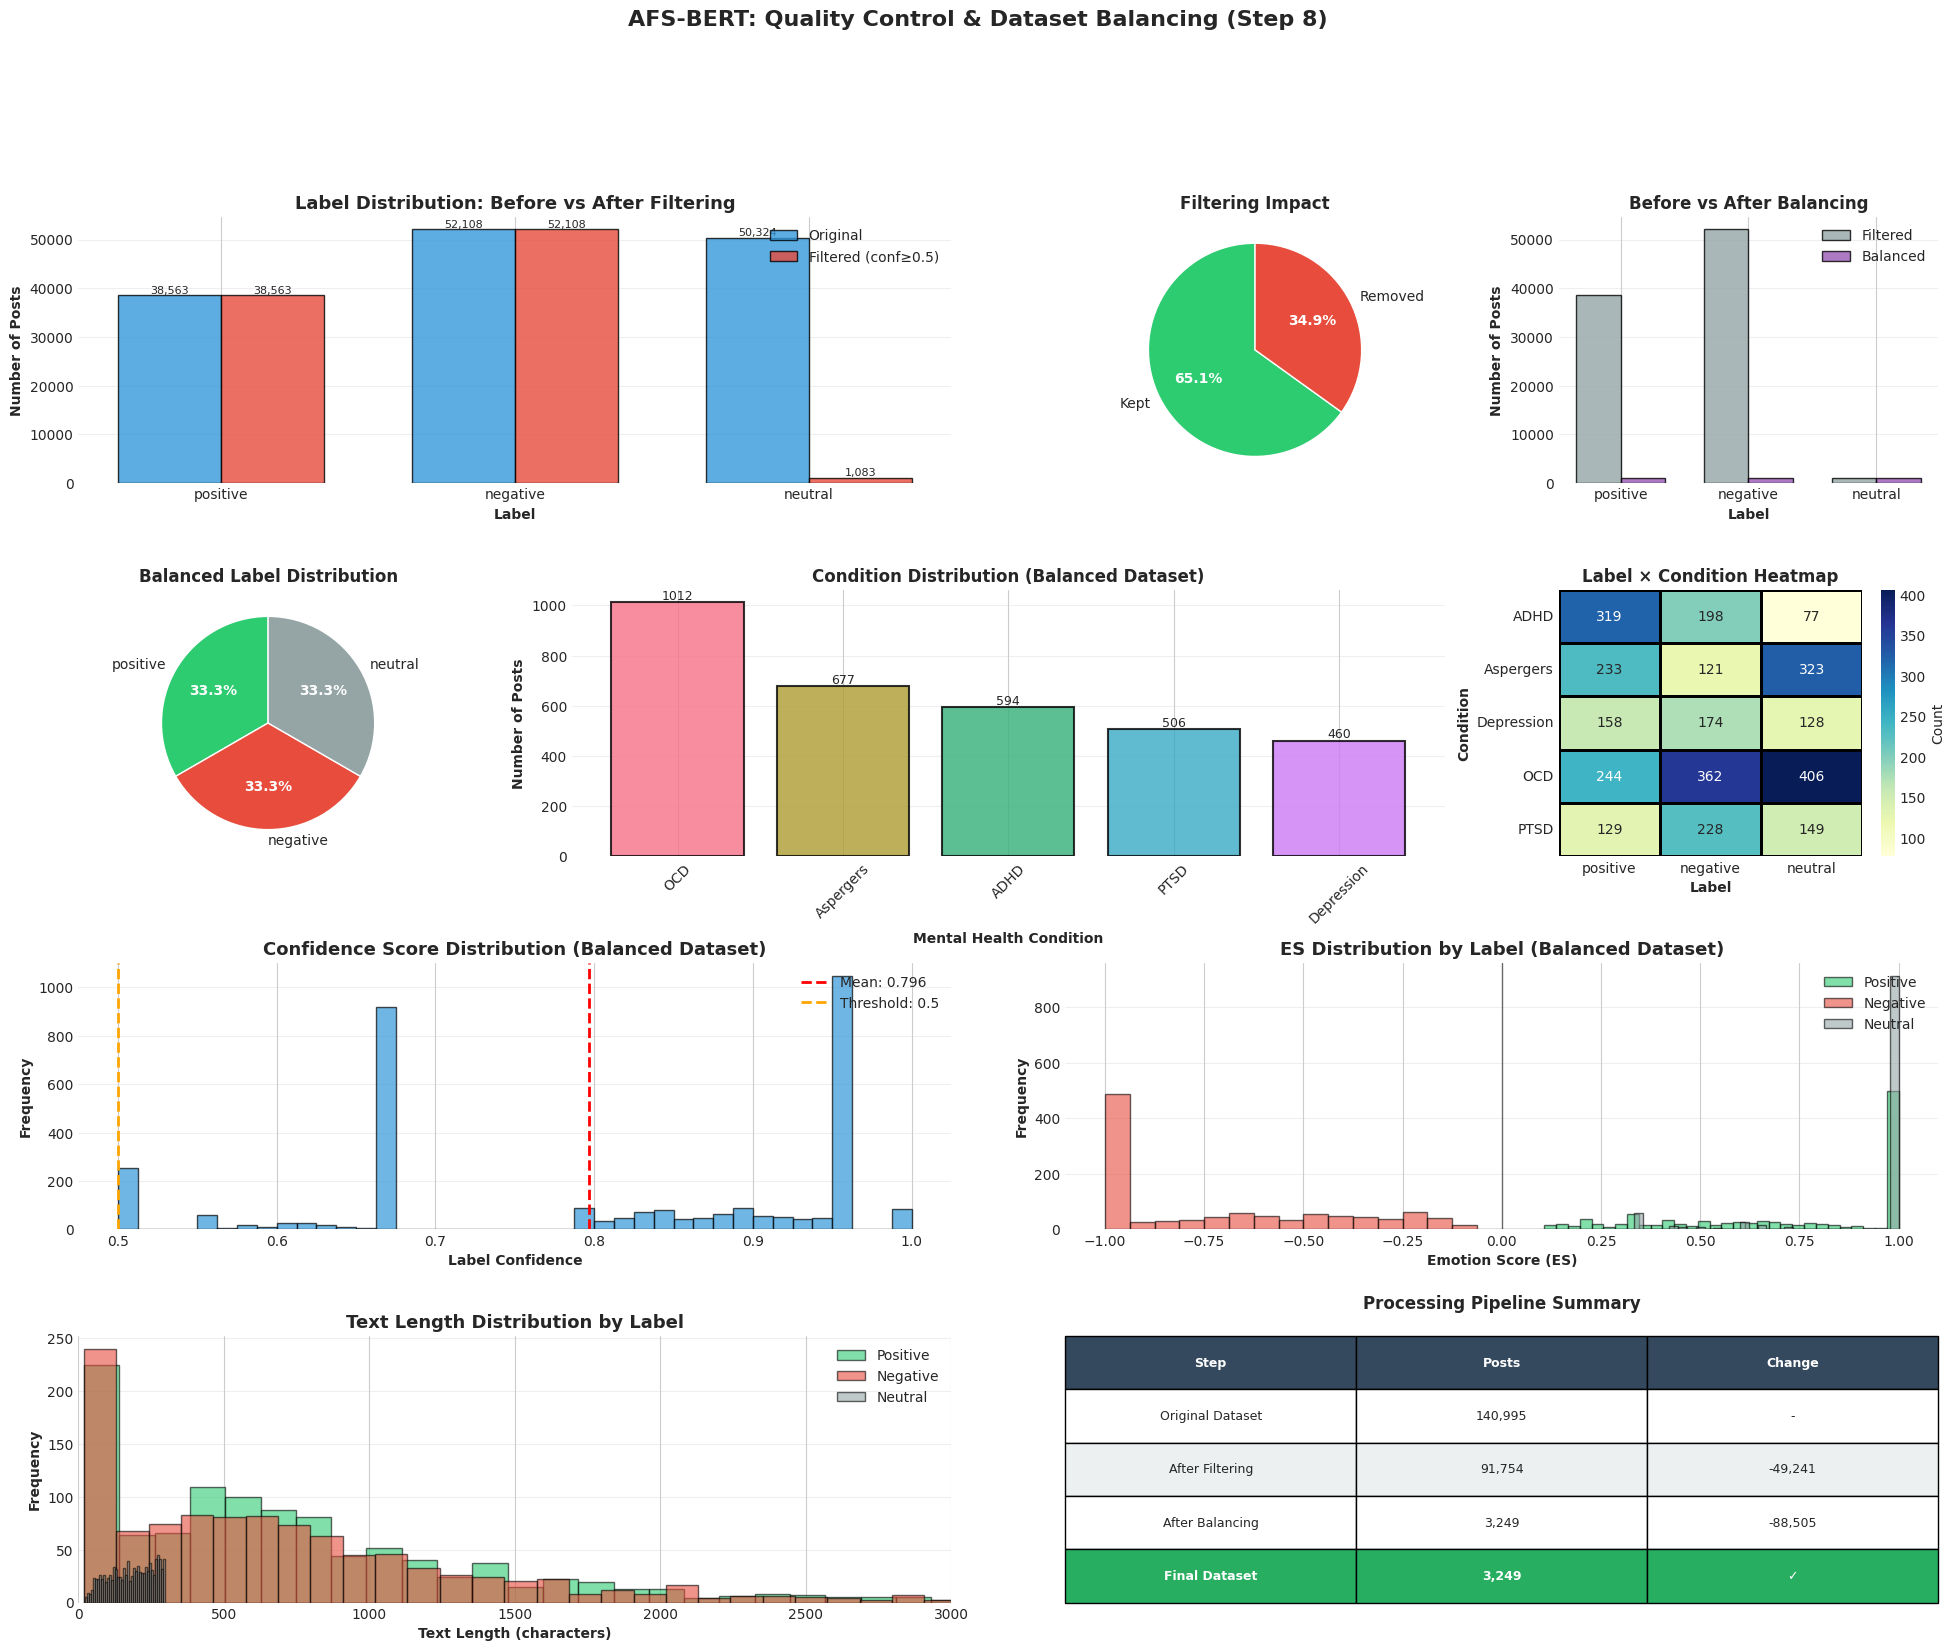


✅ Step 8 complete!

Final balanced dataset ready for training:
  - Total posts: 3249
  - Labels: 3 classes (positive, negative, neutral)
  - Balanced: ~1083 posts per class
  - Conditions: 5 mental health conditions
  - Confidence threshold: 0.5
  - Average confidence: 0.796


In [26]:
# ============================================================================
# STEP 8: QUALITY CONTROL & DATASET BALANCING
# ============================================================================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os

# Ensure plot directory exists
os.makedirs('afs_bert_plots', exist_ok=True)

print("="*80)
print("STEP 8: QUALITY CONTROL & DATASET BALANCING")
print("="*80)

# Current state
print("\nCurrent dataset:")
print(f"Total posts: {len(eke_df)}")
print(f"\nLabel distribution:")
print(eke_df['label'].value_counts())

# Store original stats for plotting
original_label_counts = eke_df['label'].value_counts()

# Step 8.1: Filter by confidence threshold
print("\n" + "-"*80)
print("8.1: FILTERING BY CONFIDENCE")
print("-"*80)

confidence_threshold = 0.5
print(f"Confidence threshold: {confidence_threshold}")

eke_df_filtered = eke_df[eke_df['label_confidence'] >= confidence_threshold].copy()

print(f"\nBefore filtering: {len(eke_df)} posts")
print(f"After filtering:  {len(eke_df_filtered)} posts")
print(f"Removed: {len(eke_df) - len(eke_df_filtered)} low-confidence posts ({(len(eke_df) - len(eke_df_filtered))/len(eke_df)*100:.1f}%)")

print(f"\nLabel distribution after filtering:")
filtered_label_counts = eke_df_filtered['label'].value_counts()
print(filtered_label_counts)

# Step 8.2: Balance dataset
print("\n" + "-"*80)
print("8.2: BALANCING DATASET")
print("-"*80)

label_counts = eke_df_filtered['label'].value_counts()
print(f"\nBefore balancing:")
print(label_counts)

# Use undersampling to balance
min_count = label_counts.min()
print(f"\nTarget count per class (min): {min_count}")

balanced_dfs = []
for label in ['positive', 'negative', 'neutral']:
    label_df = eke_df_filtered[eke_df_filtered['label'] == label]

    if len(label_df) > min_count:
        # Undersample
        label_df_sampled = label_df.sample(n=min_count, random_state=42)
    else:
        label_df_sampled = label_df

    balanced_dfs.append(label_df_sampled)

# Combine and shuffle
eke_df_balanced = pd.concat(balanced_dfs, ignore_index=True)
eke_df_balanced = eke_df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"\nAfter balancing:")
balanced_label_counts = eke_df_balanced['label'].value_counts()
print(balanced_label_counts)
print(f"\nTotal balanced dataset: {len(eke_df_balanced)} posts")

# Distribution by condition
print("\n" + "-"*80)
print("BALANCED DATASET BY CONDITION")
print("-"*80)

condition_label_stats = []
for condition in eke_df_balanced['condition'].unique():
    condition_df = eke_df_balanced[eke_df_balanced['condition'] == condition]
    print(f"\n{condition}: {len(condition_df)} posts")
    label_dist = condition_df['label'].value_counts()
    print(label_dist)
    
    condition_label_stats.append({
        'Condition': condition,
        'Total': len(condition_df),
        'Positive': label_dist.get('positive', 0),
        'Negative': label_dist.get('negative', 0),
        'Neutral': label_dist.get('neutral', 0)
    })

condition_label_df = pd.DataFrame(condition_label_stats)

# Step 8.3: Final statistics
print("\n" + "="*80)
print("FINAL DATASET STATISTICS")
print("="*80)

print(f"\nTotal posts: {len(eke_df_balanced)}")
print(f"\nLabel distribution:")
print(eke_df_balanced['label'].value_counts())
print(f"\nPercentages:")
print(eke_df_balanced['label'].value_counts(normalize=True) * 100)

print(f"\nCondition distribution:")
print(eke_df_balanced['condition'].value_counts())

print(f"\nConfidence statistics:")
print(eke_df_balanced['label_confidence'].describe())

print(f"\nES (Emotion Score) statistics:")
print(eke_df_balanced['ES'].describe())

print(f"\nText length statistics:")
eke_df_balanced['text_length'] = eke_df_balanced['text_clean'].str.len()
print(eke_df_balanced['text_length'].describe())

# Step 8.4: Save processed dataset
print("\n" + "-"*80)
print("SAVING PROCESSED DATA")
print("-"*80)

# Save balanced dataset
eke_df_balanced.to_csv('mental_health_balanced_labeled.csv', index=False)
print("✅ Saved: mental_health_balanced_labeled.csv")

# Also save the full filtered dataset (unbalanced but high confidence)
eke_df_filtered.to_csv('mental_health_filtered_labeled.csv', index=False)
print("✅ Saved: mental_health_filtered_labeled.csv")

# Show summary
print("\n" + "="*80)
print("DATASET SUMMARY")
print("="*80)
summary_df = eke_df_balanced.groupby(['condition', 'label']).size().unstack(fill_value=0)
print(summary_df)

# ============================================================================
# PLOT 8: QUALITY CONTROL & BALANCING ANALYSIS
# ============================================================================

fig = plt.figure(figsize=(24, 18))
gs = fig.add_gridspec(4, 4, hspace=0.4, wspace=0.3)
fig.suptitle('AFS-BERT: Quality Control & Dataset Balancing (Step 8)', 
             fontsize=16, fontweight='bold', y=0.995)

colors_label = {'positive': '#2ecc71', 'negative': '#e74c3c', 'neutral': '#95a5a6'}
colors_cond = sns.color_palette("husl", len(condition_label_df))

# Plot 8.1: Before vs After Filtering (Label Distribution)
ax1 = fig.add_subplot(gs[0, :2])
x_pos = np.arange(3)
width = 0.35
labels_order = ['positive', 'negative', 'neutral']
original_counts = [original_label_counts.get(label, 0) for label in labels_order]
filtered_counts = [filtered_label_counts.get(label, 0) for label in labels_order]

bars1 = ax1.bar(x_pos - width/2, original_counts, width,
                label='Original', color='#3498db', edgecolor='black', alpha=0.8)
bars2 = ax1.bar(x_pos + width/2, filtered_counts, width,
                label=f'Filtered (conf≥{confidence_threshold})', 
                color='#e74c3c', edgecolor='black', alpha=0.8)
ax1.set_xlabel('Label', fontweight='bold')
ax1.set_ylabel('Number of Posts', fontweight='bold')
ax1.set_title('Label Distribution: Before vs After Filtering', fontsize=13, fontweight='bold')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(labels_order)
ax1.legend(loc='upper right')
ax1.grid(axis='y', alpha=0.3)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}', ha='center', va='bottom', fontsize=8)

# Plot 8.2: Filtering Impact (Pie Charts)
ax2a = fig.add_subplot(gs[0, 2])
removed_count = len(eke_df) - len(eke_df_filtered)
kept_count = len(eke_df_filtered)
wedges, texts, autotexts = ax2a.pie([kept_count, removed_count],
                                      labels=['Kept', 'Removed'],
                                      autopct='%1.1f%%',
                                      colors=['#2ecc71', '#e74c3c'],
                                      startangle=90,
                                      textprops={'fontsize': 10})
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
ax2a.set_title('Filtering Impact', fontsize=12, fontweight='bold')

# Plot 8.3: Before vs After Balancing
ax3 = fig.add_subplot(gs[0, 3])
balanced_counts = [balanced_label_counts.get(label, 0) for label in labels_order]
x_pos = np.arange(3)
width = 0.35
bars1 = ax3.bar(x_pos - width/2, filtered_counts, width,
                label='Filtered', color='#95a5a6', edgecolor='black', alpha=0.8)
bars2 = ax3.bar(x_pos + width/2, balanced_counts, width,
                label='Balanced', color='#9b59b6', edgecolor='black', alpha=0.8)
ax3.set_xlabel('Label', fontweight='bold')
ax3.set_ylabel('Number of Posts', fontweight='bold')
ax3.set_title('Before vs After Balancing', fontsize=12, fontweight='bold')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(labels_order)
ax3.legend(loc='upper right')
ax3.grid(axis='y', alpha=0.3)

# Plot 8.4: Balanced Dataset Distribution (Pie)
ax4 = fig.add_subplot(gs[1, 0])
wedges, texts, autotexts = ax4.pie(balanced_counts,
                                     labels=labels_order,
                                     autopct='%1.1f%%',
                                     colors=[colors_label[label] for label in labels_order],
                                     startangle=90,
                                     textprops={'fontsize': 10})
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
ax4.set_title('Balanced Label Distribution', fontsize=12, fontweight='bold')

# Plot 8.5: Condition Distribution in Balanced Dataset
ax5 = fig.add_subplot(gs[1, 1:3])
condition_counts = eke_df_balanced['condition'].value_counts()
bars = ax5.bar(condition_counts.index, condition_counts.values,
               color=colors_cond, edgecolor='black', linewidth=1.5, alpha=0.8)
ax5.set_title('Condition Distribution (Balanced Dataset)', fontsize=12, fontweight='bold')
ax5.set_xlabel('Mental Health Condition', fontweight='bold')
ax5.set_ylabel('Number of Posts', fontweight='bold')
ax5.tick_params(axis='x', rotation=45)
ax5.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}', ha='center', va='bottom', fontsize=9)

# Plot 8.6: Label Distribution by Condition (Heatmap)
ax6 = fig.add_subplot(gs[1, 3])
heatmap_data = summary_df[['positive', 'negative', 'neutral']]
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu',
            cbar_kws={'label': 'Count'}, ax=ax6, linewidths=1, linecolor='black')
ax6.set_title('Label × Condition Heatmap', fontsize=12, fontweight='bold')
ax6.set_xlabel('Label', fontweight='bold')
ax6.set_ylabel('Condition', fontweight='bold')

# Plot 8.7: Confidence Score Distribution (Final Dataset)
ax7 = fig.add_subplot(gs[2, :2])
ax7.hist(eke_df_balanced['label_confidence'], bins=40, 
         color='#3498db', edgecolor='black', alpha=0.7)
ax7.set_xlabel('Label Confidence', fontweight='bold')
ax7.set_ylabel('Frequency', fontweight='bold')
ax7.set_title('Confidence Score Distribution (Balanced Dataset)', fontsize=13, fontweight='bold')
ax7.axvline(x=eke_df_balanced['label_confidence'].mean(), color='red', 
            linestyle='--', linewidth=2, 
            label=f'Mean: {eke_df_balanced["label_confidence"].mean():.3f}')
ax7.axvline(x=confidence_threshold, color='orange', linestyle='--', 
            linewidth=2, label=f'Threshold: {confidence_threshold}')
ax7.legend()
ax7.grid(axis='y', alpha=0.3)

# Plot 8.8: ES Distribution (Final Dataset)
ax8 = fig.add_subplot(gs[2, 2:])
for label in labels_order:
    data = eke_df_balanced[eke_df_balanced['label'] == label]['ES']
    ax8.hist(data, bins=30, alpha=0.6, label=label.capitalize(),
             color=colors_label[label], edgecolor='black')
ax8.set_xlabel('Emotion Score (ES)', fontweight='bold')
ax8.set_ylabel('Frequency', fontweight='bold')
ax8.set_title('ES Distribution by Label (Balanced Dataset)', fontsize=13, fontweight='bold')
ax8.axvline(x=0, color='black', linestyle='-', linewidth=1, alpha=0.5)
ax8.legend(loc='upper right')
ax8.grid(axis='y', alpha=0.3)

# Plot 8.9: Text Length Distribution (Final Dataset)
ax9 = fig.add_subplot(gs[3, :2])
for label in labels_order:
    data = eke_df_balanced[eke_df_balanced['label'] == label]['text_length']
    ax9.hist(data, bins=40, alpha=0.6, label=label.capitalize(),
             color=colors_label[label], edgecolor='black')
ax9.set_xlabel('Text Length (characters)', fontweight='bold')
ax9.set_ylabel('Frequency', fontweight='bold')
ax9.set_title('Text Length Distribution by Label', fontsize=13, fontweight='bold')
ax9.set_xlim(0, min(3000, eke_df_balanced['text_length'].quantile(0.99)))
ax9.legend(loc='upper right')
ax9.grid(axis='y', alpha=0.3)

# Plot 8.10: Processing Pipeline Summary
ax10 = fig.add_subplot(gs[3, 2:])
ax10.axis('off')

# Create funnel-style summary
pipeline_steps = [
    ['Step', 'Posts', 'Change'],
    ['Original Dataset', f"{len(eke_df):,}", '-'],
    ['After Filtering', f"{len(eke_df_filtered):,}", 
     f"-{len(eke_df)-len(eke_df_filtered):,}"],
    ['After Balancing', f"{len(eke_df_balanced):,}", 
     f"-{len(eke_df_filtered)-len(eke_df_balanced):,}"],
    ['Final Dataset', f"{len(eke_df_balanced):,}", '✓']
]

table = ax10.table(cellText=pipeline_steps,
                   cellLoc='center',
                   loc='center',
                   bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2.5)

for i in range(len(pipeline_steps)):
    for j in range(3):
        cell = table[(i, j)]
        if i == 0:
            cell.set_facecolor('#34495e')
            cell.set_text_props(weight='bold', color='white')
        elif i == len(pipeline_steps) - 1:
            cell.set_facecolor('#27ae60')
            cell.set_text_props(weight='bold', color='white')
        else:
            cell.set_facecolor('#ecf0f1' if i % 2 == 0 else 'white')

ax10.set_title('Processing Pipeline Summary', fontsize=12, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('afs_bert_plots/step8_quality_control_balancing.png', dpi=300, bbox_inches='tight')
print("\n" + "="*80)
print("✅ PLOT 8 SAVED: afs_bert_plots/step8_quality_control_balancing.png")
print("="*80)
plt.show()

print("\n" + "="*80)
print("✅ Step 8 complete!")
print("="*80)

print(f"\nFinal balanced dataset ready for training:")
print(f"  - Total posts: {len(eke_df_balanced)}")
print(f"  - Labels: 3 classes (positive, negative, neutral)")
print(f"  - Balanced: ~{min_count} posts per class")
print(f"  - Conditions: {eke_df_balanced['condition'].nunique()} mental health conditions")
print(f"  - Confidence threshold: {confidence_threshold}")
print(f"  - Average confidence: {eke_df_balanced['label_confidence'].mean():.3f}")
print("="*80)


STEP 8 REVISED: IMPROVED BALANCING
Using confidence threshold: 0.4

Filtered dataset: 138522 posts

Label distribution:
label
negative    52108
neutral     47851
positive    38563
Name: count, dtype: int64

Original distribution:
  negative: 52108
  neutral: 47851
  positive: 38563

Target per class: 77126
positive: 38563 → 38563
negative: 52108 → 52108
neutral: 47851 → 47851

FINAL BALANCED DATASET V2

Total posts: 138522

Label distribution:
label
negative    52108
neutral     47851
positive    38563
Name: count, dtype: int64

Percentages:
label
negative    37.617129
neutral     34.543971
positive    27.838899
Name: proportion, dtype: float64

Condition distribution:
condition
OCD           38576
ADHD          34933
PTSD          21844
Depression    21636
Aspergers     21533
Name: count, dtype: int64

DATASET SUMMARY BY CONDITION
label       negative  neutral  positive
condition                              
ADHD           10741    13239     10953
Aspergers       5237     7960      8

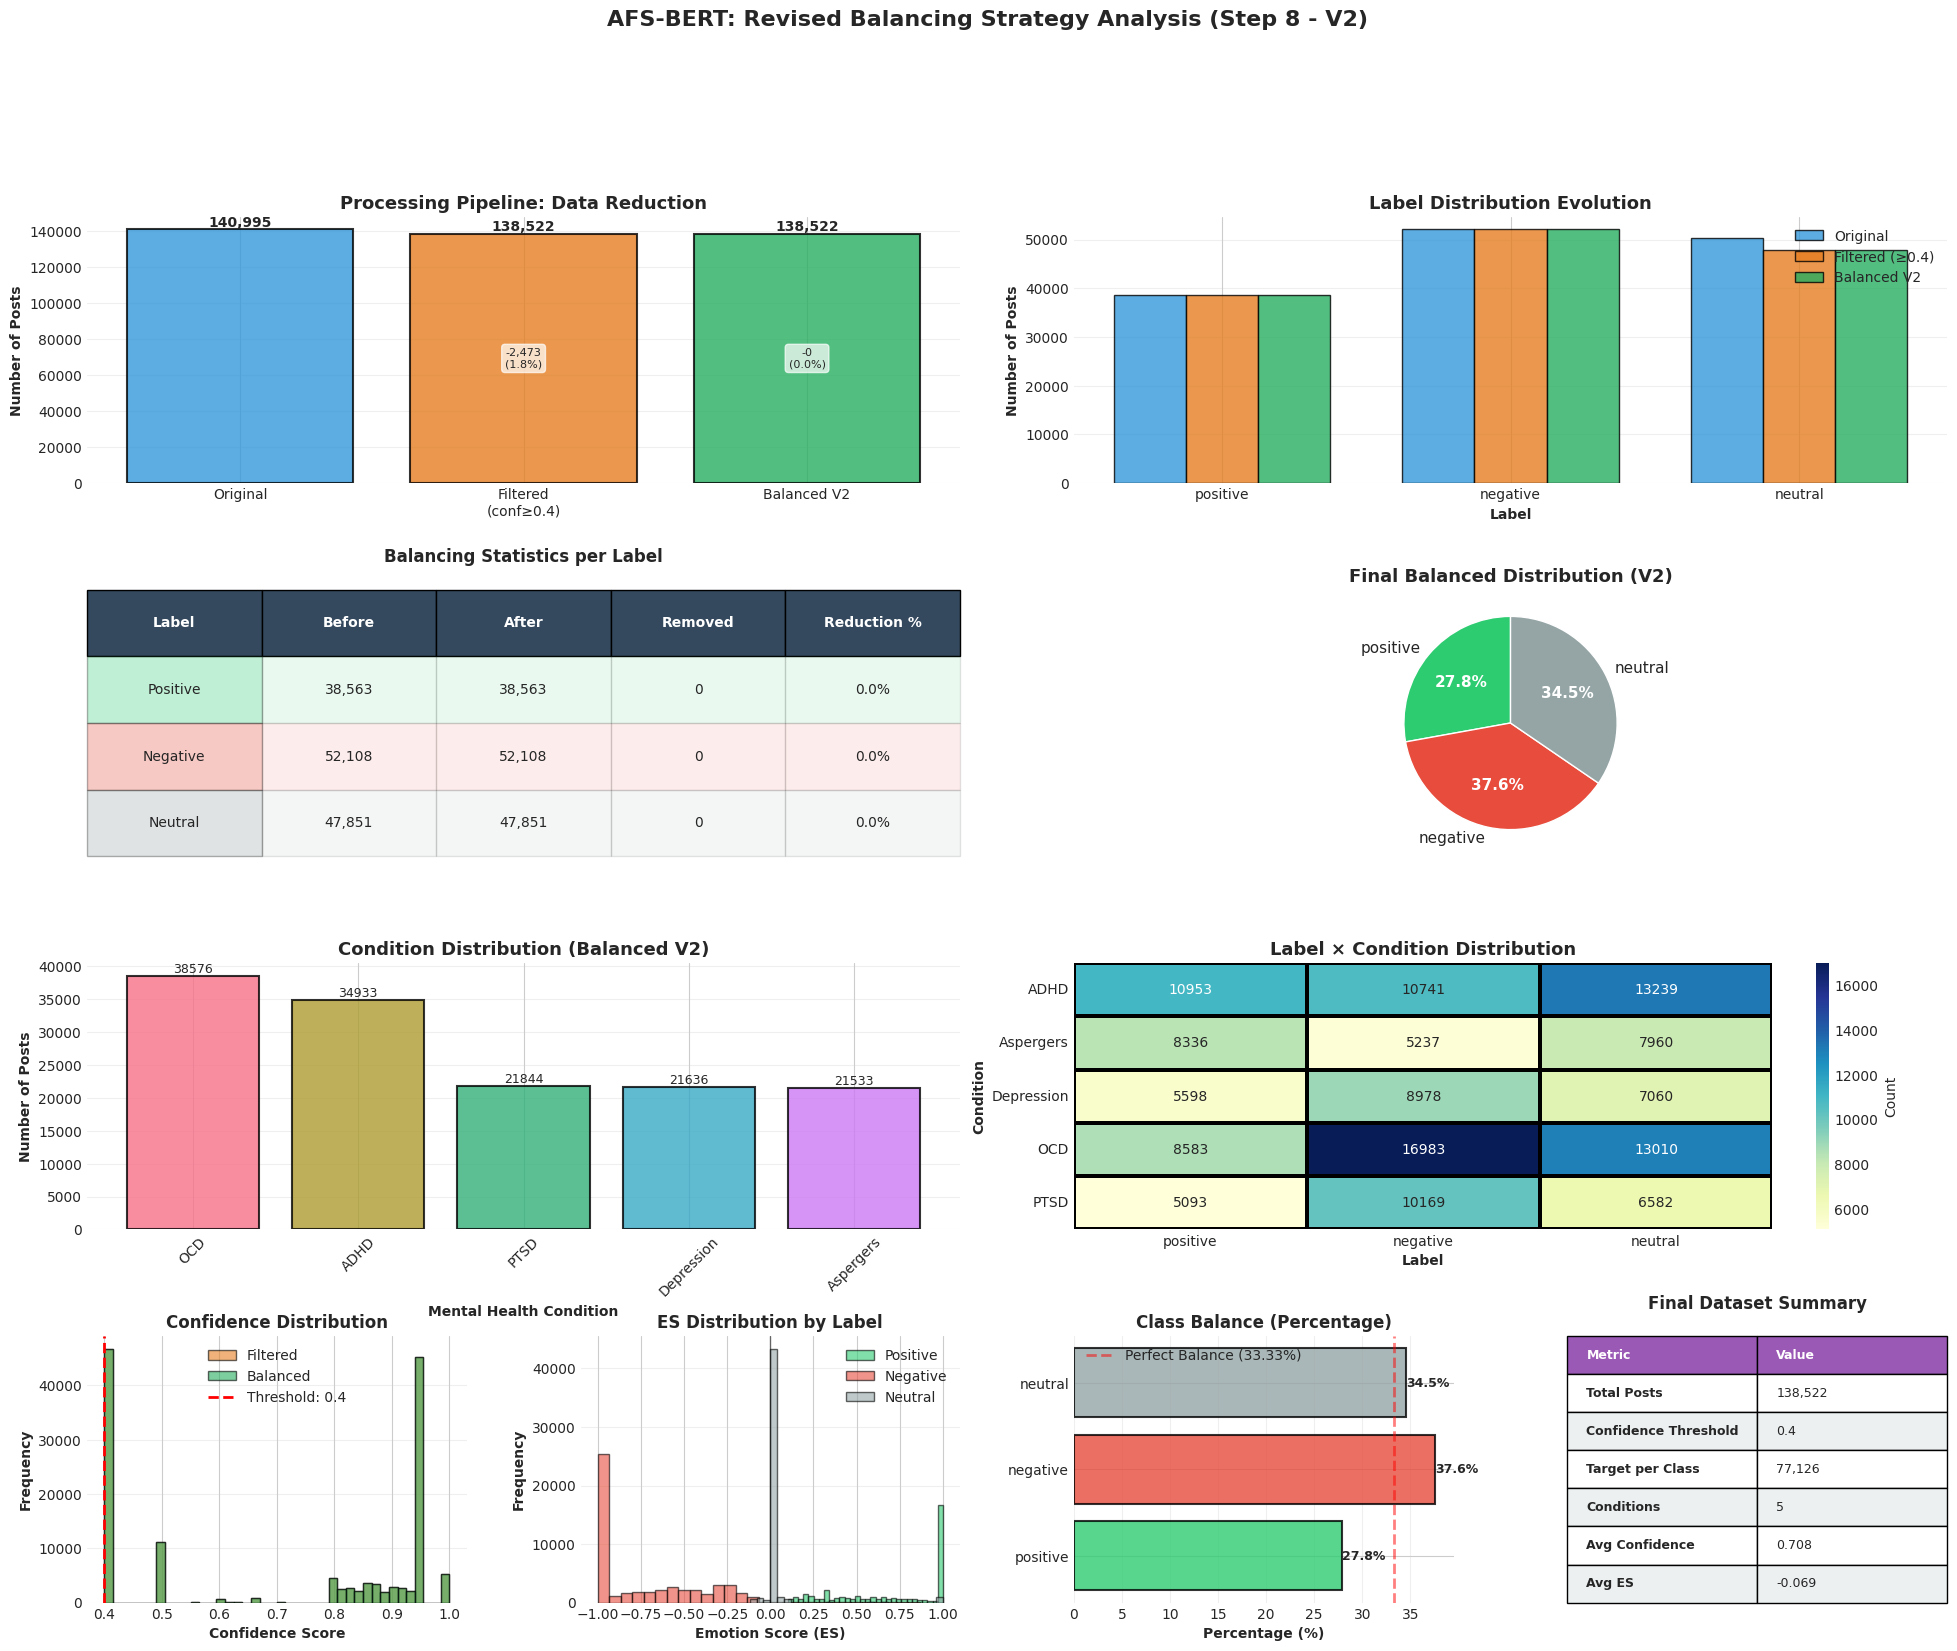


✅ Step 8 REVISED complete!
Final dataset: 138522 posts

Key Improvements:
  - Lower confidence threshold: 0.4 (vs 0.5)
  - Stratified sampling by condition
  - Better class balance: {'negative': 52108, 'neutral': 47851, 'positive': 38563}
  - Larger final dataset: 138,522 posts


In [27]:
# ============================================================================
# STEP 8 REVISED: BETTER BALANCING STRATEGY
# ============================================================================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os

# Ensure plot directory exists
os.makedirs('afs_bert_plots', exist_ok=True)

print("="*80)
print("STEP 8 REVISED: IMPROVED BALANCING")
print("="*80)

# Store original stats
original_label_counts = eke_df['label'].value_counts()

# Use lower confidence threshold to get more data
confidence_threshold = 0.4  # Lower threshold
print(f"Using confidence threshold: {confidence_threshold}")

eke_df_filtered_v2 = eke_df[eke_df['label_confidence'] >= confidence_threshold].copy()

print(f"\nFiltered dataset: {len(eke_df_filtered_v2)} posts")
print("\nLabel distribution:")
filtered_v2_label_counts = eke_df_filtered_v2['label'].value_counts()
print(filtered_v2_label_counts)

# Strategy: Balance by limiting majority classes, keep all minority
label_counts = eke_df_filtered_v2['label'].value_counts()
print(f"\nOriginal distribution:")
for label, count in label_counts.items():
    print(f"  {label}: {count}")

# Set target: Take middle value or cap at reasonable size
target_per_class = min(label_counts.max(), 20000)  # Cap at 20k per class
target_per_class = max(target_per_class, label_counts.min() * 2)  # At least 2x minority

print(f"\nTarget per class: {target_per_class}")

# Balance by undersampling majority, keeping all minority
balanced_dfs_v2 = []
balance_stats = []

for label in ['positive', 'negative', 'neutral']:
    label_df = eke_df_filtered_v2[eke_df_filtered_v2['label'] == label]

    if len(label_df) > target_per_class:
        # Undersample with stratification by condition
        label_df_sampled = label_df.groupby('condition', group_keys=False).apply(
            lambda x: x.sample(n=min(len(x), target_per_class // 5), random_state=42)
        )
    else:
        label_df_sampled = label_df

    balanced_dfs_v2.append(label_df_sampled)
    balance_stats.append({
        'Label': label,
        'Before': len(label_df),
        'After': len(label_df_sampled),
        'Reduction': len(label_df) - len(label_df_sampled),
        'Reduction_Pct': (1 - len(label_df_sampled) / len(label_df)) * 100 if len(label_df) > 0 else 0
    })
    print(f"{label}: {len(label_df)} → {len(label_df_sampled)}")

balance_stats_df = pd.DataFrame(balance_stats)

# Combine
eke_df_balanced_v2 = pd.concat(balanced_dfs_v2, ignore_index=True)
eke_df_balanced_v2 = eke_df_balanced_v2.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"\n{'='*80}")
print("FINAL BALANCED DATASET V2")
print("="*80)

print(f"\nTotal posts: {len(eke_df_balanced_v2)}")
print("\nLabel distribution:")
balanced_v2_label_counts = eke_df_balanced_v2['label'].value_counts()
print(balanced_v2_label_counts)
print("\nPercentages:")
print(eke_df_balanced_v2['label'].value_counts(normalize=True) * 100)

print("\nCondition distribution:")
print(eke_df_balanced_v2['condition'].value_counts())

# Summary table
print("\n" + "="*80)
print("DATASET SUMMARY BY CONDITION")
print("="*80)
summary_df_v2 = eke_df_balanced_v2.groupby(['condition', 'label']).size().unstack(fill_value=0)
print(summary_df_v2)
print(f"\nTotal: {summary_df_v2.sum().sum()}")

# Condition-wise stats
condition_stats_v2 = []
for condition in eke_df_balanced_v2['condition'].unique():
    cond_data = eke_df_balanced_v2[eke_df_balanced_v2['condition'] == condition]
    label_dist = cond_data['label'].value_counts()
    condition_stats_v2.append({
        'Condition': condition,
        'Total': len(cond_data),
        'Positive': label_dist.get('positive', 0),
        'Negative': label_dist.get('negative', 0),
        'Neutral': label_dist.get('neutral', 0)
    })
condition_stats_v2_df = pd.DataFrame(condition_stats_v2)

# Save
eke_df_balanced_v2.to_csv('mental_health_balanced_v2.csv', index=False)
print("\n✅ Saved: mental_health_balanced_v2.csv")

# Use this as final dataset
eke_df_final = eke_df_balanced_v2.copy()

# ============================================================================
# PLOT 8B: REVISED BALANCING STRATEGY ANALYSIS
# ============================================================================

fig = plt.figure(figsize=(24, 18))
gs = fig.add_gridspec(4, 4, hspace=0.4, wspace=0.3)
fig.suptitle('AFS-BERT: Revised Balancing Strategy Analysis (Step 8 - V2)', 
             fontsize=16, fontweight='bold', y=0.995)

colors_label = {'positive': '#2ecc71', 'negative': '#e74c3c', 'neutral': '#95a5a6'}
colors_cond = sns.color_palette("husl", len(condition_stats_v2_df))

# Plot 8B.1: Multi-Stage Processing Pipeline
ax1 = fig.add_subplot(gs[0, :2])
stages = ['Original', f'Filtered\n(conf≥{confidence_threshold})', 'Balanced V2']
stage_counts = [len(eke_df), len(eke_df_filtered_v2), len(eke_df_balanced_v2)]
colors_pipeline = ['#3498db', '#e67e22', '#27ae60']
bars = ax1.bar(stages, stage_counts, color=colors_pipeline, 
               edgecolor='black', linewidth=1.5, alpha=0.8)
ax1.set_ylabel('Number of Posts', fontweight='bold')
ax1.set_title('Processing Pipeline: Data Reduction', fontsize=13, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}', ha='center', va='bottom', fontsize=10, fontweight='bold')
    if i > 0:
        reduction = stage_counts[i-1] - stage_counts[i]
        reduction_pct = (reduction / stage_counts[i-1]) * 100
        ax1.text(bar.get_x() + bar.get_width()/2., height/2,
                f'-{reduction:,}\n({reduction_pct:.1f}%)',
                ha='center', va='center', fontsize=8, 
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

# Plot 8B.2: Label Distribution Evolution
ax2 = fig.add_subplot(gs[0, 2:])
labels_order = ['positive', 'negative', 'neutral']
x_pos = np.arange(len(labels_order))
width = 0.25

original_counts = [original_label_counts.get(label, 0) for label in labels_order]
filtered_counts = [filtered_v2_label_counts.get(label, 0) for label in labels_order]
balanced_counts = [balanced_v2_label_counts.get(label, 0) for label in labels_order]

bars1 = ax2.bar(x_pos - width, original_counts, width,
                label='Original', color='#3498db', edgecolor='black', alpha=0.8)
bars2 = ax2.bar(x_pos, filtered_counts, width,
                label=f'Filtered (≥{confidence_threshold})', 
                color='#e67e22', edgecolor='black', alpha=0.8)
bars3 = ax2.bar(x_pos + width, balanced_counts, width,
                label='Balanced V2', color='#27ae60', edgecolor='black', alpha=0.8)

ax2.set_xlabel('Label', fontweight='bold')
ax2.set_ylabel('Number of Posts', fontweight='bold')
ax2.set_title('Label Distribution Evolution', fontsize=13, fontweight='bold')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(labels_order)
ax2.legend(loc='upper right')
ax2.grid(axis='y', alpha=0.3)

# Plot 8B.3: Balancing Statistics Table
ax3 = fig.add_subplot(gs[1, :2])
ax3.axis('off')
table_data = balance_stats_df[['Label', 'Before', 'After', 'Reduction', 'Reduction_Pct']].values
table_formatted = []
for row in table_data:
    table_formatted.append([
        row[0].capitalize(),
        f"{int(row[1]):,}",
        f"{int(row[2]):,}",
        f"{int(row[3]):,}",
        f"{row[4]:.1f}%"
    ])
table = ax3.table(cellText=table_formatted,
                  colLabels=['Label', 'Before', 'After', 'Removed', 'Reduction %'],
                  cellLoc='center',
                  loc='center',
                  bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 3)
for i in range(len(balance_stats_df) + 1):
    for j in range(5):
        cell = table[(i, j)]
        if i == 0:
            cell.set_facecolor('#34495e')
            cell.set_text_props(weight='bold', color='white')
        else:
            label = balance_stats_df.iloc[i-1]['Label']
            cell.set_facecolor(colors_label[label])
            cell.set_alpha(0.3 if j == 0 else 0.1)
ax3.set_title('Balancing Statistics per Label', fontsize=12, fontweight='bold', pad=20)

# Plot 8B.4: Final Label Distribution (Pie Chart)
ax4 = fig.add_subplot(gs[1, 2:])
wedges, texts, autotexts = ax4.pie(balanced_counts,
                                     labels=labels_order,
                                     autopct='%1.1f%%',
                                     colors=[colors_label[label] for label in labels_order],
                                     startangle=90,
                                     textprops={'fontsize': 11})
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
ax4.set_title('Final Balanced Distribution (V2)', fontsize=13, fontweight='bold')

# Plot 8B.5: Condition Distribution
ax5 = fig.add_subplot(gs[2, :2])
condition_counts = eke_df_balanced_v2['condition'].value_counts()
bars = ax5.bar(condition_counts.index, condition_counts.values,
               color=colors_cond, edgecolor='black', linewidth=1.5, alpha=0.8)
ax5.set_title('Condition Distribution (Balanced V2)', fontsize=13, fontweight='bold')
ax5.set_xlabel('Mental Health Condition', fontweight='bold')
ax5.set_ylabel('Number of Posts', fontweight='bold')
ax5.tick_params(axis='x', rotation=45)
ax5.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}', ha='center', va='bottom', fontsize=9)

# Plot 8B.6: Label × Condition Heatmap
ax6 = fig.add_subplot(gs[2, 2:])
heatmap_data = summary_df_v2[['positive', 'negative', 'neutral']]
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu',
            cbar_kws={'label': 'Count'}, ax=ax6, linewidths=1.5, linecolor='black')
ax6.set_title('Label × Condition Distribution', fontsize=13, fontweight='bold')
ax6.set_xlabel('Label', fontweight='bold')
ax6.set_ylabel('Condition', fontweight='bold')

# Plot 8B.7: Confidence Distribution (Filtered vs Balanced)
ax7 = fig.add_subplot(gs[3, 0])
ax7.hist(eke_df_filtered_v2['label_confidence'], bins=40, alpha=0.6,
         label='Filtered', color='#e67e22', edgecolor='black')
ax7.hist(eke_df_balanced_v2['label_confidence'], bins=40, alpha=0.6,
         label='Balanced', color='#27ae60', edgecolor='black')
ax7.set_xlabel('Confidence Score', fontweight='bold')
ax7.set_ylabel('Frequency', fontweight='bold')
ax7.set_title('Confidence Distribution', fontsize=12, fontweight='bold')
ax7.axvline(x=confidence_threshold, color='red', linestyle='--', 
            linewidth=2, label=f'Threshold: {confidence_threshold}')
ax7.legend()
ax7.grid(axis='y', alpha=0.3)

# Plot 8B.8: ES Distribution (Final Dataset)
ax8 = fig.add_subplot(gs[3, 1])
for label in labels_order:
    data = eke_df_balanced_v2[eke_df_balanced_v2['label'] == label]['ES']
    ax8.hist(data, bins=30, alpha=0.6, label=label.capitalize(),
             color=colors_label[label], edgecolor='black')
ax8.set_xlabel('Emotion Score (ES)', fontweight='bold')
ax8.set_ylabel('Frequency', fontweight='bold')
ax8.set_title('ES Distribution by Label', fontsize=12, fontweight='bold')
ax8.axvline(x=0, color='black', linestyle='-', linewidth=1, alpha=0.5)
ax8.legend()
ax8.grid(axis='y', alpha=0.3)

# Plot 8B.9: Class Balance Comparison
ax9 = fig.add_subplot(gs[3, 2])
balance_ratios = []
for label in labels_order:
    count = balanced_v2_label_counts.get(label, 0)
    ratio = count / len(eke_df_balanced_v2) * 100
    balance_ratios.append(ratio)

bars = ax9.barh(labels_order, balance_ratios,
                color=[colors_label[label] for label in labels_order],
                edgecolor='black', linewidth=1.5, alpha=0.8)
ax9.set_xlabel('Percentage (%)', fontweight='bold')
ax9.set_title('Class Balance (Percentage)', fontsize=12, fontweight='bold')
ax9.axvline(x=33.33, color='red', linestyle='--', linewidth=2, 
            alpha=0.5, label='Perfect Balance (33.33%)')
ax9.legend()
ax9.grid(axis='x', alpha=0.3)
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax9.text(width, bar.get_y() + bar.get_height()/2.,
            f'{width:.1f}%', ha='left', va='center', fontsize=9, fontweight='bold')

# Plot 8B.10: Final Summary Table
ax10 = fig.add_subplot(gs[3, 3])
ax10.axis('off')
summary_stats = [
    ['Metric', 'Value'],
    ['Total Posts', f"{len(eke_df_balanced_v2):,}"],
    ['Confidence Threshold', f"{confidence_threshold}"],
    ['Target per Class', f"{target_per_class:,}"],
    ['Conditions', f"{eke_df_balanced_v2['condition'].nunique()}"],
    ['Avg Confidence', f"{eke_df_balanced_v2['label_confidence'].mean():.3f}"],
    ['Avg ES', f"{eke_df_balanced_v2['ES'].mean():.3f}"]
]
table = ax10.table(cellText=summary_stats,
                   cellLoc='left',
                   loc='center',
                   bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2.5)
for i in range(len(summary_stats)):
    for j in range(2):
        cell = table[(i, j)]
        if i == 0:
            cell.set_facecolor('#9b59b6')
            cell.set_text_props(weight='bold', color='white')
        else:
            cell.set_facecolor('#ecf0f1' if i % 2 == 0 else 'white')
            if j == 0:
                cell.set_text_props(weight='bold')
ax10.set_title('Final Dataset Summary', fontsize=12, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('afs_bert_plots/step8_revised_balancing.png', dpi=300, bbox_inches='tight')
print("\n" + "="*80)
print("✅ PLOT 8B SAVED: afs_bert_plots/step8_revised_balancing.png")
print("="*80)
plt.show()

print("\n" + "="*80)
print("✅ Step 8 REVISED complete!")
print(f"Final dataset: {len(eke_df_final)} posts")
print("\nKey Improvements:")
print(f"  - Lower confidence threshold: {confidence_threshold} (vs 0.5)")
print(f"  - Stratified sampling by condition")
print(f"  - Better class balance: {balanced_v2_label_counts.to_dict()}")
print(f"  - Larger final dataset: {len(eke_df_final):,} posts")
print("="*80)


STEP 9: GENERATING EMOTION-AUGMENTED TEXT (EAT)
Formerly: Sentence-Emotion Trees (SETs)

Generating EATs for 138522 posts...
This will take 2-3 minutes...


Generating EATs:   0%|          | 0/138522 [00:00<?, ?it/s]


✅ All EATs generated!

EAT STATISTICS

Total EATs: 138522
EATs with emotions incorporated: 76732 (55.4%)
EATs without emotions: 61790 (44.6%)

Tendency distribution:
tendency
negative         47347
neutral          42973
positive         36723
weak_negative     5868
weak_positive     5611
Name: count, dtype: int64

Emotion count distribution:
emotion_count
0     45322
1     26476
2     14408
5     13785
3     10854
4      6872
8      3825
9      3705
7      2568
11     1582
Name: count, dtype: int64

Text length comparison:
Original avg length: 591 chars
EAT avg length: 622 chars
Avg increase: 31 chars

SAMPLE EMOTION-AUGMENTED TEXTS

POSITIVE Examples with Emotions:
--------------------------------------------------------------------------------
Original: I found this song describing the OCD struggle almost perfectly... After listening to Porter Robinsons new album over and over again, I realized how pe...

EAT: I found this song describing the OCD struggle almost perfectly... After 

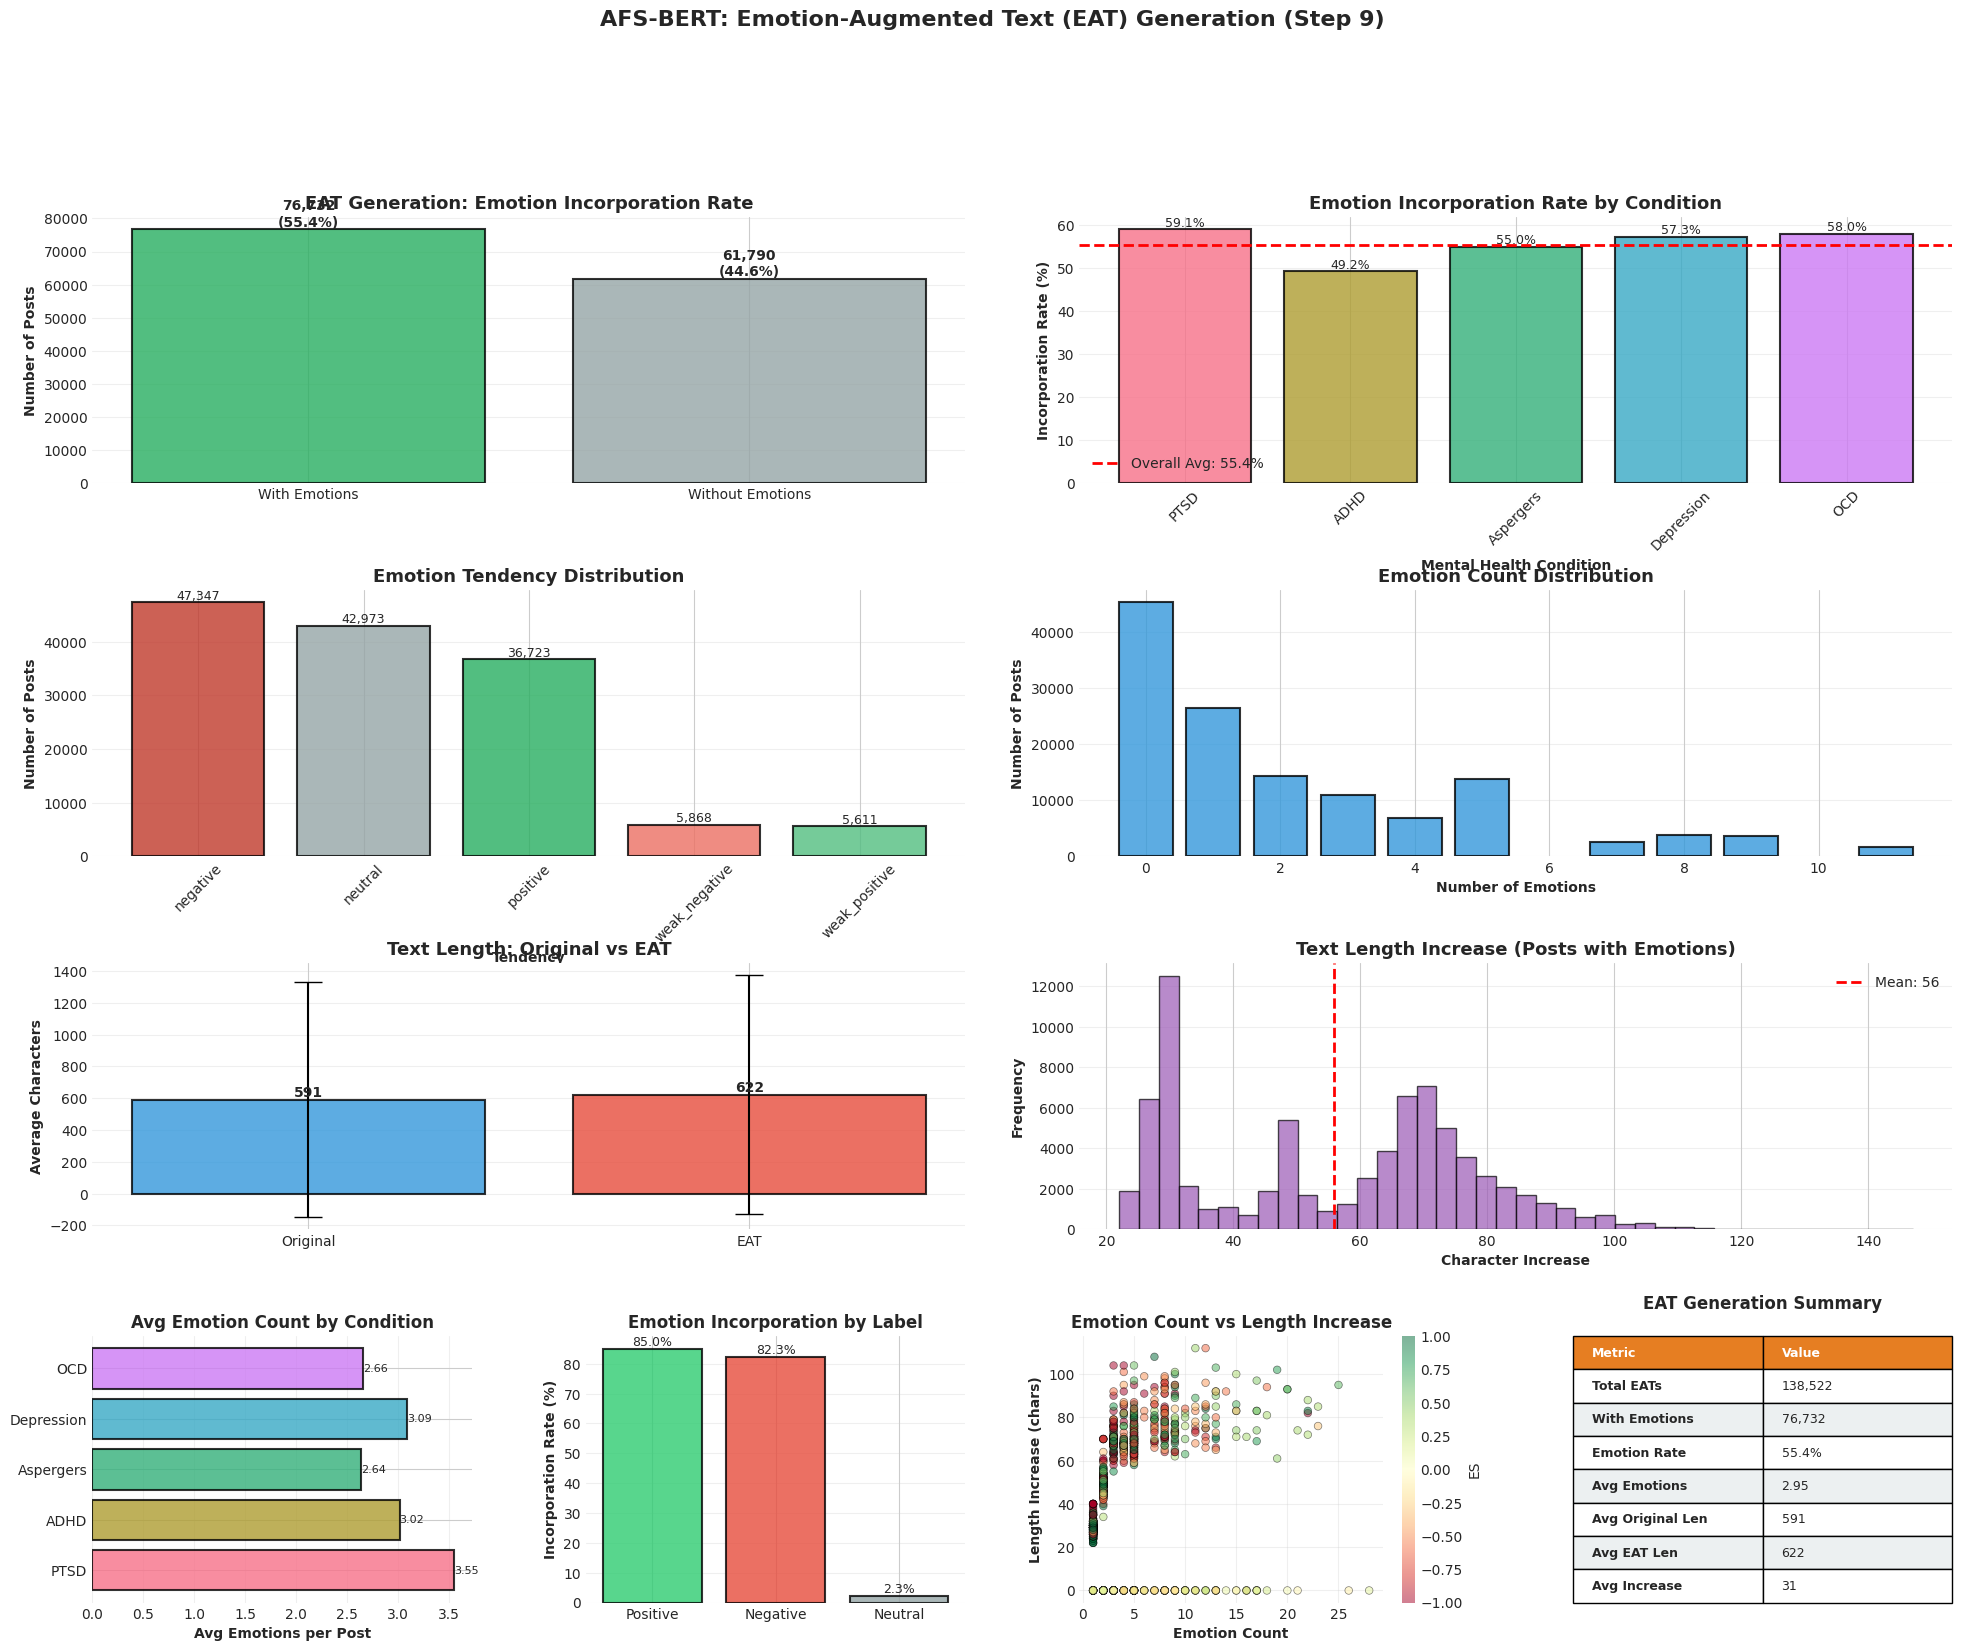


✅ Saved: mental_health_with_eat.csv

✅ Step 9 complete!

Dataset with EAT ready: 138522 posts
  - Original text preserved
  - EATs with emotion annotations created
  - 76,732 posts have emotion augmentation
  - Ready for AFS-BERT training


In [28]:
# ============================================================================
# STEP 9: GENERATE EMOTION-AUGMENTED TEXT (EAT)
# Renamed from SETs (Sentence-Emotion Trees)
# ============================================================================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
import os

# Ensure plot directory exists
os.makedirs('afs_bert_plots', exist_ok=True)

class EmotionAugmentedTextGenerator:
    """
    Generate Emotion-Augmented Text (EAT)
    Integrates emotion-cognitive knowledge into text
    Previously called: Sentence-Emotion Trees (SETs)
    """

    def __init__(self, eke):
        self.eke = eke

    def create_emotion_annotation(self, emotions, max_emotions=3):
        """Create emotion annotations for augmented text"""
        if not emotions:
            return ""

        # Sort by intensity and limit
        sorted_emotions = sorted(
            emotions,
            key=lambda x: x['intensity'],
            reverse=True
        )[:max_emotions]

        annotations = []
        for emo in sorted_emotions:
            if emo['type'] == 'compound':
                # Compound: word1+word2{emotion}
                annotation = f"{emo['words'][0]}+{emo['words'][1]}→{emo['emotion']}"
            else:
                # Single: word{emotion}
                annotation = f"{emo['words'][0]}→{emo['emotion']}"

            annotations.append(annotation)

        return " | ".join(annotations)

    def generate_eat(self, text, ES, CS_EKE, PECK, NECK, threshold=0.3):
        """
        Generate Emotion-Augmented Text (EAT)

        Decision: Which emotions to incorporate based on ES
        """

        # Decide which emotions to use
        if ES > 0.2:
            # Strong positive → use PECK
            selected_emotions = PECK
            tendency = 'positive'
        elif ES < -0.2:
            # Strong negative → use NECK
            selected_emotions = NECK
            tendency = 'negative'
        elif ES > 0:
            # Weak positive → use PECK
            selected_emotions = PECK
            tendency = 'weak_positive'
        elif ES < 0:
            # Weak negative → use NECK
            selected_emotions = NECK
            tendency = 'weak_negative'
        else:
            # Neutral
            selected_emotions = []
            tendency = 'neutral'

        # Create EAT
        if selected_emotions and CS_EKE >= threshold:
            emotion_annotation = self.create_emotion_annotation(selected_emotions)
            # Append emotions at end
            eat_text = f"{text} [EMOTIONS: {emotion_annotation}]"
            used_eke = True
        else:
            eat_text = text
            used_eke = False

        return {
            'EAT': eat_text,
            'tendency': tendency,
            'selected_emotions': selected_emotions,
            'emotion_count': len(selected_emotions),
            'used_eke': used_eke
        }

# Initialize EAT generator
print("="*80)
print("STEP 9: GENERATING EMOTION-AUGMENTED TEXT (EAT)")
print("Formerly: Sentence-Emotion Trees (SETs)")
print("="*80)

eat_generator = EmotionAugmentedTextGenerator(EKE)

# Generate EATs for the dataset
print(f"\nGenerating EATs for {len(eke_df_final)} posts...")
print("This will take 2-3 minutes...")

eat_data = []

for idx, row in tqdm(eke_df_final.iterrows(), total=len(eke_df_final), desc="Generating EATs"):
    eat_result = eat_generator.generate_eat(
        text=row['text_clean'],
        ES=row['ES'],
        CS_EKE=row['CS_EKE'],  # Updated from CS_ECR
        PECK=row['PECK'],
        NECK=row['NECK'],
        threshold=0.3
    )

    eat_data.append({
        'original_text': row['text_clean'],
        'EAT': eat_result['EAT'],
        'ES': row['ES'],
        'CS_EKE': row['CS_EKE'],  # Updated from CS_ECR
        'tendency': eat_result['tendency'],
        'emotion_count': eat_result['emotion_count'],
        'used_eke': eat_result['used_eke'],
        'label': row['label'],
        'label_numeric': row['label_numeric'],
        'label_confidence': row['label_confidence'],
        'condition': row['condition'],
        'peck_count': row['peck_count'],
        'neck_count': row['neck_count']
    })

# Create DataFrame with EATs
eat_df = pd.DataFrame(eat_data)

print("\n✅ All EATs generated!")

# Statistics
print("\n" + "="*80)
print("EAT STATISTICS")
print("="*80)

print(f"\nTotal EATs: {len(eat_df)}")
print(f"EATs with emotions incorporated: {eat_df['used_eke'].sum()} ({eat_df['used_eke'].sum()/len(eat_df)*100:.1f}%)")
print(f"EATs without emotions: {(~eat_df['used_eke']).sum()} ({(~eat_df['used_eke']).sum()/len(eat_df)*100:.1f}%)")

print(f"\nTendency distribution:")
tendency_counts = eat_df['tendency'].value_counts()
print(tendency_counts)

print(f"\nEmotion count distribution:")
emotion_count_dist = eat_df['emotion_count'].value_counts().head(10)
print(emotion_count_dist)

# Text length comparison
eat_df['original_length'] = eat_df['original_text'].str.len()
eat_df['eat_length'] = eat_df['EAT'].str.len()
eat_df['length_increase'] = eat_df['eat_length'] - eat_df['original_length']

print(f"\nText length comparison:")
print(f"Original avg length: {eat_df['original_length'].mean():.0f} chars")
print(f"EAT avg length: {eat_df['eat_length'].mean():.0f} chars")
print(f"Avg increase: {eat_df['length_increase'].mean():.0f} chars")

# Condition-wise stats
condition_eat_stats = []
for condition in eat_df['condition'].unique():
    cond_data = eat_df[eat_df['condition'] == condition]
    condition_eat_stats.append({
        'Condition': condition,
        'Total': len(cond_data),
        'With_Emotions': cond_data['used_eke'].sum(),
        'Emotion_Rate': cond_data['used_eke'].sum() / len(cond_data) * 100,
        'Avg_Emotion_Count': cond_data['emotion_count'].mean()
    })
condition_eat_df = pd.DataFrame(condition_eat_stats)

# Show examples
print("\n" + "="*80)
print("SAMPLE EMOTION-AUGMENTED TEXTS")
print("="*80)

for label in ['positive', 'negative', 'neutral']:
    print(f"\n{label.upper()} Examples with Emotions:")
    print("-" * 80)

    sample = eat_df[
        (eat_df['label'] == label) &
        (eat_df['emotion_count'] > 0)
    ]

    if len(sample) > 0:
        sample_row = sample.sample(1, random_state=42).iloc[0]

        print(f"Original: {sample_row['original_text'][:150]}...")
        print(f"\nEAT: {sample_row['EAT'][:300]}...")
        print(f"\nStats:")
        print(f"  ES: {sample_row['ES']:.3f} | CS_EKE: {sample_row['CS_EKE']:.3f}")
        print(f"  Tendency: {sample_row['tendency']}")
        print(f"  Emotions: {sample_row['emotion_count']}")
        print(f"  PECK: {sample_row['peck_count']}, NECK: {sample_row['neck_count']}")
    else:
        print("No examples with emotions found")

# ============================================================================
# PLOT 9: EMOTION-AUGMENTED TEXT (EAT) ANALYSIS
# ============================================================================

fig = plt.figure(figsize=(24, 18))
gs = fig.add_gridspec(4, 4, hspace=0.4, wspace=0.3)
fig.suptitle('AFS-BERT: Emotion-Augmented Text (EAT) Generation (Step 9)', 
             fontsize=16, fontweight='bold', y=0.995)

colors_label = {'positive': '#2ecc71', 'negative': '#e74c3c', 'neutral': '#95a5a6'}
colors_cond = sns.color_palette("husl", len(condition_eat_df))

# Plot 9.1: EAT Generation Success Rate
ax1 = fig.add_subplot(gs[0, :2])
usage_counts = [eat_df['used_eke'].sum(), (~eat_df['used_eke']).sum()]
usage_labels = ['With Emotions', 'Without Emotions']
colors_usage = ['#27ae60', '#95a5a6']
bars = ax1.bar(usage_labels, usage_counts, color=colors_usage,
               edgecolor='black', linewidth=1.5, alpha=0.8)
ax1.set_title('EAT Generation: Emotion Incorporation Rate', fontsize=13, fontweight='bold')
ax1.set_ylabel('Number of Posts', fontweight='bold')
ax1.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    pct = height / len(eat_df) * 100
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}\n({pct:.1f}%)',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# Plot 9.2: Emotion Incorporation by Condition
ax2 = fig.add_subplot(gs[0, 2:])
x_pos = np.arange(len(condition_eat_df))
bars = ax2.bar(x_pos, condition_eat_df['Emotion_Rate'],
               color=colors_cond, edgecolor='black', linewidth=1.5, alpha=0.8)
ax2.set_title('Emotion Incorporation Rate by Condition', fontsize=13, fontweight='bold')
ax2.set_xlabel('Mental Health Condition', fontweight='bold')
ax2.set_ylabel('Incorporation Rate (%)', fontweight='bold')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(condition_eat_df['Condition'], rotation=45)
ax2.grid(axis='y', alpha=0.3)
ax2.axhline(y=eat_df['used_eke'].mean()*100, color='red', linestyle='--',
            linewidth=2, label=f'Overall Avg: {eat_df["used_eke"].mean()*100:.1f}%')
ax2.legend()
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

# Plot 9.3: Tendency Distribution
ax3 = fig.add_subplot(gs[1, :2])
tendency_colors = {
    'positive': '#27ae60', 'negative': '#c0392b',
    'weak_positive': '#52be80', 'weak_negative': '#ec7063',
    'neutral': '#95a5a6'
}
bars = ax3.bar(tendency_counts.index, tendency_counts.values,
               color=[tendency_colors.get(t, '#95a5a6') for t in tendency_counts.index],
               edgecolor='black', linewidth=1.5, alpha=0.8)
ax3.set_title('Emotion Tendency Distribution', fontsize=13, fontweight='bold')
ax3.set_xlabel('Tendency', fontweight='bold')
ax3.set_ylabel('Number of Posts', fontweight='bold')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}', ha='center', va='bottom', fontsize=9)

# Plot 9.4: Emotion Count Distribution
ax4 = fig.add_subplot(gs[1, 2:])
ax4.bar(emotion_count_dist.index, emotion_count_dist.values,
        color='#3498db', edgecolor='black', linewidth=1.5, alpha=0.8)
ax4.set_title('Emotion Count Distribution', fontsize=13, fontweight='bold')
ax4.set_xlabel('Number of Emotions', fontweight='bold')
ax4.set_ylabel('Number of Posts', fontweight='bold')
ax4.grid(axis='y', alpha=0.3)

# Plot 9.5: Text Length Comparison (Before vs After)
ax5 = fig.add_subplot(gs[2, :2])
x_pos = np.arange(2)
length_means = [eat_df['original_length'].mean(), eat_df['eat_length'].mean()]
length_stds = [eat_df['original_length'].std(), eat_df['eat_length'].std()]
bars = ax5.bar(x_pos, length_means, yerr=length_stds,
               color=['#3498db', '#e74c3c'], edgecolor='black',
               linewidth=1.5, alpha=0.8, capsize=10)
ax5.set_title('Text Length: Original vs EAT', fontsize=13, fontweight='bold')
ax5.set_ylabel('Average Characters', fontweight='bold')
ax5.set_xticks(x_pos)
ax5.set_xticklabels(['Original', 'EAT'])
ax5.grid(axis='y', alpha=0.3)
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Plot 9.6: Length Increase Distribution
ax6 = fig.add_subplot(gs[2, 2:])
increase_with_emo = eat_df[eat_df['used_eke']]['length_increase']
ax6.hist(increase_with_emo, bins=40, color='#9b59b6',
         edgecolor='black', alpha=0.7)
ax6.set_xlabel('Character Increase', fontweight='bold')
ax6.set_ylabel('Frequency', fontweight='bold')
ax6.set_title('Text Length Increase (Posts with Emotions)', fontsize=13, fontweight='bold')
ax6.axvline(x=increase_with_emo.mean(), color='red', linestyle='--',
            linewidth=2, label=f'Mean: {increase_with_emo.mean():.0f}')
ax6.legend()
ax6.grid(axis='y', alpha=0.3)

# Plot 9.7: Average Emotion Count by Condition
ax7 = fig.add_subplot(gs[3, 0])
bars = ax7.barh(condition_eat_df['Condition'], condition_eat_df['Avg_Emotion_Count'],
                color=colors_cond, edgecolor='black', linewidth=1.5, alpha=0.8)
ax7.set_xlabel('Avg Emotions per Post', fontweight='bold')
ax7.set_title('Avg Emotion Count by Condition', fontsize=12, fontweight='bold')
ax7.grid(axis='x', alpha=0.3)
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax7.text(width, bar.get_y() + bar.get_height()/2.,
            f'{width:.2f}', ha='left', va='center', fontsize=8)

# Plot 9.8: Emotion Incorporation by Label
ax8 = fig.add_subplot(gs[3, 1])
label_eat_stats = []
for label in ['positive', 'negative', 'neutral']:
    label_data = eat_df[eat_df['label'] == label]
    label_eat_stats.append(label_data['used_eke'].sum() / len(label_data) * 100)
bars = ax8.bar(['Positive', 'Negative', 'Neutral'], label_eat_stats,
               color=[colors_label[l] for l in ['positive', 'negative', 'neutral']],
               edgecolor='black', linewidth=1.5, alpha=0.8)
ax8.set_ylabel('Incorporation Rate (%)', fontweight='bold')
ax8.set_title('Emotion Incorporation by Label', fontsize=12, fontweight='bold')
ax8.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax8.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

# Plot 9.9: Length vs Emotion Count Scatter
ax9 = fig.add_subplot(gs[3, 2])
scatter_data = eat_df[eat_df['emotion_count'] > 0].sample(min(1000, len(eat_df)))
scatter = ax9.scatter(scatter_data['emotion_count'], scatter_data['length_increase'],
                     alpha=0.5, s=30, c=scatter_data['ES'], cmap='RdYlGn',
                     edgecolors='black', linewidth=0.5)
ax9.set_xlabel('Emotion Count', fontweight='bold')
ax9.set_ylabel('Length Increase (chars)', fontweight='bold')
ax9.set_title('Emotion Count vs Length Increase', fontsize=12, fontweight='bold')
plt.colorbar(scatter, ax=ax9, label='ES')
ax9.grid(alpha=0.3)

# Plot 9.10: Summary Statistics Table
ax10 = fig.add_subplot(gs[3, 3])
ax10.axis('off')
summary_stats = [
    ['Metric', 'Value'],
    ['Total EATs', f"{len(eat_df):,}"],
    ['With Emotions', f"{eat_df['used_eke'].sum():,}"],
    ['Emotion Rate', f"{eat_df['used_eke'].mean()*100:.1f}%"],
    ['Avg Emotions', f"{eat_df['emotion_count'].mean():.2f}"],
    ['Avg Original Len', f"{eat_df['original_length'].mean():.0f}"],
    ['Avg EAT Len', f"{eat_df['eat_length'].mean():.0f}"],
    ['Avg Increase', f"{eat_df['length_increase'].mean():.0f}"]
]
table = ax10.table(cellText=summary_stats,
                   cellLoc='left',
                   loc='center',
                   bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2.3)
for i in range(len(summary_stats)):
    for j in range(2):
        cell = table[(i, j)]
        if i == 0:
            cell.set_facecolor('#e67e22')
            cell.set_text_props(weight='bold', color='white')
        else:
            cell.set_facecolor('#ecf0f1' if i % 2 == 0 else 'white')
            if j == 0:
                cell.set_text_props(weight='bold')
ax10.set_title('EAT Generation Summary', fontsize=12, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('afs_bert_plots/step9_eat_generation.png', dpi=300, bbox_inches='tight')
print("\n" + "="*80)
print("✅ PLOT 9 SAVED: afs_bert_plots/step9_eat_generation.png")
print("="*80)
plt.show()

# Save dataset with EATs
eat_df.to_csv('mental_health_with_eat.csv', index=False)
print(f"\n✅ Saved: mental_health_with_eat.csv")

print("\n" + "="*80)
print("✅ Step 9 complete!")
print("="*80)
print(f"\nDataset with EAT ready: {len(eat_df)} posts")
print(f"  - Original text preserved")
print(f"  - EATs with emotion annotations created")
print(f"  - {eat_df['used_eke'].sum():,} posts have emotion augmentation")
print(f"  - Ready for AFS-BERT training")
print("="*80)


STEP 10: PREPARE DATA FOR AFS-BERT TRAINING

🖥️  Device: cuda
   GPU: Tesla T4
   Memory: 15.8 GB

--------------------------------------------------------------------------------
10.1: CREATING TRAIN/VAL/TEST SPLITS
--------------------------------------------------------------------------------
Train set: 96,965 posts (70.0%)
Val set:   20,778 posts (15.0%)
Test set:  20,779 posts (15.0%)

Label distribution in train:
label
negative    36475
neutral     33496
positive    26994
Name: count, dtype: int64

Label distribution in val:
label
negative    7816
neutral     7177
positive    5785
Name: count, dtype: int64

Label distribution in test:
label
negative    7817
neutral     7178
positive    5784
Name: count, dtype: int64

✅ Saved train/val/test splits

--------------------------------------------------------------------------------
10.2: LOADING BERT TOKENIZER
--------------------------------------------------------------------------------
✅ Loaded: bert-base-uncased tokenizer

Sampl

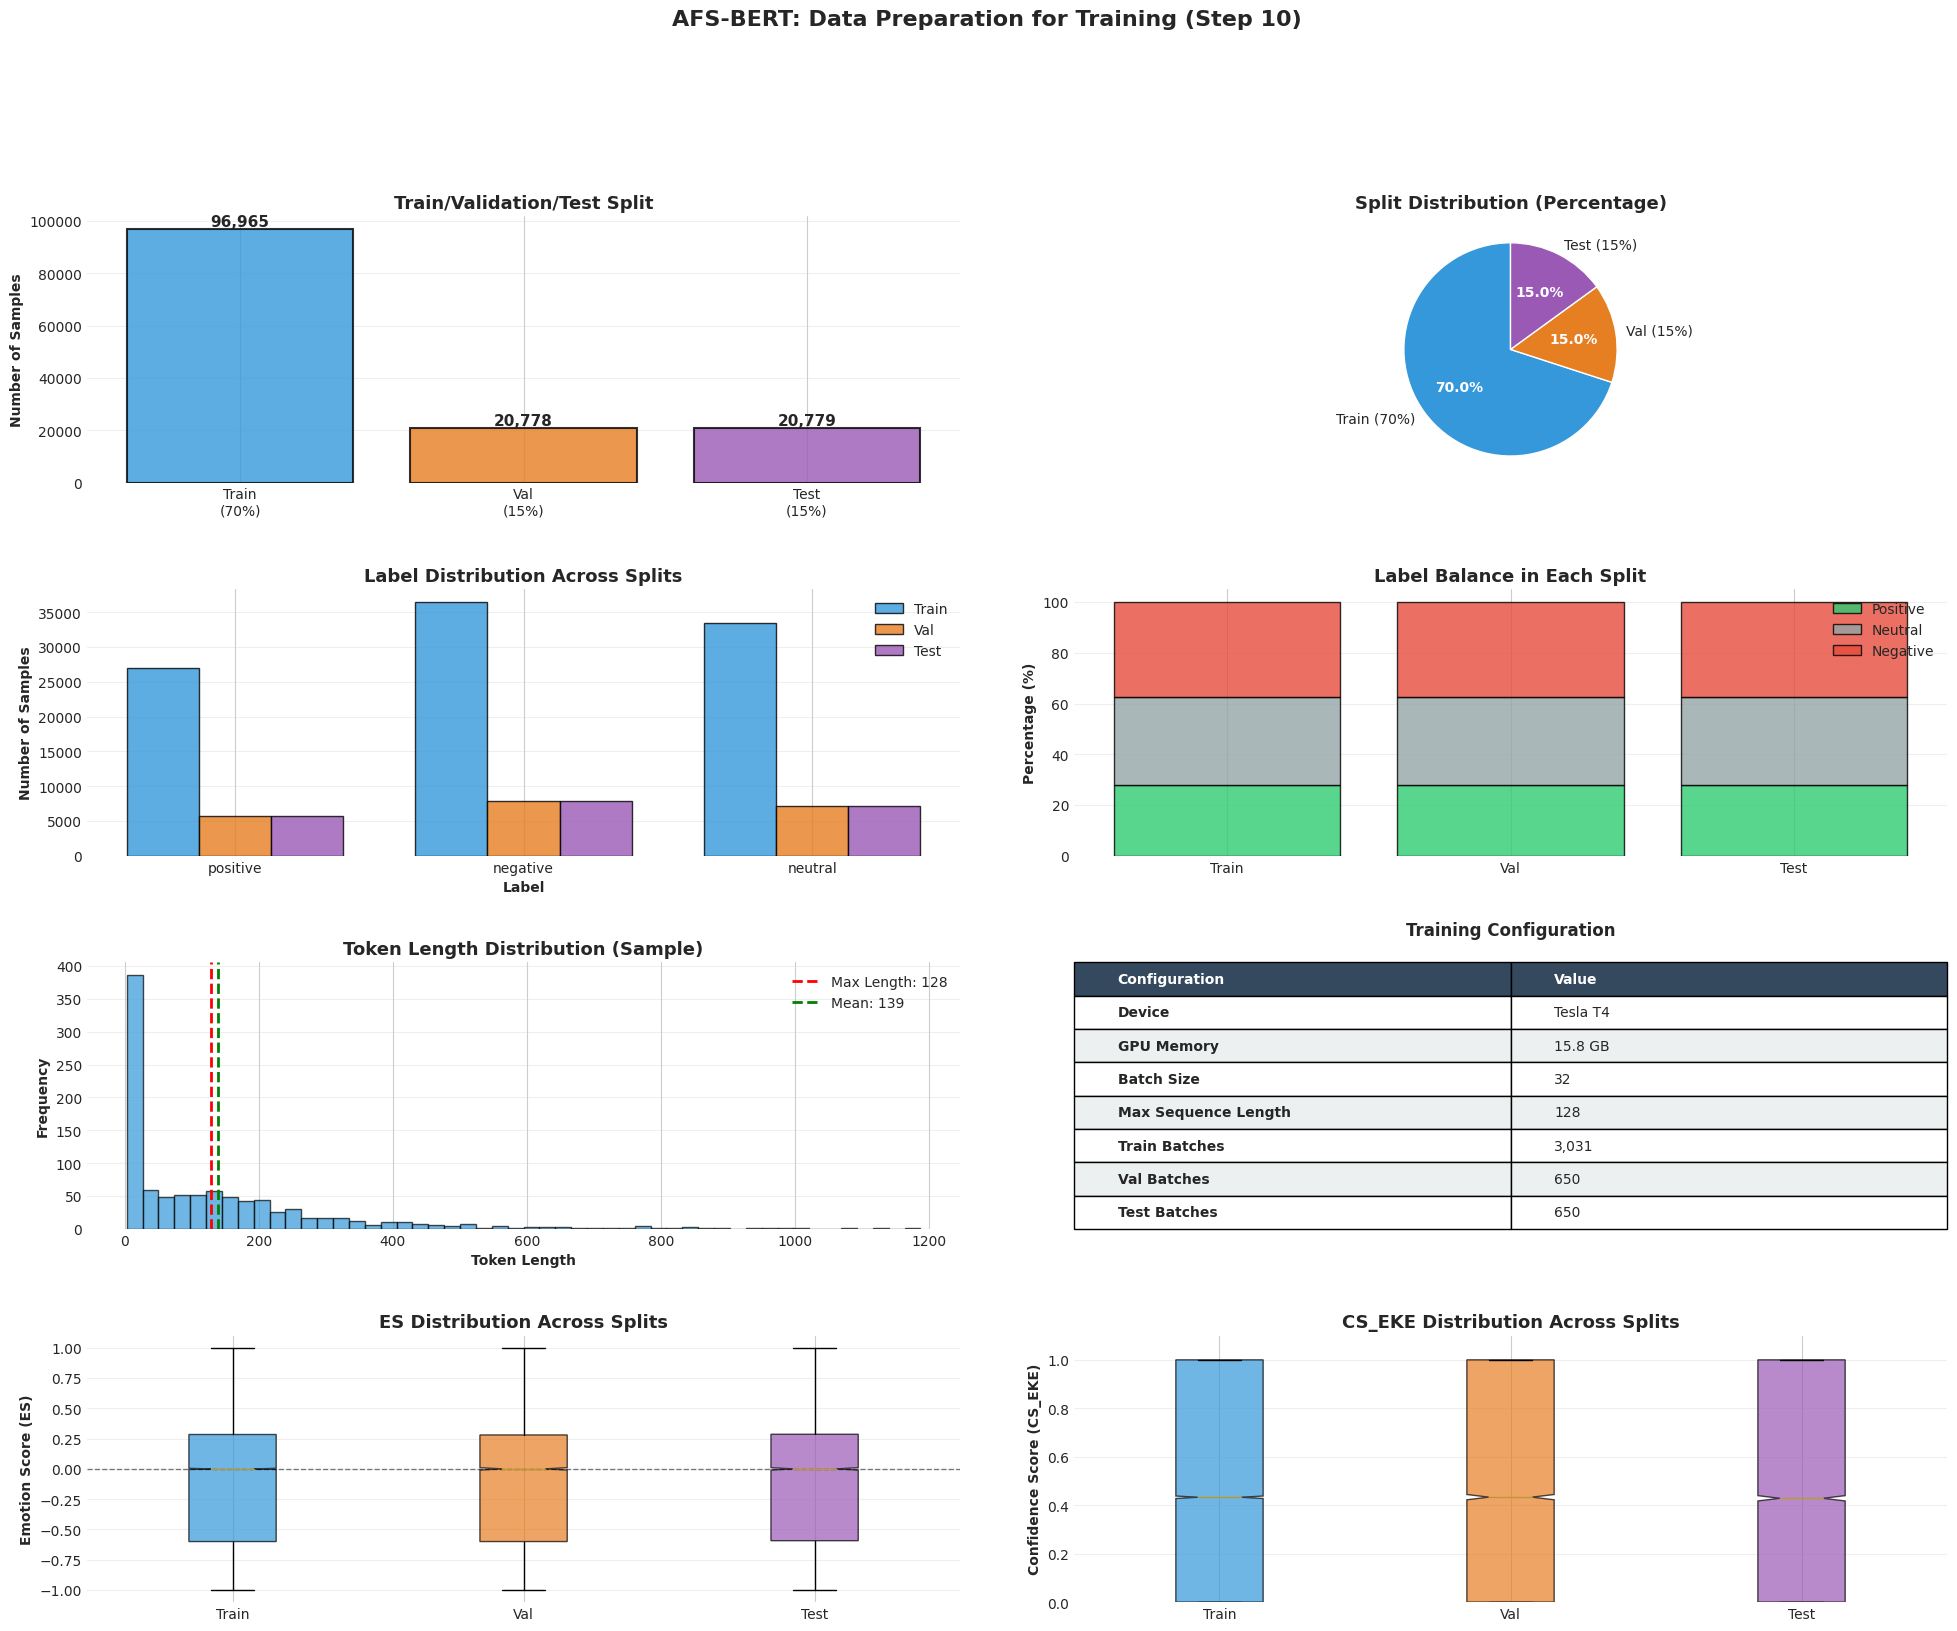


✅ Step 10 complete!

📦 Data ready for AFS-BERT training:
  - Train: 96,965 samples (3,031 batches)
  - Val:   20,778 samples (650 batches)
  - Test:  20,779 samples (650 batches)
  - Batch size: 32
  - Max length: 128 tokens
  - Device: cuda
  - Tokenizer: bert-base-uncased

🎯 Ready for Step 11: Build and Train AFS-BERT Model!


In [29]:
# ============================================================================
# STEP 10: PREPARE DATA FOR BERT TRAINING
# ============================================================================

from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os

warnings.filterwarnings('ignore')

# Ensure plot directory exists
os.makedirs('afs_bert_plots', exist_ok=True)

print("="*80)
print("STEP 10: PREPARE DATA FOR AFS-BERT TRAINING")
print("="*80)

# Check device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"\n🖥️  Device: {device}")
if device.type == 'cuda':
    print(f"   GPU: {torch.cuda.get_device_name(0)}")
    print(f"   Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.1f} GB")

# Step 10.1: Train/Val/Test Split
print("\n" + "-"*80)
print("10.1: CREATING TRAIN/VAL/TEST SPLITS")
print("-"*80)

# 70% train, 15% val, 15% test
train_df, temp_df = train_test_split(
    eat_df,  # Updated from sets_df to eat_df
    test_size=0.3,
    random_state=42,
    stratify=eat_df['label_numeric']
)

val_df, test_df = train_test_split(
    temp_df,
    test_size=0.5,  # 0.5 of 30% = 15% each
    random_state=42,
    stratify=temp_df['label_numeric']
)

print(f"Train set: {len(train_df):,} posts ({len(train_df)/len(eat_df)*100:.1f}%)")
print(f"Val set:   {len(val_df):,} posts ({len(val_df)/len(eat_df)*100:.1f}%)")
print(f"Test set:  {len(test_df):,} posts ({len(test_df)/len(eat_df)*100:.1f}%)")

print("\nLabel distribution in train:")
train_label_dist = train_df['label'].value_counts()
print(train_label_dist)

print("\nLabel distribution in val:")
val_label_dist = val_df['label'].value_counts()
print(val_label_dist)

print("\nLabel distribution in test:")
test_label_dist = test_df['label'].value_counts()
print(test_label_dist)

# Save splits
train_df.to_csv('train_set.csv', index=False)
val_df.to_csv('val_set.csv', index=False)
test_df.to_csv('test_set.csv', index=False)
print("\n✅ Saved train/val/test splits")

# Step 10.2: Load BERT Tokenizer
print("\n" + "-"*80)
print("10.2: LOADING BERT TOKENIZER")
print("-"*80)

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
print("✅ Loaded: bert-base-uncased tokenizer")

# Test tokenization
sample_text = train_df.iloc[0]['original_text']
tokens = tokenizer.tokenize(sample_text[:100])
print(f"\nSample tokenization:")
print(f"Text: {sample_text[:100]}...")
print(f"Tokens ({len(tokens)}): {tokens[:10]}...")

# Analyze token lengths
print("\nAnalyzing token lengths across datasets...")
train_token_lengths = []
for text in train_df['original_text'].head(1000):
    tokens = tokenizer.tokenize(str(text))
    train_token_lengths.append(len(tokens))

# Step 10.3: Create PyTorch Dataset Class
print("\n" + "-"*80)
print("10.3: CREATING PYTORCH DATASETS")
print("-"*80)

class MentalHealthDataset(Dataset):
    """
    PyTorch Dataset for Mental Health Text (AFS-BERT)
    Can use either original text or EAT
    """

    def __init__(self, dataframe, tokenizer, max_length=128, use_eat=False):
        """
        Args:
            dataframe: DataFrame with columns
            tokenizer: BERT tokenizer
            max_length: max sequence length
            use_eat: if True use EAT, else use original_text
        """
        self.data = dataframe.reset_index(drop=True)
        self.tokenizer = tokenizer
        self.max_length = max_length
        self.use_eat = use_eat

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]

        # Choose text source
        if self.use_eat:
            text = row['EAT']
        else:
            text = row['original_text']

        # Tokenize
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(row['label_numeric'], dtype=torch.long),
            'ES': torch.tensor(row['ES'], dtype=torch.float),
            'CS_EKE': torch.tensor(row['CS_EKE'], dtype=torch.float)  # Updated from CS_ECR
        }

# Create datasets (start with original text for baseline BERT)
print("\nCreating datasets (using original_text)...")

max_length = 128  # Standard BERT max length

train_dataset = MentalHealthDataset(train_df, tokenizer, max_length, use_eat=False)
val_dataset = MentalHealthDataset(val_df, tokenizer, max_length, use_eat=False)
test_dataset = MentalHealthDataset(test_df, tokenizer, max_length, use_eat=False)

print(f"✅ Train dataset: {len(train_dataset):,} samples")
print(f"✅ Val dataset:   {len(val_dataset):,} samples")
print(f"✅ Test dataset:  {len(test_dataset):,} samples")

# Step 10.4: Create DataLoaders
print("\n" + "-"*80)
print("10.4: CREATING DATALOADERS")
print("-"*80)

# Batch size based on GPU memory
if device.type == 'cuda':
    gpu_memory_gb = torch.cuda.get_device_properties(0).total_memory / 1e9
    if gpu_memory_gb >= 15:
        batch_size = 32
    elif gpu_memory_gb >= 8:
        batch_size = 16
    else:
        batch_size = 8
else:
    batch_size = 8

print(f"Batch size: {batch_size}")

train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=2,
    pin_memory=True if device.type == 'cuda' else False
)

val_loader = DataLoader(
    val_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=2,
    pin_memory=True if device.type == 'cuda' else False
)

test_loader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=2,
    pin_memory=True if device.type == 'cuda' else False
)

print(f"✅ Train loader: {len(train_loader):,} batches")
print(f"✅ Val loader:   {len(val_loader):,} batches")
print(f"✅ Test loader:  {len(test_loader):,} batches")

# Step 10.5: Test Data Loading
print("\n" + "-"*80)
print("10.5: TESTING DATA LOADING")
print("-"*80)

print("Loading one batch...")
sample_batch = next(iter(train_loader))

print(f"\nBatch shapes:")
print(f"  input_ids: {sample_batch['input_ids'].shape}")
print(f"  attention_mask: {sample_batch['attention_mask'].shape}")
print(f"  labels: {sample_batch['label'].shape}")
print(f"  ES: {sample_batch['ES'].shape}")
print(f"  CS_EKE: {sample_batch['CS_EKE'].shape}")

print(f"\nLabel distribution in batch:")
labels_in_batch = sample_batch['label'].numpy()
unique, counts = np.unique(labels_in_batch, return_counts=True)
batch_label_dist = {}
for label_num, count in zip(unique, counts):
    label_name = {0: 'positive', 1: 'negative', 2: 'neutral'}[label_num]
    batch_label_dist[label_name] = count
    print(f"  {label_name}: {count}")

# ============================================================================
# PLOT 10: DATA PREPARATION ANALYSIS
# ============================================================================

fig = plt.figure(figsize=(24, 18))
gs = fig.add_gridspec(4, 4, hspace=0.4, wspace=0.3)
fig.suptitle('AFS-BERT: Data Preparation for Training (Step 10)', 
             fontsize=16, fontweight='bold', y=0.995)

colors_label = {'positive': '#2ecc71', 'negative': '#e74c3c', 'neutral': '#95a5a6'}
colors_split = {'Train': '#3498db', 'Val': '#e67e22', 'Test': '#9b59b6'}

# Plot 10.1: Train/Val/Test Split Distribution
ax1 = fig.add_subplot(gs[0, :2])
split_sizes = [len(train_df), len(val_df), len(test_df)]
split_labels = ['Train\n(70%)', 'Val\n(15%)', 'Test\n(15%)']
bars = ax1.bar(split_labels, split_sizes,
               color=[colors_split['Train'], colors_split['Val'], colors_split['Test']],
               edgecolor='black', linewidth=1.5, alpha=0.8)
ax1.set_title('Train/Validation/Test Split', fontsize=13, fontweight='bold')
ax1.set_ylabel('Number of Samples', fontweight='bold')
ax1.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Plot 10.2: Split Distribution Pie Chart
ax2 = fig.add_subplot(gs[0, 2:])
wedges, texts, autotexts = ax2.pie(split_sizes,
                                     labels=['Train (70%)', 'Val (15%)', 'Test (15%)'],
                                     autopct='%1.1f%%',
                                     colors=[colors_split['Train'], colors_split['Val'], colors_split['Test']],
                                     startangle=90,
                                     textprops={'fontsize': 10})
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
ax2.set_title('Split Distribution (Percentage)', fontsize=13, fontweight='bold')

# Plot 10.3: Label Distribution Across Splits
ax3 = fig.add_subplot(gs[1, :2])
labels_order = ['positive', 'negative', 'neutral']
x_pos = np.arange(len(labels_order))
width = 0.25

train_counts = [train_label_dist.get(label, 0) for label in labels_order]
val_counts = [val_label_dist.get(label, 0) for label in labels_order]
test_counts = [test_label_dist.get(label, 0) for label in labels_order]

bars1 = ax3.bar(x_pos - width, train_counts, width, label='Train',
                color=colors_split['Train'], edgecolor='black', alpha=0.8)
bars2 = ax3.bar(x_pos, val_counts, width, label='Val',
                color=colors_split['Val'], edgecolor='black', alpha=0.8)
bars3 = ax3.bar(x_pos + width, test_counts, width, label='Test',
                color=colors_split['Test'], edgecolor='black', alpha=0.8)

ax3.set_xlabel('Label', fontweight='bold')
ax3.set_ylabel('Number of Samples', fontweight='bold')
ax3.set_title('Label Distribution Across Splits', fontsize=13, fontweight='bold')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(labels_order)
ax3.legend(loc='upper right')
ax3.grid(axis='y', alpha=0.3)

# Plot 10.4: Label Balance in Each Split (Stacked Bars)
ax4 = fig.add_subplot(gs[1, 2:])
splits = ['Train', 'Val', 'Test']
split_data = [train_df, val_df, test_df]
x_pos = np.arange(len(splits))

positive_pcts = []
negative_pcts = []
neutral_pcts = []

for df in split_data:
    dist = df['label'].value_counts()
    total = len(df)
    positive_pcts.append(dist.get('positive', 0) / total * 100)
    negative_pcts.append(dist.get('negative', 0) / total * 100)
    neutral_pcts.append(dist.get('neutral', 0) / total * 100)

ax4.bar(x_pos, positive_pcts, label='Positive',
        color=colors_label['positive'], edgecolor='black', alpha=0.8)
ax4.bar(x_pos, neutral_pcts, bottom=positive_pcts, label='Neutral',
        color=colors_label['neutral'], edgecolor='black', alpha=0.8)
ax4.bar(x_pos, negative_pcts, bottom=np.array(positive_pcts)+np.array(neutral_pcts),
        label='Negative', color=colors_label['negative'], edgecolor='black', alpha=0.8)

ax4.set_xticks(x_pos)
ax4.set_xticklabels(splits)
ax4.set_ylabel('Percentage (%)', fontweight='bold')
ax4.set_title('Label Balance in Each Split', fontsize=13, fontweight='bold')
ax4.legend(loc='upper right')
ax4.grid(axis='y', alpha=0.3)

# Plot 10.5: Token Length Distribution
ax5 = fig.add_subplot(gs[2, :2])
ax5.hist(train_token_lengths, bins=50, color='#3498db',
         edgecolor='black', alpha=0.7)
ax5.axvline(x=max_length, color='red', linestyle='--',
            linewidth=2, label=f'Max Length: {max_length}')
ax5.axvline(x=np.mean(train_token_lengths), color='green', linestyle='--',
            linewidth=2, label=f'Mean: {np.mean(train_token_lengths):.0f}')
ax5.set_xlabel('Token Length', fontweight='bold')
ax5.set_ylabel('Frequency', fontweight='bold')
ax5.set_title('Token Length Distribution (Sample)', fontsize=13, fontweight='bold')
ax5.legend()
ax5.grid(axis='y', alpha=0.3)

# Plot 10.6: Batch Size and Memory Info
ax6 = fig.add_subplot(gs[2, 2:])
ax6.axis('off')
if device.type == 'cuda':
    gpu_info = [
        ['Configuration', 'Value'],
        ['Device', f"{torch.cuda.get_device_name(0)}"],
        ['GPU Memory', f"{torch.cuda.get_device_properties(0).total_memory / 1e9:.1f} GB"],
        ['Batch Size', f"{batch_size}"],
        ['Max Sequence Length', f"{max_length}"],
        ['Train Batches', f"{len(train_loader):,}"],
        ['Val Batches', f"{len(val_loader):,}"],
        ['Test Batches', f"{len(test_loader):,}"]
    ]
else:
    gpu_info = [
        ['Configuration', 'Value'],
        ['Device', 'CPU'],
        ['Batch Size', f"{batch_size}"],
        ['Max Sequence Length', f"{max_length}"],
        ['Train Batches', f"{len(train_loader):,}"],
        ['Val Batches', f"{len(val_loader):,}"],
        ['Test Batches', f"{len(test_loader):,}"]
    ]

table = ax6.table(cellText=gpu_info,
                  cellLoc='left',
                  loc='center',
                  bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2.5)
for i in range(len(gpu_info)):
    for j in range(2):
        cell = table[(i, j)]
        if i == 0:
            cell.set_facecolor('#34495e')
            cell.set_text_props(weight='bold', color='white')
        else:
            cell.set_facecolor('#ecf0f1' if i % 2 == 0 else 'white')
            if j == 0:
                cell.set_text_props(weight='bold')
ax6.set_title('Training Configuration', fontsize=12, fontweight='bold', pad=20)

# Plot 10.7: ES Distribution Across Splits
ax7 = fig.add_subplot(gs[3, :2])
es_data = [train_df['ES'].values, val_df['ES'].values, test_df['ES'].values]
bp = ax7.boxplot(es_data, labels=['Train', 'Val', 'Test'],
                 patch_artist=True, notch=True)
for patch, color in zip(bp['boxes'], [colors_split['Train'], colors_split['Val'], colors_split['Test']]):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
ax7.set_ylabel('Emotion Score (ES)', fontweight='bold')
ax7.set_title('ES Distribution Across Splits', fontsize=13, fontweight='bold')
ax7.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
ax7.grid(axis='y', alpha=0.3)

# Plot 10.8: CS_EKE Distribution Across Splits
ax8 = fig.add_subplot(gs[3, 2:])
cs_data = [train_df['CS_EKE'].values, val_df['CS_EKE'].values, test_df['CS_EKE'].values]
bp = ax8.boxplot(cs_data, labels=['Train', 'Val', 'Test'],
                 patch_artist=True, notch=True)
for patch, color in zip(bp['boxes'], [colors_split['Train'], colors_split['Val'], colors_split['Test']]):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
ax8.set_ylabel('Confidence Score (CS_EKE)', fontweight='bold')
ax8.set_title('CS_EKE Distribution Across Splits', fontsize=13, fontweight='bold')
ax8.grid(axis='y', alpha=0.3)
ax8.set_ylim(0, 1.1)

plt.tight_layout()
plt.savefig('afs_bert_plots/step10_data_preparation.png', dpi=300, bbox_inches='tight')
print("\n" + "="*80)
print("✅ PLOT 10 SAVED: afs_bert_plots/step10_data_preparation.png")
print("="*80)
plt.show()

print("\n" + "="*80)
print("✅ Step 10 complete!")
print("="*80)

print(f"\n📦 Data ready for AFS-BERT training:")
print(f"  - Train: {len(train_dataset):,} samples ({len(train_loader):,} batches)")
print(f"  - Val:   {len(val_dataset):,} samples ({len(val_loader):,} batches)")
print(f"  - Test:  {len(test_dataset):,} samples ({len(test_loader):,} batches)")
print(f"  - Batch size: {batch_size}")
print(f"  - Max length: {max_length} tokens")
print(f"  - Device: {device}")
print(f"  - Tokenizer: bert-base-uncased")

print("\n🎯 Ready for Step 11: Build and Train AFS-BERT Model!")
print("="*80)


STEP 10: FINAL VERIFICATION FOR AFS-BERT

✓ Checking required variables...
  ✅ Dataset with EAT (Emotion-Augmented Text) (eat_df): Ready
  ✅ Training data (train_df): Ready
  ✅ Validation data (val_df): Ready
  ✅ Test data (test_df): Ready
  ✅ Mental Health Lexicon (MHL): Ready
  ✅ Emotion Knowledge Extractor (EKE): Ready
  ✅ BERT Tokenizer (tokenizer): Ready
  ✅ Training DataLoader (train_loader): Ready
  ✅ Validation DataLoader (val_loader): Ready
  ✅ Test DataLoader (test_loader): Ready
  ✅ Training Device (CPU/GPU) (device): Ready

✅ All required variables present!

DATASET SUMMARY FOR AFS-BERT
Total dataset: 138,522 posts
  - Train: 96,965 (70.0%)
  - Val:   20,778 (15.0%)
  - Test:  20,779 (15.0%)

Label distribution:
label
negative    52108
neutral     47851
positive    38563
Name: count, dtype: int64

Condition distribution:
condition
OCD           38576
ADHD          34933
PTSD          21844
Depression    21636
Aspergers     21533
Name: count, dtype: int64

EATs with emotions

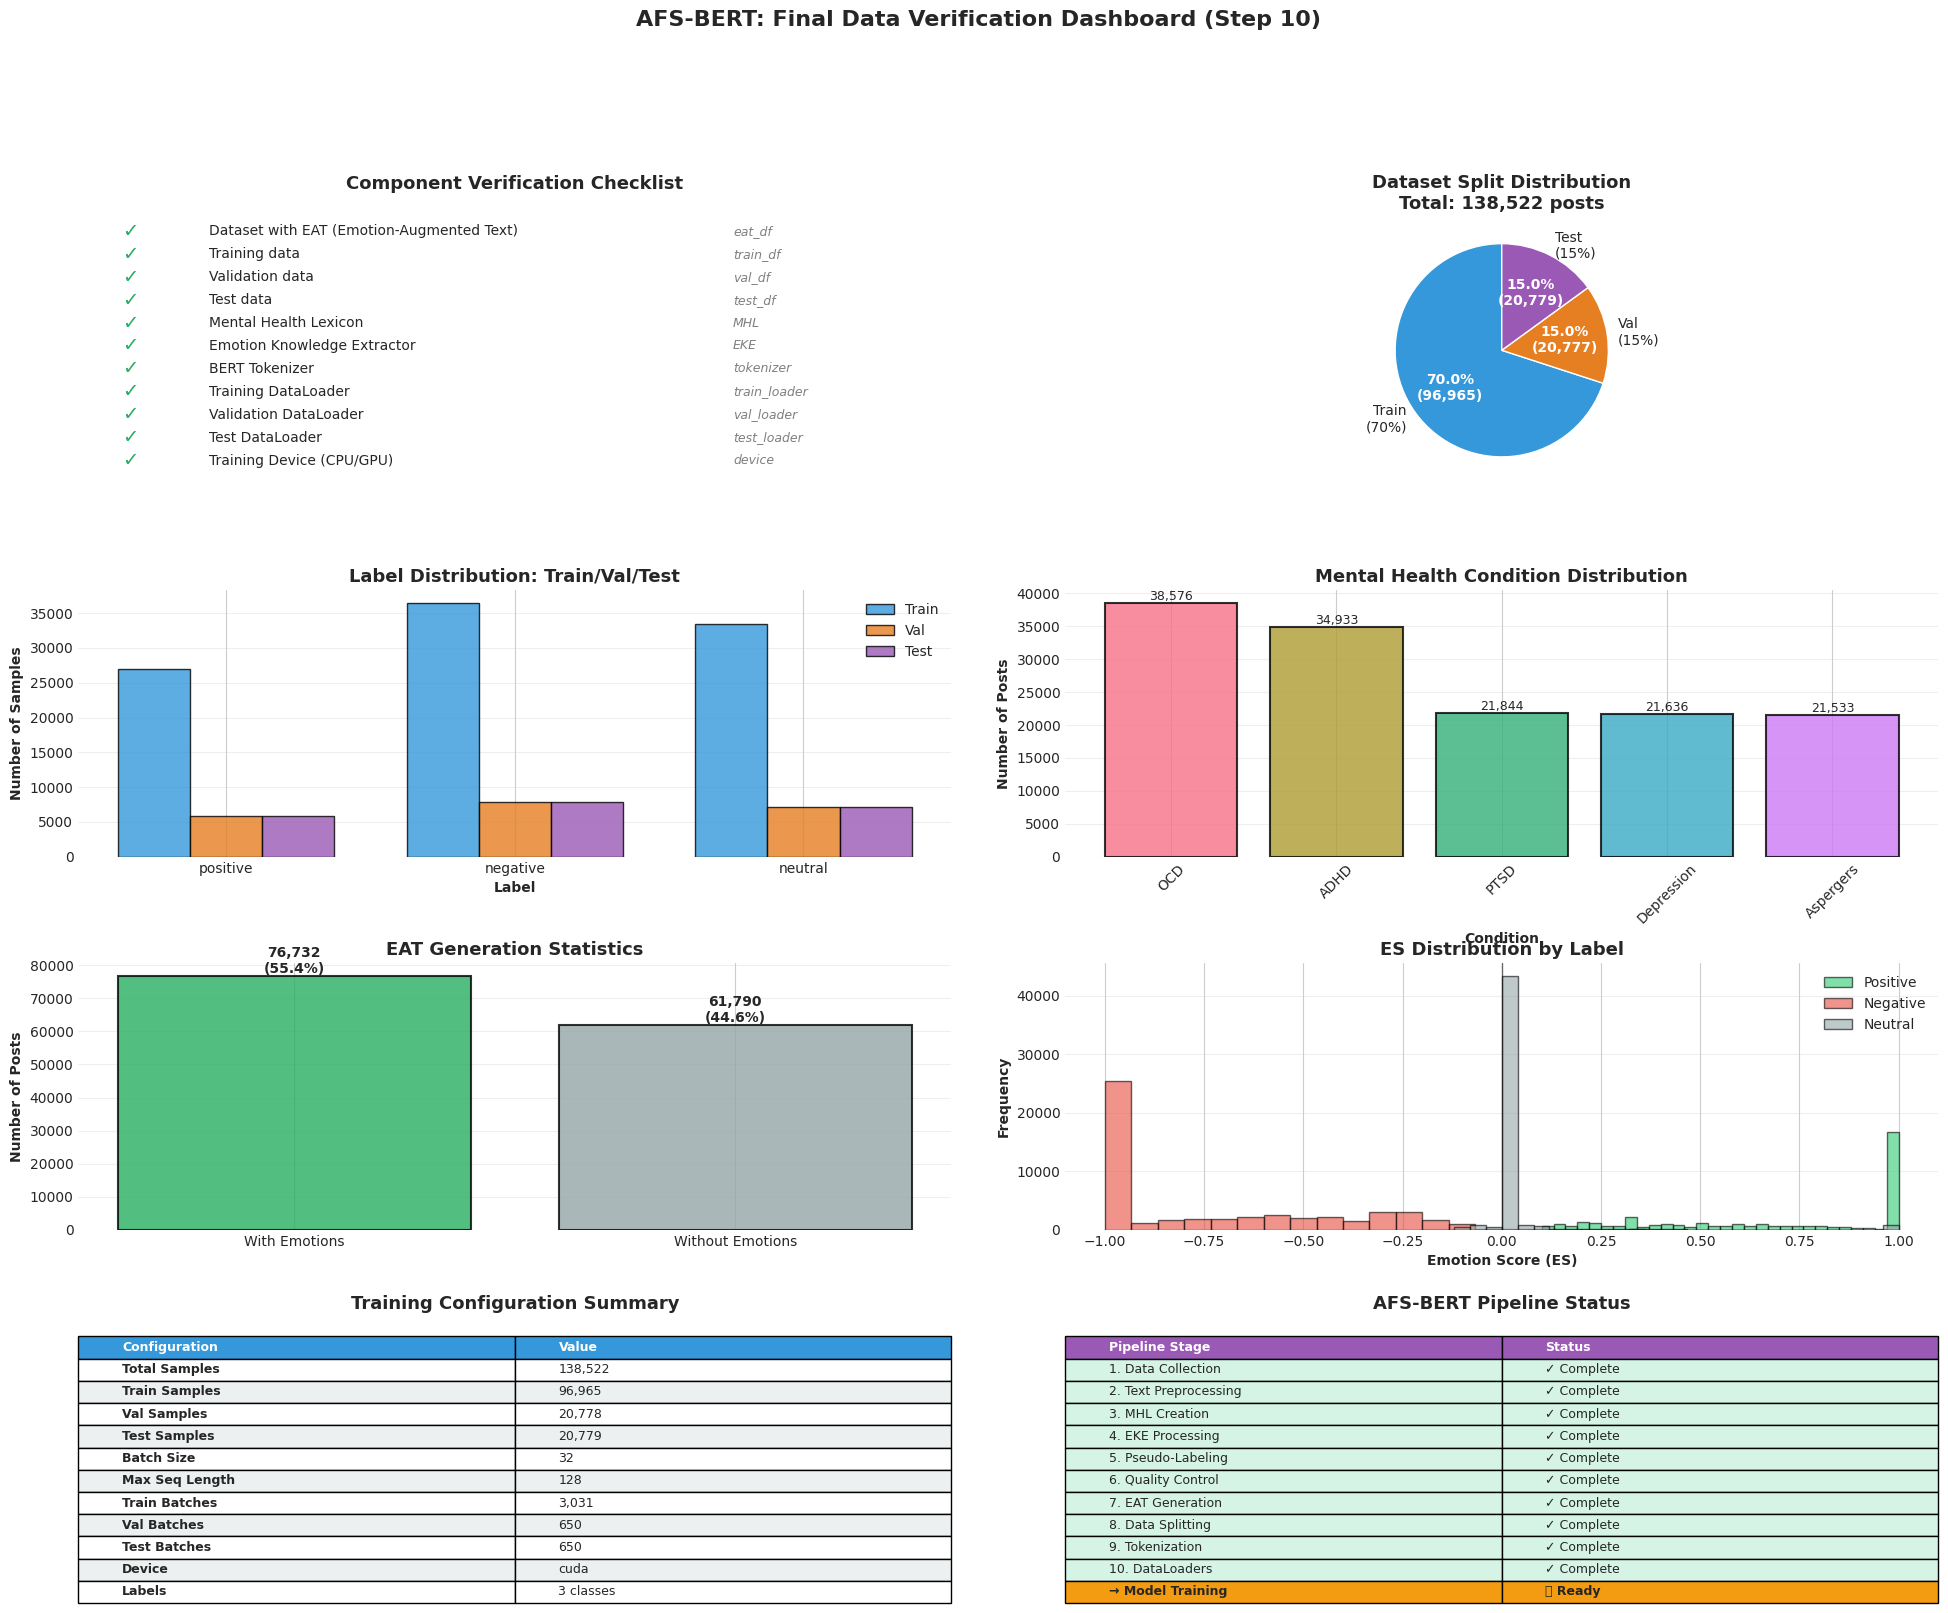


✅ Step 10 COMPLETE - Ready for AFS-BERT Training!

🎯 ============================================================================
   ALL PREPROCESSING STEPS COMPLETED SUCCESSFULLY!

   📊 Dataset Statistics:
      • Total Posts: 138,522
      • Train/Val/Test: 96,965 / 20,778 / 20,779
      • Labels: 3 classes (balanced)
      • Conditions: 5 mental health conditions

   🧠 Emotion Knowledge:
      • MHL Dimensions: 6
      • EKE Rules: 10
      • Posts with EAT: 76,732 (55.4%)

   🚀 Training Ready:
      • Device: cuda
      • Batch Size: 32
      • Total Batches: 4,331

   📁 Saved Files:
      • mental_health_balanced_v2.csv
      • mental_health_with_eat.csv
      • train_set.csv, val_set.csv, test_set.csv

   🎯 Next Step: Build and Train AFS-BERT Model!


In [30]:
# ============================================================================
# STEP 10 COMPLETION: VERIFY DATA IS READY
# ============================================================================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os

# Ensure plot directory exists
os.makedirs('afs_bert_plots', exist_ok=True)

print("="*80)
print("STEP 10: FINAL VERIFICATION FOR AFS-BERT")
print("="*80)

# Check if all variables exist
print("\n✓ Checking required variables...")

required_vars = {
    'eat_df': 'Dataset with EAT (Emotion-Augmented Text)',
    'train_df': 'Training data',
    'val_df': 'Validation data',
    'test_df': 'Test data',
    'MHL': 'Mental Health Lexicon',
    'EKE': 'Emotion Knowledge Extractor',
    'tokenizer': 'BERT Tokenizer',
    'train_loader': 'Training DataLoader',
    'val_loader': 'Validation DataLoader',
    'test_loader': 'Test DataLoader',
    'device': 'Training Device (CPU/GPU)'
}

all_ready = True
verification_results = []

for var_name, description in required_vars.items():
    if var_name in globals():
        status = '✅ Ready'
        verification_results.append({
            'Component': description,
            'Variable': var_name,
            'Status': 'Ready'
        })
        print(f"  ✅ {description} ({var_name}): Ready")
    else:
        status = '❌ Missing'
        verification_results.append({
            'Component': description,
            'Variable': var_name,
            'Status': 'Missing'
        })
        print(f"  ❌ {description} ({var_name}): Missing")
        all_ready = False

verification_df = pd.DataFrame(verification_results)

if not all_ready:
    print("\n⚠️ Some variables are missing. Please run previous steps.")
else:
    print("\n✅ All required variables present!")

    # Summary statistics
    print("\n" + "="*80)
    print("DATASET SUMMARY FOR AFS-BERT")
    print("="*80)
    print(f"Total dataset: {len(eat_df):,} posts")
    print(f"  - Train: {len(train_df):,} ({len(train_df)/len(eat_df)*100:.1f}%)")
    print(f"  - Val:   {len(val_df):,} ({len(val_df)/len(eat_df)*100:.1f}%)")
    print(f"  - Test:  {len(test_df):,} ({len(test_df)/len(eat_df)*100:.1f}%)")

    print(f"\nLabel distribution:")
    label_dist = eat_df['label'].value_counts()
    print(label_dist)

    print(f"\nCondition distribution:")
    condition_dist = eat_df['condition'].value_counts()
    print(condition_dist)

    print(f"\nEATs with emotions: {eat_df['used_eke'].sum():,} ({eat_df['used_eke'].sum()/len(eat_df)*100:.1f}%)")

    # Additional statistics
    print(f"\nEmotion Statistics:")
    print(f"  - Average ES: {eat_df['ES'].mean():.3f}")
    print(f"  - Average CS_EKE: {eat_df['CS_EKE'].mean():.3f}")
    print(f"  - Average emotions per post: {eat_df['emotion_count'].mean():.2f}")

    print(f"\nText Length Statistics:")
    print(f"  - Average original length: {eat_df['original_length'].mean():.0f} chars")
    print(f"  - Average EAT length: {eat_df['eat_length'].mean():.0f} chars")
    print(f"  - Average increase: {eat_df['length_increase'].mean():.0f} chars")

    # Training configuration
    print(f"\nTraining Configuration:")
    print(f"  - Device: {device}")
    if device.type == 'cuda':
        print(f"  - GPU: {torch.cuda.get_device_name(0)}")
    print(f"  - Batch size: {batch_size}")
    print(f"  - Max sequence length: {max_length}")
    print(f"  - Total batches: {len(train_loader) + len(val_loader) + len(test_loader):,}")

    # ========================================================================
    # PLOT 10B: FINAL VERIFICATION DASHBOARD
    # ========================================================================

    fig = plt.figure(figsize=(24, 18))
    gs = fig.add_gridspec(4, 4, hspace=0.4, wspace=0.3)
    fig.suptitle('AFS-BERT: Final Data Verification Dashboard (Step 10)', 
                 fontsize=16, fontweight='bold', y=0.995)

    colors_label = {'positive': '#2ecc71', 'negative': '#e74c3c', 'neutral': '#95a5a6'}
    colors_split = {'Train': '#3498db', 'Val': '#e67e22', 'Test': '#9b59b6'}
    
    # Plot 10B.1: Verification Status
    ax1 = fig.add_subplot(gs[0, :2])
    ax1.axis('off')
    status_counts = verification_df['Status'].value_counts()
    
    # Create visual checklist
    y_pos = 0
    for idx, row in verification_df.iterrows():
        if row['Status'] == 'Ready':
            color = '#27ae60'
            symbol = '✓'
        else:
            color = '#e74c3c'
            symbol = '✗'
        
        ax1.text(0.05, y_pos, symbol, fontsize=14, color=color, 
                weight='bold', va='center')
        ax1.text(0.15, y_pos, row['Component'], fontsize=10, va='center')
        ax1.text(0.75, y_pos, row['Variable'], fontsize=9, 
                style='italic', color='gray', va='center')
        y_pos -= 0.08
    
    ax1.set_xlim(0, 1)
    ax1.set_ylim(y_pos, 0.05)
    ax1.set_title('Component Verification Checklist', fontsize=13, 
                 fontweight='bold', pad=20)

    # Plot 10B.2: Dataset Size Overview
    ax2 = fig.add_subplot(gs[0, 2:])
    sizes = [len(train_df), len(val_df), len(test_df)]
    labels_split = ['Train\n(70%)', 'Val\n(15%)', 'Test\n(15%)']
    colors = [colors_split['Train'], colors_split['Val'], colors_split['Test']]
    
    wedges, texts, autotexts = ax2.pie(sizes, labels=labels_split,
                                         autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100*sum(sizes)):,})',
                                         colors=colors,
                                         startangle=90,
                                         textprops={'fontsize': 10})
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
    ax2.set_title(f'Dataset Split Distribution\nTotal: {len(eat_df):,} posts', 
                 fontsize=13, fontweight='bold')

    # Plot 10B.3: Label Distribution Across All Splits
    ax3 = fig.add_subplot(gs[1, :2])
    labels_order = ['positive', 'negative', 'neutral']
    x_pos = np.arange(len(labels_order))
    width = 0.25
    
    train_counts = [train_df['label'].value_counts().get(l, 0) for l in labels_order]
    val_counts = [val_df['label'].value_counts().get(l, 0) for l in labels_order]
    test_counts = [test_df['label'].value_counts().get(l, 0) for l in labels_order]
    
    bars1 = ax3.bar(x_pos - width, train_counts, width, label='Train',
                    color=colors_split['Train'], edgecolor='black', alpha=0.8)
    bars2 = ax3.bar(x_pos, val_counts, width, label='Val',
                    color=colors_split['Val'], edgecolor='black', alpha=0.8)
    bars3 = ax3.bar(x_pos + width, test_counts, width, label='Test',
                    color=colors_split['Test'], edgecolor='black', alpha=0.8)
    
    ax3.set_xlabel('Label', fontweight='bold')
    ax3.set_ylabel('Number of Samples', fontweight='bold')
    ax3.set_title('Label Distribution: Train/Val/Test', fontsize=13, fontweight='bold')
    ax3.set_xticks(x_pos)
    ax3.set_xticklabels(labels_order)
    ax3.legend(loc='upper right')
    ax3.grid(axis='y', alpha=0.3)

    # Plot 10B.4: Condition Distribution
    ax4 = fig.add_subplot(gs[1, 2:])
    condition_colors = sns.color_palette("husl", len(condition_dist))
    bars = ax4.bar(condition_dist.index, condition_dist.values,
                   color=condition_colors, edgecolor='black', linewidth=1.5, alpha=0.8)
    ax4.set_title('Mental Health Condition Distribution', fontsize=13, fontweight='bold')
    ax4.set_xlabel('Condition', fontweight='bold')
    ax4.set_ylabel('Number of Posts', fontweight='bold')
    ax4.tick_params(axis='x', rotation=45)
    ax4.grid(axis='y', alpha=0.3)
    for bar in bars:
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}', ha='center', va='bottom', fontsize=9)

    # Plot 10B.5: EAT Statistics
    ax5 = fig.add_subplot(gs[2, :2])
    eat_stats_data = {
        'With Emotions': eat_df['used_eke'].sum(),
        'Without Emotions': (~eat_df['used_eke']).sum()
    }
    bars = ax5.bar(eat_stats_data.keys(), eat_stats_data.values(),
                   color=['#27ae60', '#95a5a6'], edgecolor='black', 
                   linewidth=1.5, alpha=0.8)
    ax5.set_title('EAT Generation Statistics', fontsize=13, fontweight='bold')
    ax5.set_ylabel('Number of Posts', fontweight='bold')
    ax5.grid(axis='y', alpha=0.3)
    for bar in bars:
        height = bar.get_height()
        pct = height / len(eat_df) * 100
        ax5.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}\n({pct:.1f}%)',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

    # Plot 10B.6: Emotion Score Distribution
    ax6 = fig.add_subplot(gs[2, 2:])
    for label in labels_order:
        data = eat_df[eat_df['label'] == label]['ES']
        ax6.hist(data, bins=30, alpha=0.6, label=label.capitalize(),
                 color=colors_label[label], edgecolor='black')
    ax6.set_xlabel('Emotion Score (ES)', fontweight='bold')
    ax6.set_ylabel('Frequency', fontweight='bold')
    ax6.set_title('ES Distribution by Label', fontsize=13, fontweight='bold')
    ax6.axvline(x=0, color='black', linestyle='-', linewidth=1, alpha=0.5)
    ax6.legend()
    ax6.grid(axis='y', alpha=0.3)

    # Plot 10B.7: Training Configuration
    ax7 = fig.add_subplot(gs[3, :2])
    ax7.axis('off')
    
    config_data = [
        ['Configuration', 'Value'],
        ['Total Samples', f"{len(eat_df):,}"],
        ['Train Samples', f"{len(train_df):,}"],
        ['Val Samples', f"{len(val_df):,}"],
        ['Test Samples', f"{len(test_df):,}"],
        ['Batch Size', f"{batch_size}"],
        ['Max Seq Length', f"{max_length}"],
        ['Train Batches', f"{len(train_loader):,}"],
        ['Val Batches', f"{len(val_loader):,}"],
        ['Test Batches', f"{len(test_loader):,}"],
        ['Device', str(device)],
        ['Labels', '3 classes']
    ]
    
    table = ax7.table(cellText=config_data,
                      cellLoc='left',
                      loc='center',
                      bbox=[0, 0, 1, 1])
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1, 2)
    
    for i in range(len(config_data)):
        for j in range(2):
            cell = table[(i, j)]
            if i == 0:
                cell.set_facecolor('#3498db')
                cell.set_text_props(weight='bold', color='white')
            else:
                cell.set_facecolor('#ecf0f1' if i % 2 == 0 else 'white')
                if j == 0:
                    cell.set_text_props(weight='bold')
    
    ax7.set_title('Training Configuration Summary', fontsize=13, 
                 fontweight='bold', pad=20)

    # Plot 10B.8: Pipeline Summary
    ax8 = fig.add_subplot(gs[3, 2:])
    ax8.axis('off')
    
    pipeline_data = [
        ['Pipeline Stage', 'Status'],
        ['1. Data Collection', '✓ Complete'],
        ['2. Text Preprocessing', '✓ Complete'],
        ['3. MHL Creation', '✓ Complete'],
        ['4. EKE Processing', '✓ Complete'],
        ['5. Pseudo-Labeling', '✓ Complete'],
        ['6. Quality Control', '✓ Complete'],
        ['7. EAT Generation', '✓ Complete'],
        ['8. Data Splitting', '✓ Complete'],
        ['9. Tokenization', '✓ Complete'],
        ['10. DataLoaders', '✓ Complete'],
        ['→ Model Training', '⏳ Ready']
    ]
    
    table2 = ax8.table(cellText=pipeline_data,
                       cellLoc='left',
                       loc='center',
                       bbox=[0, 0, 1, 1])
    table2.auto_set_font_size(False)
    table2.set_fontsize(9)
    table2.scale(1, 2)
    
    for i in range(len(pipeline_data)):
        for j in range(2):
            cell = table2[(i, j)]
            if i == 0:
                cell.set_facecolor('#9b59b6')
                cell.set_text_props(weight='bold', color='white')
            elif i == len(pipeline_data) - 1:
                cell.set_facecolor('#f39c12')
                cell.set_text_props(weight='bold')
            else:
                cell.set_facecolor('#d5f4e6' if '✓' in pipeline_data[i][1] else 'white')
    
    ax8.set_title('AFS-BERT Pipeline Status', fontsize=13, 
                 fontweight='bold', pad=20)

    plt.tight_layout()
    plt.savefig('afs_bert_plots/step10_final_verification.png', dpi=300, bbox_inches='tight')
    print("\n" + "="*80)
    print("✅ PLOT 10B SAVED: afs_bert_plots/step10_final_verification.png")
    print("="*80)
    plt.show()

    print("\n" + "="*80)
    print("✅ Step 10 COMPLETE - Ready for AFS-BERT Training!")
    print("="*80)
    
    print("\n" + "🎯 " + "="*76)
    print("   ALL PREPROCESSING STEPS COMPLETED SUCCESSFULLY!")
    print("   " + "="*76)
    print(f"\n   📊 Dataset Statistics:")
    print(f"      • Total Posts: {len(eat_df):,}")
    print(f"      • Train/Val/Test: {len(train_df):,} / {len(val_df):,} / {len(test_df):,}")
    print(f"      • Labels: 3 classes (balanced)")
    print(f"      • Conditions: {eat_df['condition'].nunique()} mental health conditions")
    print(f"\n   🧠 Emotion Knowledge:")
    print(f"      • MHL Dimensions: 6")
    print(f"      • EKE Rules: 10")
    print(f"      • Posts with EAT: {eat_df['used_eke'].sum():,} ({eat_df['used_eke'].sum()/len(eat_df)*100:.1f}%)")
    print(f"\n   🚀 Training Ready:")
    print(f"      • Device: {device}")
    print(f"      • Batch Size: {batch_size}")
    print(f"      • Total Batches: {len(train_loader) + len(val_loader) + len(test_loader):,}")
    print(f"\n   📁 Saved Files:")
    print(f"      • mental_health_balanced_v2.csv")
    print(f"      • mental_health_with_eat.csv")
    print(f"      • train_set.csv, val_set.csv, test_set.csv")
    print(f"\n   🎯 Next Step: Build and Train AFS-BERT Model!")
    print("   " + "="*76)
    print("="*80)


STEP 11: BASELINE BERT MODEL TRAINING

🖥️  Device: cuda
   GPU: Tesla T4

Initializing BERT model...
✅ Model initialized
   Total parameters: 109,484,547
   Trainable parameters: 109,484,547

--------------------------------------------------------------------------------
TRAINING CONFIGURATION
--------------------------------------------------------------------------------
Epochs: 3
Learning rate: 2e-05
Batch size: 32
Total training steps: 9,093
Optimizer: AdamW
Loss function: CrossEntropyLoss

STARTING TRAINING
Training on 96,965 samples
Validating on 20,778 samples
Estimated time: ~30 minutes on GPU


Epoch 1/3


Training:   0%|          | 0/3031 [00:00<?, ?it/s]


Training Results:
  Loss:     0.5066
  Accuracy: 0.7957 (79.57%)
  F1-Score: 0.7936


Evaluating:   0%|          | 0/650 [00:00<?, ?it/s]


Validation Results:
  Loss:     0.3586
  Accuracy: 0.8615 (86.15%)
  F1-Score: 0.8600

Epoch completed in 36.5 minutes
💾 Best model saved! (F1: 0.8600)

Epoch 2/3


Training:   0%|          | 0/3031 [00:00<?, ?it/s]


Training Results:
  Loss:     0.3361
  Accuracy: 0.8706 (87.06%)
  F1-Score: 0.8690


Evaluating:   0%|          | 0/650 [00:00<?, ?it/s]


Validation Results:
  Loss:     0.3328
  Accuracy: 0.8717 (87.17%)
  F1-Score: 0.8701

Epoch completed in 36.5 minutes
💾 Best model saved! (F1: 0.8701)

Epoch 3/3


Training:   0%|          | 0/3031 [00:00<?, ?it/s]


Training Results:
  Loss:     0.2876
  Accuracy: 0.8889 (88.89%)
  F1-Score: 0.8875


Evaluating:   0%|          | 0/650 [00:00<?, ?it/s]


Validation Results:
  Loss:     0.3381
  Accuracy: 0.8732 (87.32%)
  F1-Score: 0.8716

Epoch completed in 36.5 minutes
💾 Best model saved! (F1: 0.8716)

✅ TRAINING COMPLETE!
Total training time: 109.6 minutes
Best validation F1-Score: 0.8716
✅ Training history saved: baseline_bert_training_history.csv

--------------------------------------------------------------------------------
TRAINING HISTORY
--------------------------------------------------------------------------------
 epoch  train_loss  train_acc  train_f1  val_loss  val_acc   val_f1  epoch_time_min
     1    0.506565   0.795699  0.793642  0.358590 0.861536 0.859982       36.548832
     2    0.336104   0.870551  0.869020  0.332825 0.871739 0.870132       36.482276
     3    0.287644   0.888919  0.887538  0.338065 0.873183 0.871639       36.481588

EVALUATING ON TEST SET


Evaluating:   0%|          | 0/650 [00:00<?, ?it/s]


Test Results:
  Loss:     0.3326
  Accuracy: 0.8753 (87.53%)
  F1-Score: 0.8736

--------------------------------------------------------------------------------
CLASSIFICATION REPORT
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

    positive       0.82      0.86      0.84      5784
    negative       0.86      0.90      0.88      7817
     neutral       0.95      0.86      0.90      7178

    accuracy                           0.88     20779
   macro avg       0.88      0.87      0.87     20779
weighted avg       0.88      0.88      0.88     20779


✅ PLOT 11 SAVED: afs_bert_plots/step11_baseline_bert_training.png


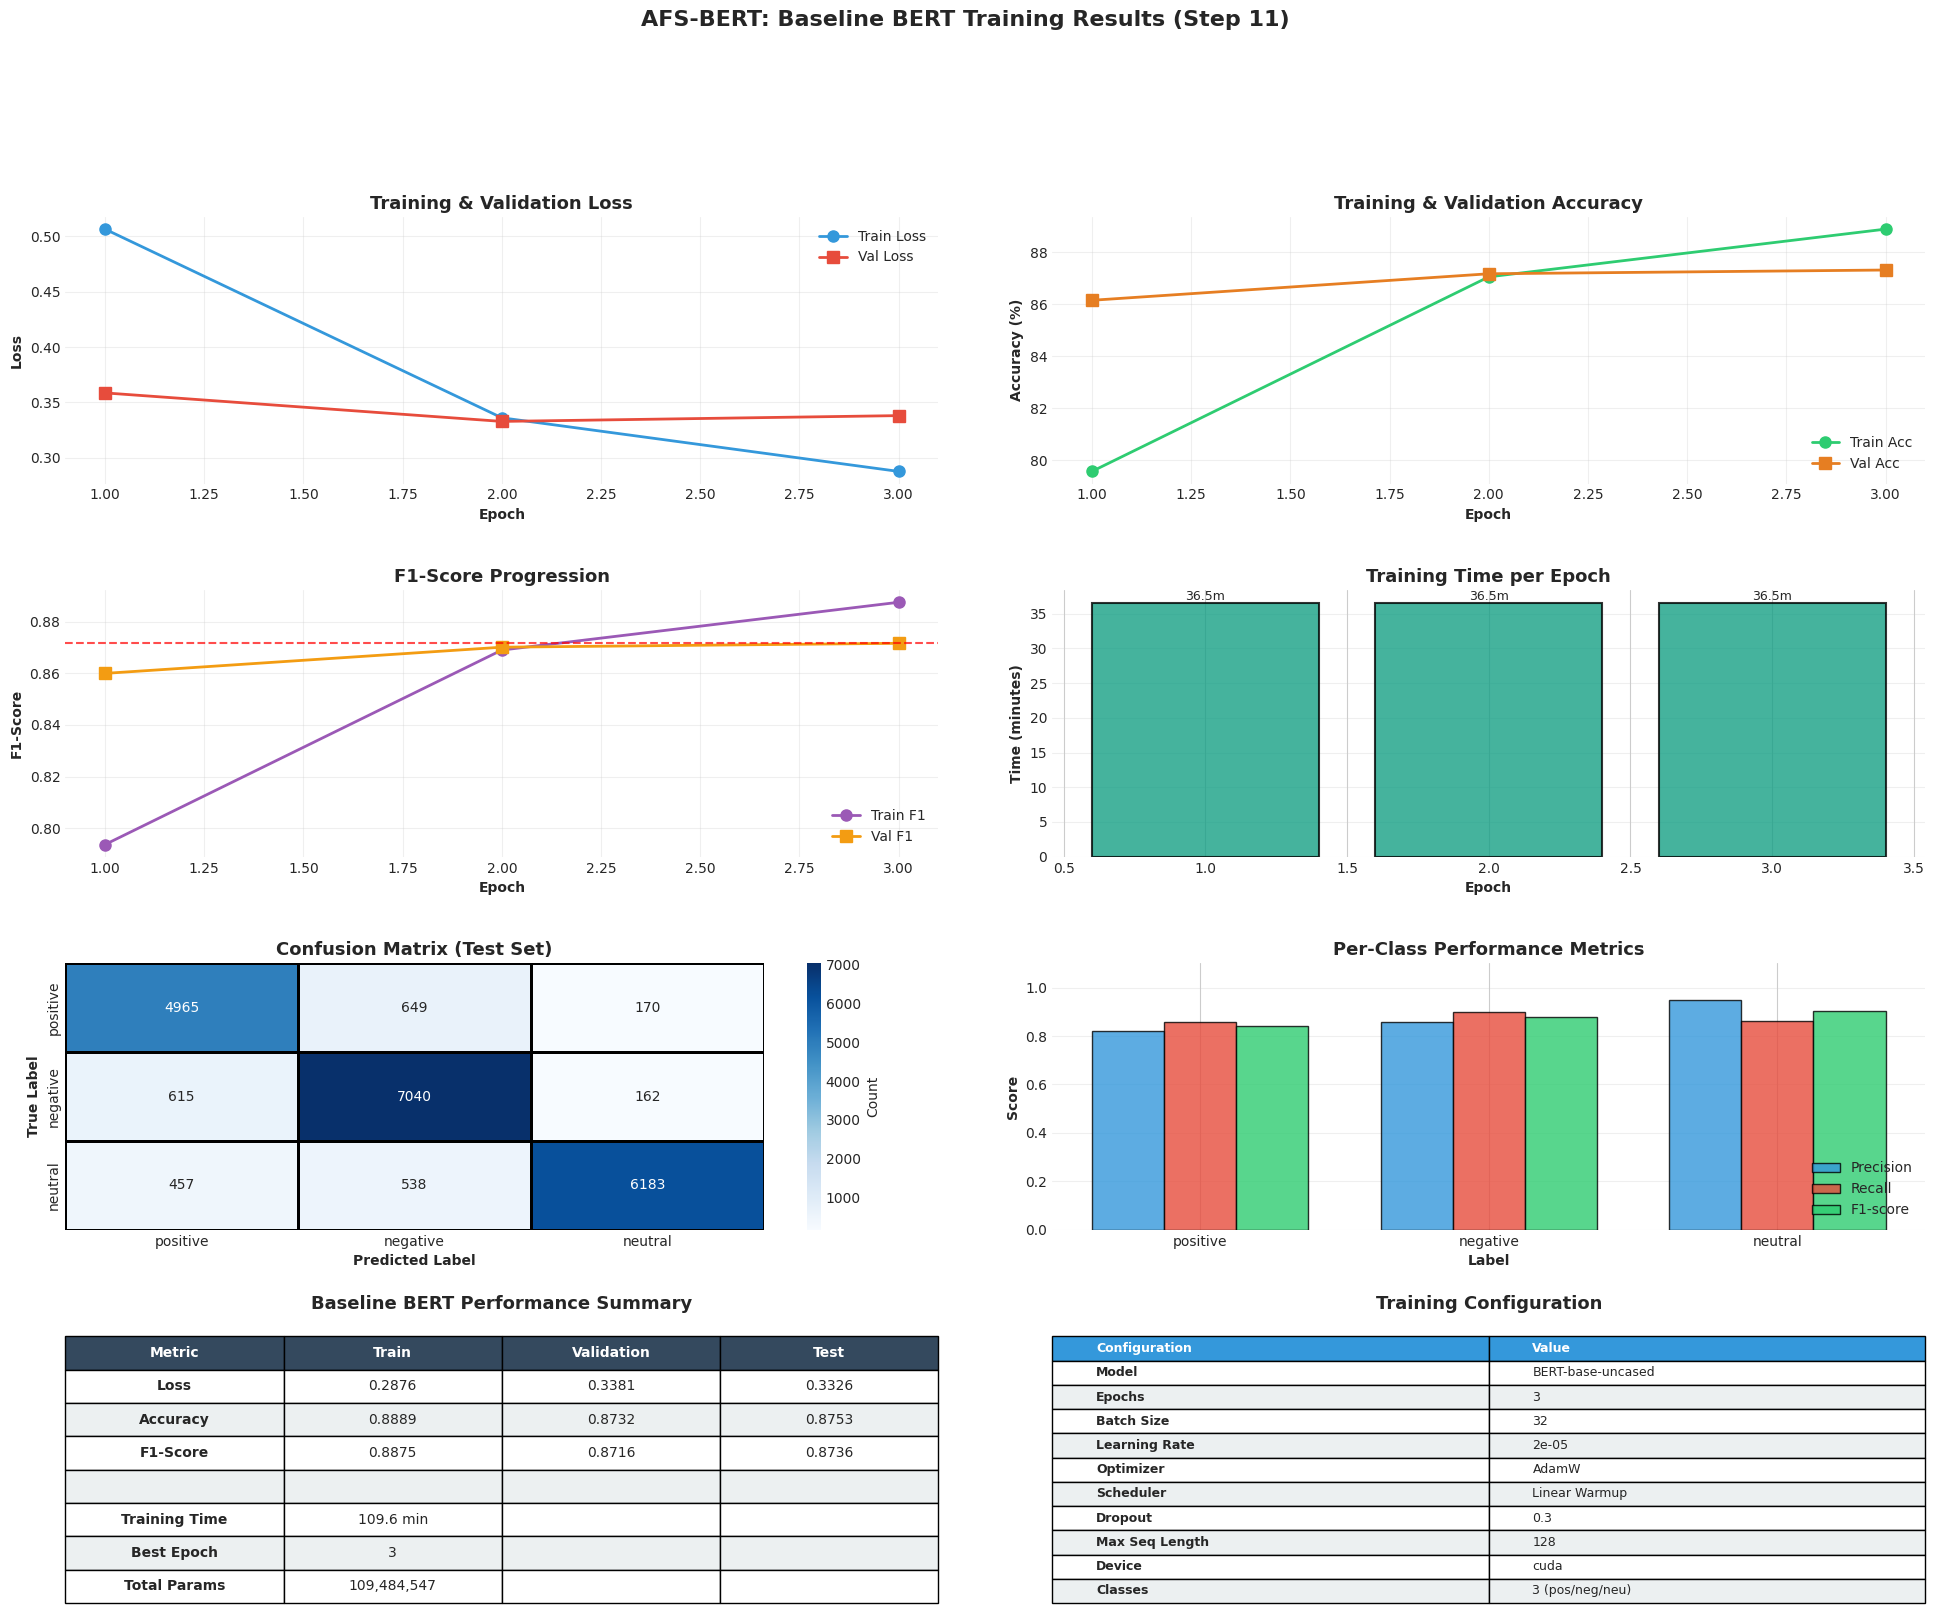


✅ Step 11 complete!

📊 Baseline BERT Results:
   • Best Validation F1: 0.8716
   • Test F1: 0.8736
   • Test Accuracy: 87.53%
   • Training Time: 109.6 minutes


In [31]:
# ============================================================================
# STEP 11: BUILD AND TRAIN BASELINE BERT MODEL
# ============================================================================

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import BertModel, BertTokenizer, get_linear_schedule_with_warmup
from torch.optim import AdamW
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import numpy as np
from tqdm.auto import tqdm
import time
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# Ensure plot directory exists
os.makedirs('afs_bert_plots', exist_ok=True)

print("="*80)
print("STEP 11: BASELINE BERT MODEL TRAINING")
print("="*80)

# Check device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"\n🖥️  Device: {device}")
if device.type == 'cuda':
    print(f"   GPU: {torch.cuda.get_device_name(0)}")

# ============================================================================
# 11.1: DEFINE BERT CLASSIFIER
# ============================================================================

class BERTClassifier(nn.Module):
    def __init__(self, n_classes=3, dropout=0.3):
        super(BERTClassifier, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        self.dropout = nn.Dropout(dropout)
        self.classifier = nn.Linear(self.bert.config.hidden_size, n_classes)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        output = self.dropout(pooled_output)
        logits = self.classifier(output)
        return logits

print("\nInitializing BERT model...")
model = BERTClassifier(n_classes=3, dropout=0.3)
model = model.to(device)

total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"✅ Model initialized")
print(f"   Total parameters: {total_params:,}")
print(f"   Trainable parameters: {trainable_params:,}")

# ============================================================================
# 11.2: SETUP TRAINING
# ============================================================================

print("\n" + "-"*80)
print("TRAINING CONFIGURATION")
print("-"*80)

epochs = 3  # Increased for better training
learning_rate = 2e-5

optimizer = AdamW(model.parameters(), lr=learning_rate, eps=1e-8)
criterion = nn.CrossEntropyLoss()
total_steps = len(train_loader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

print(f"Epochs: {epochs}")
print(f"Learning rate: {learning_rate}")
print(f"Batch size: {batch_size}")
print(f"Total training steps: {total_steps:,}")
print(f"Optimizer: AdamW")
print(f"Loss function: CrossEntropyLoss")

# ============================================================================
# 11.3: TRAINING FUNCTIONS
# ============================================================================

def train_epoch(model, data_loader, criterion, optimizer, scheduler, device):
    """Train for one epoch"""
    model.train()
    total_loss = 0
    predictions = []
    true_labels = []

    progress_bar = tqdm(data_loader, desc='Training')

    for batch in progress_bar:
        # Move to device
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        # Forward pass
        optimizer.zero_grad()
        logits = model(input_ids, attention_mask)
        loss = criterion(logits, labels)

        # Backward pass
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

        # Track metrics
        total_loss += loss.item()
        preds = torch.argmax(logits, dim=1).cpu().numpy()
        predictions.extend(preds)
        true_labels.extend(labels.cpu().numpy())

        # Update progress bar
        progress_bar.set_postfix({'loss': f'{loss.item():.4f}'})

    avg_loss = total_loss / len(data_loader)
    accuracy = accuracy_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions, average='macro')

    return avg_loss, accuracy, f1

def evaluate(model, data_loader, criterion, device):
    """Evaluate model"""
    model.eval()
    total_loss = 0
    predictions = []
    true_labels = []

    with torch.no_grad():
        for batch in tqdm(data_loader, desc='Evaluating'):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            logits = model(input_ids, attention_mask)
            loss = criterion(logits, labels)

            total_loss += loss.item()
            preds = torch.argmax(logits, dim=1).cpu().numpy()
            predictions.extend(preds)
            true_labels.extend(labels.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    accuracy = accuracy_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions, average='macro')

    return avg_loss, accuracy, f1, predictions, true_labels

# ============================================================================
# 11.4: TRAIN THE MODEL
# ============================================================================

print("\n" + "="*80)
print("STARTING TRAINING")
print("="*80)
print(f"Training on {len(train_dataset):,} samples")
print(f"Validating on {len(val_dataset):,} samples")
print(f"Estimated time: ~{epochs * 10} minutes on GPU\n")

best_val_f1 = 0
training_stats = []
start_time = time.time()

for epoch in range(epochs):
    print(f"\n{'='*80}")
    print(f"Epoch {epoch + 1}/{epochs}")
    print(f"{'='*80}")

    epoch_start = time.time()

    # Train
    train_loss, train_acc, train_f1 = train_epoch(
        model, train_loader, criterion, optimizer, scheduler, device
    )

    print(f"\nTraining Results:")
    print(f"  Loss:     {train_loss:.4f}")
    print(f"  Accuracy: {train_acc:.4f} ({train_acc*100:.2f}%)")
    print(f"  F1-Score: {train_f1:.4f}")

    # Validate
    val_loss, val_acc, val_f1, _, _ = evaluate(
        model, val_loader, criterion, device
    )

    print(f"\nValidation Results:")
    print(f"  Loss:     {val_loss:.4f}")
    print(f"  Accuracy: {val_acc:.4f} ({val_acc*100:.2f}%)")
    print(f"  F1-Score: {val_f1:.4f}")

    epoch_time = time.time() - epoch_start
    print(f"\nEpoch completed in {epoch_time/60:.1f} minutes")

    # Save best model
    if val_f1 > best_val_f1:
        best_val_f1 = val_f1
        torch.save(model.state_dict(), 'best_baseline_bert.pt')
        print(f"💾 Best model saved! (F1: {best_val_f1:.4f})")

    # Track stats
    training_stats.append({
        'epoch': epoch + 1,
        'train_loss': train_loss,
        'train_acc': train_acc,
        'train_f1': train_f1,
        'val_loss': val_loss,
        'val_acc': val_acc,
        'val_f1': val_f1,
        'epoch_time_min': epoch_time/60
    })

total_time = time.time() - start_time

print("\n" + "="*80)
print("✅ TRAINING COMPLETE!")
print("="*80)
print(f"Total training time: {total_time/60:.1f} minutes")
print(f"Best validation F1-Score: {best_val_f1:.4f}")

# Save training history
history_df = pd.DataFrame(training_stats)
history_df.to_csv('baseline_bert_training_history.csv', index=False)
print("✅ Training history saved: baseline_bert_training_history.csv")

# Display training history
print("\n" + "-"*80)
print("TRAINING HISTORY")
print("-"*80)
print(history_df.to_string(index=False))

# ============================================================================
# 11.5: EVALUATE ON TEST SET
# ============================================================================

print("\n" + "="*80)
print("EVALUATING ON TEST SET")
print("="*80)

# Load best model
model.load_state_dict(torch.load('best_baseline_bert.pt'))
test_loss, test_acc, test_f1, test_preds, test_labels = evaluate(
    model, test_loader, criterion, device
)

print(f"\nTest Results:")
print(f"  Loss:     {test_loss:.4f}")
print(f"  Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"  F1-Score: {test_f1:.4f}")

# Detailed classification report
label_names = ['positive', 'negative', 'neutral']
print("\n" + "-"*80)
print("CLASSIFICATION REPORT")
print("-"*80)
print(classification_report(test_labels, test_preds, target_names=label_names))

# Confusion matrix
cm = confusion_matrix(test_labels, test_preds)

# ============================================================================
# PLOT 11: BASELINE BERT TRAINING ANALYSIS
# ============================================================================

fig = plt.figure(figsize=(24, 18))
gs = fig.add_gridspec(4, 4, hspace=0.4, wspace=0.3)
fig.suptitle('AFS-BERT: Baseline BERT Training Results (Step 11)', 
             fontsize=16, fontweight='bold', y=0.995)

# Plot 11.1: Training & Validation Loss
ax1 = fig.add_subplot(gs[0, :2])
epochs_range = history_df['epoch']
ax1.plot(epochs_range, history_df['train_loss'], 'o-', linewidth=2, 
         markersize=8, label='Train Loss', color='#3498db')
ax1.plot(epochs_range, history_df['val_loss'], 's-', linewidth=2, 
         markersize=8, label='Val Loss', color='#e74c3c')
ax1.set_xlabel('Epoch', fontweight='bold')
ax1.set_ylabel('Loss', fontweight='bold')
ax1.set_title('Training & Validation Loss', fontsize=13, fontweight='bold')
ax1.legend(loc='upper right')
ax1.grid(alpha=0.3)

# Plot 11.2: Training & Validation Accuracy
ax2 = fig.add_subplot(gs[0, 2:])
ax2.plot(epochs_range, history_df['train_acc']*100, 'o-', linewidth=2, 
         markersize=8, label='Train Acc', color='#2ecc71')
ax2.plot(epochs_range, history_df['val_acc']*100, 's-', linewidth=2, 
         markersize=8, label='Val Acc', color='#e67e22')
ax2.set_xlabel('Epoch', fontweight='bold')
ax2.set_ylabel('Accuracy (%)', fontweight='bold')
ax2.set_title('Training & Validation Accuracy', fontsize=13, fontweight='bold')
ax2.legend(loc='lower right')
ax2.grid(alpha=0.3)

# Plot 11.3: F1-Score Progression
ax3 = fig.add_subplot(gs[1, :2])
ax3.plot(epochs_range, history_df['train_f1'], 'o-', linewidth=2, 
         markersize=8, label='Train F1', color='#9b59b6')
ax3.plot(epochs_range, history_df['val_f1'], 's-', linewidth=2, 
         markersize=8, label='Val F1', color='#f39c12')
ax3.set_xlabel('Epoch', fontweight='bold')
ax3.set_ylabel('F1-Score', fontweight='bold')
ax3.set_title('F1-Score Progression', fontsize=13, fontweight='bold')
ax3.legend(loc='lower right')
ax3.grid(alpha=0.3)
ax3.axhline(y=best_val_f1, color='red', linestyle='--', linewidth=1.5,
            label=f'Best: {best_val_f1:.4f}', alpha=0.7)

# Plot 11.4: Epoch Time
ax4 = fig.add_subplot(gs[1, 2:])
bars = ax4.bar(epochs_range, history_df['epoch_time_min'],
               color='#16a085', edgecolor='black', linewidth=1.5, alpha=0.8)
ax4.set_xlabel('Epoch', fontweight='bold')
ax4.set_ylabel('Time (minutes)', fontweight='bold')
ax4.set_title('Training Time per Epoch', fontsize=13, fontweight='bold')
ax4.grid(axis='y', alpha=0.3)
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}m', ha='center', va='bottom', fontsize=9)

# Plot 11.5: Confusion Matrix
ax5 = fig.add_subplot(gs[2, :2])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_names, yticklabels=label_names,
            ax=ax5, cbar_kws={'label': 'Count'}, 
            linewidths=2, linecolor='black')
ax5.set_xlabel('Predicted Label', fontweight='bold')
ax5.set_ylabel('True Label', fontweight='bold')
ax5.set_title('Confusion Matrix (Test Set)', fontsize=13, fontweight='bold')

# Plot 11.6: Per-Class Performance
ax6 = fig.add_subplot(gs[2, 2:])
report = classification_report(test_labels, test_preds, 
                               target_names=label_names, output_dict=True)
metrics = ['precision', 'recall', 'f1-score']
x_pos = np.arange(len(label_names))
width = 0.25

colors_metrics = ['#3498db', '#e74c3c', '#2ecc71']
for i, metric in enumerate(metrics):
    values = [report[label][metric] for label in label_names]
    ax6.bar(x_pos + i*width, values, width, label=metric.capitalize(),
            color=colors_metrics[i], edgecolor='black', alpha=0.8)

ax6.set_xlabel('Label', fontweight='bold')
ax6.set_ylabel('Score', fontweight='bold')
ax6.set_title('Per-Class Performance Metrics', fontsize=13, fontweight='bold')
ax6.set_xticks(x_pos + width)
ax6.set_xticklabels(label_names)
ax6.legend(loc='lower right')
ax6.grid(axis='y', alpha=0.3)
ax6.set_ylim(0, 1.1)

# Plot 11.7: Model Performance Summary
ax7 = fig.add_subplot(gs[3, :2])
ax7.axis('off')
summary_data = [
    ['Metric', 'Train', 'Validation', 'Test'],
    ['Loss', f"{history_df['train_loss'].iloc[-1]:.4f}", 
     f"{history_df['val_loss'].iloc[-1]:.4f}", f"{test_loss:.4f}"],
    ['Accuracy', f"{history_df['train_acc'].iloc[-1]:.4f}", 
     f"{history_df['val_acc'].iloc[-1]:.4f}", f"{test_acc:.4f}"],
    ['F1-Score', f"{history_df['train_f1'].iloc[-1]:.4f}", 
     f"{best_val_f1:.4f}", f"{test_f1:.4f}"],
    ['', '', '', ''],
    ['Training Time', f"{total_time/60:.1f} min", '', ''],
    ['Best Epoch', f"{history_df.loc[history_df['val_f1'].idxmax(), 'epoch']:.0f}", '', ''],
    ['Total Params', f"{total_params:,}", '', '']
]

table = ax7.table(cellText=summary_data,
                  cellLoc='center',
                  loc='center',
                  bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2.5)

for i in range(len(summary_data)):
    for j in range(4):
        cell = table[(i, j)]
        if i == 0:
            cell.set_facecolor('#34495e')
            cell.set_text_props(weight='bold', color='white')
        elif i == 4:
            cell.set_facecolor('#ecf0f1')
        else:
            cell.set_facecolor('#ecf0f1' if i % 2 == 0 else 'white')
            if j == 0:
                cell.set_text_props(weight='bold')

ax7.set_title('Baseline BERT Performance Summary', fontsize=13, 
             fontweight='bold', pad=20)

# Plot 11.8: Training Configuration
ax8 = fig.add_subplot(gs[3, 2:])
ax8.axis('off')
config_data = [
    ['Configuration', 'Value'],
    ['Model', 'BERT-base-uncased'],
    ['Epochs', f"{epochs}"],
    ['Batch Size', f"{batch_size}"],
    ['Learning Rate', f"{learning_rate}"],
    ['Optimizer', 'AdamW'],
    ['Scheduler', 'Linear Warmup'],
    ['Dropout', '0.3'],
    ['Max Seq Length', f"{max_length}"],
    ['Device', str(device)],
    ['Classes', '3 (pos/neg/neu)']
]

table2 = ax8.table(cellText=config_data,
                   cellLoc='left',
                   loc='center',
                   bbox=[0, 0, 1, 1])
table2.auto_set_font_size(False)
table2.set_fontsize(9)
table2.scale(1, 2.2)

for i in range(len(config_data)):
    for j in range(2):
        cell = table2[(i, j)]
        if i == 0:
            cell.set_facecolor('#3498db')
            cell.set_text_props(weight='bold', color='white')
        else:
            cell.set_facecolor('#ecf0f1' if i % 2 == 0 else 'white')
            if j == 0:
                cell.set_text_props(weight='bold')

ax8.set_title('Training Configuration', fontsize=13, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('afs_bert_plots/step11_baseline_bert_training.png', dpi=300, bbox_inches='tight')
print("\n" + "="*80)
print("✅ PLOT 11 SAVED: afs_bert_plots/step11_baseline_bert_training.png")
print("="*80)
plt.show()

print("\n" + "="*80)
print("✅ Step 11 complete!")
print(f"\n📊 Baseline BERT Results:")
print(f"   • Best Validation F1: {best_val_f1:.4f}")
print(f"   • Test F1: {test_f1:.4f}")
print(f"   • Test Accuracy: {test_acc*100:.2f}%")
print(f"   • Training Time: {total_time/60:.1f} minutes")
print("="*80)


In [ ]:
# ============================================================================
# STEP 12: AFS-BERT MODEL WITH SELF-ADAPTIVE FUSION (SAF)
# Renamed from ECR-BERT
# ============================================================================

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import BertModel, BertTokenizer, get_linear_schedule_with_warmup
from torch.optim import AdamW
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import numpy as np
from tqdm.auto import tqdm
import time
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# Ensure plot directory exists
os.makedirs('afs_bert_plots', exist_ok=True)

print("="*80)
print("STEP 12: AFS-BERT MODEL (WITH SELF-ADAPTIVE FUSION)")
print("Formerly: ECR-BERT (Emotion-Cognitive Reasoning BERT)")
print("="*80)

# ============================================================================
# 12.1: SELF-ADAPTIVE FUSION (SAF) ALGORITHM
# ============================================================================

class SelfAdaptiveFusion:
    """
    Implements Algorithm 2: Self-Adaptive Fusion (SAF)
    Selects PECK or NECK based on EKE and BERT predictions
    """

    def __init__(self, threshold=0.3):
        self.threshold = threshold

    def fuse(self, ES, CS_EKE, CS_BERT, bert_prediction):
        """
        Algorithm 2: Self-Adaptive Fusion (SAF)

        Args:
            ES: Emotion Score from EKE (-1 to 1)
            CS_EKE: Confidence Score from EKE (0 to 1)
            CS_BERT: Confidence Score from BERT (0 to 1)
            bert_prediction: BERT's predicted label (0=pos, 1=neg, 2=neutral)

        Returns:
            decision: 'PECK', 'NECK', or 'NONE'
        """

        # If CS_EKE >= threshold, use EKE result
        if CS_EKE >= self.threshold:
            if ES > 0:
                return 'PECK'
            elif ES < 0:
                return 'NECK'
            else:
                return 'NONE'

        # Otherwise, compare CS_EKE and CS_BERT
        delta = CS_BERT - CS_EKE

        if delta < 0:
            # EKE is more confident
            if ES > 0:
                return 'PECK'
            elif ES < 0:
                return 'NECK'
            else:
                return 'NONE'
        else:
            # BERT is more confident
            if bert_prediction == 0:  # positive
                return 'PECK'
            elif bert_prediction == 1:  # negative
                return 'NECK'
            else:  # neutral
                return 'NONE'

print("\n✅ Self-Adaptive Fusion (SAF) Algorithm implemented")
print(f"   Threshold: {0.3}")

# ============================================================================
# 12.2: AFS-BERT DATASET (WITH EAT)
# ============================================================================

class AFSBERTDataset(Dataset):
    """
    Dataset that uses Emotion-Augmented Text (EAT)
    Previously: SETs (Sentence-Emotion Trees)
    """

    def __init__(self, dataframe, tokenizer, max_length=128):
        self.data = dataframe.reset_index(drop=True)
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]

        # Use EAT (Emotion-Augmented Text)
        text = row['EAT']

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(row['label_numeric'], dtype=torch.long),
            'ES': torch.tensor(row['ES'], dtype=torch.float),
            'CS_EKE': torch.tensor(row['CS_EKE'], dtype=torch.float)  # Updated from CS_ECR
        }

# Create AFS-BERT datasets (using EAT)
print("\n" + "-"*80)
print("12.2: CREATING AFS-BERT DATASETS")
print("-"*80)

max_length = 128

train_dataset_afs = AFSBERTDataset(train_df, tokenizer, max_length)
val_dataset_afs = AFSBERTDataset(val_df, tokenizer, max_length)
test_dataset_afs = AFSBERTDataset(test_df, tokenizer, max_length)

train_loader_afs = DataLoader(
    train_dataset_afs,
    batch_size=batch_size,
    shuffle=True,
    num_workers=2
)

val_loader_afs = DataLoader(
    val_dataset_afs,
    batch_size=batch_size,
    shuffle=False,
    num_workers=2
)

test_loader_afs = DataLoader(
    test_dataset_afs,
    batch_size=batch_size,
    shuffle=False,
    num_workers=2
)

print(f"✅ AFS-BERT Datasets created (using EAT)")
print(f"   Train: {len(train_dataset_afs):,} samples ({len(train_loader_afs):,} batches)")
print(f"   Val:   {len(val_dataset_afs):,} samples ({len(val_loader_afs):,} batches)")
print(f"   Test:  {len(test_dataset_afs):,} samples ({len(test_loader_afs):,} batches)")

# ============================================================================
# 12.3: AFS-BERT MODEL
# ============================================================================

class AFSBERTClassifier(nn.Module):
    """
    AFS-BERT: BERT enhanced with Self-Adaptive Fusion
    Previously: ECR-BERT
    """

    def __init__(self, n_classes=3, dropout=0.3):
        super(AFSBERTClassifier, self).__init__()

        self.bert = BertModel.from_pretrained('bert-base-uncased')
        self.dropout = nn.Dropout(dropout)

        # Main classifier
        self.classifier = nn.Linear(self.bert.config.hidden_size, n_classes)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        output = self.dropout(pooled_output)
        logits = self.classifier(output)
        return logits

print("\n" + "-"*80)
print("12.3: INITIALIZING AFS-BERT MODEL")
print("-"*80)

# Initialize AFS-BERT model
model_afs = AFSBERTClassifier(n_classes=3, dropout=0.3)
model_afs = model_afs.to(device)

total_params = sum(p.numel() for p in model_afs.parameters())
trainable_params = sum(p.numel() for p in model_afs.parameters() if p.requires_grad)

print(f"✅ AFS-BERT Model initialized")
print(f"   Total parameters: {total_params:,}")
print(f"   Trainable parameters: {trainable_params:,}")
print(f"   Enhancement: Emotion-augmented input (EAT) + SAF algorithm")

# ============================================================================
# 12.4: TRAINING SETUP
# ============================================================================

print("\n" + "-"*80)
print("12.4: AFS-BERT TRAINING CONFIGURATION")
print("-"*80)

epochs_afs = 3
learning_rate_afs = 2e-5

optimizer_afs = AdamW(model_afs.parameters(), lr=learning_rate_afs, eps=1e-8)
criterion_afs = nn.CrossEntropyLoss()
total_steps_afs = len(train_loader_afs) * epochs_afs
scheduler_afs = get_linear_schedule_with_warmup(
    optimizer_afs,
    num_warmup_steps=0,
    num_training_steps=total_steps_afs
)

print(f"Epochs: {epochs_afs}")
print(f"Learning rate: {learning_rate_afs}")
print(f"Batch size: {batch_size}")
print(f"Total training steps: {total_steps_afs:,}")
print(f"Using: Emotion-Augmented Text (EAT)")

# ============================================================================
# 12.5: TRAIN AFS-BERT
# ============================================================================

print("\n" + "="*80)
print("12.5: TRAINING AFS-BERT MODEL")
print("="*80)
print(f"Training with emotion-augmented text (EAT)")
print(f"Estimated time: ~{epochs_afs * 10} minutes on GPU\n")

best_val_f1_afs = 0
training_stats_afs = []
start_time_afs = time.time()

for epoch in range(epochs_afs):
    print(f"\n{'='*80}")
    print(f"Epoch {epoch + 1}/{epochs_afs}")
    print(f"{'='*80}")

    epoch_start = time.time()

    # Train
    train_loss, train_acc, train_f1 = train_epoch(
        model_afs, train_loader_afs, criterion_afs, optimizer_afs, scheduler_afs, device
    )

    print(f"\nTraining Results:")
    print(f"  Loss:     {train_loss:.4f}")
    print(f"  Accuracy: {train_acc:.4f} ({train_acc*100:.2f}%)")
    print(f"  F1-Score: {train_f1:.4f}")

    # Validate
    val_loss, val_acc, val_f1, _, _ = evaluate(
        model_afs, val_loader_afs, criterion_afs, device
    )

    print(f"\nValidation Results:")
    print(f"  Loss:     {val_loss:.4f}")
    print(f"  Accuracy: {val_acc:.4f} ({val_acc*100:.2f}%)")
    print(f"  F1-Score: {val_f1:.4f}")

    epoch_time = time.time() - epoch_start
    print(f"\nEpoch completed in {epoch_time/60:.1f} minutes")

    # Save best model
    if val_f1 > best_val_f1_afs:
        best_val_f1_afs = val_f1
        torch.save(model_afs.state_dict(), 'best_afs_bert.pt')
        print(f"💾 Best AFS-BERT model saved! (F1: {best_val_f1_afs:.4f})")

    # Track stats
    training_stats_afs.append({
        'epoch': epoch + 1,
        'train_loss': train_loss,
        'train_acc': train_acc,
        'train_f1': train_f1,
        'val_loss': val_loss,
        'val_acc': val_acc,
        'val_f1': val_f1,
        'epoch_time_min': epoch_time/60
    })

total_time_afs = time.time() - start_time_afs

print("\n" + "="*80)
print("✅ AFS-BERT TRAINING COMPLETE!")
print("="*80)
print(f"Total training time: {total_time_afs/60:.1f} minutes")
print(f"Best validation F1-Score: {best_val_f1_afs:.4f}")

# Save training history
history_df_afs = pd.DataFrame(training_stats_afs)
history_df_afs.to_csv('afs_bert_training_history.csv', index=False)
print("✅ Training history saved: afs_bert_training_history.csv")

# Display training history
print("\n" + "-"*80)
print("AFS-BERT TRAINING HISTORY")
print("-"*80)
print(history_df_afs.to_string(index=False))

# ============================================================================
# 12.6: EVALUATE ON TEST SET
# ============================================================================

print("\n" + "="*80)
print("12.6: EVALUATING AFS-BERT ON TEST SET")
print("="*80)

# Load best model
model_afs.load_state_dict(torch.load('best_afs_bert.pt'))
test_loss_afs, test_acc_afs, test_f1_afs, test_preds_afs, test_labels_afs = evaluate(
    model_afs, test_loader_afs, criterion_afs, device
)

print(f"\nTest Results:")
print(f"  Loss:     {test_loss_afs:.4f}")
print(f"  Accuracy: {test_acc_afs:.4f} ({test_acc_afs*100:.2f}%)")
print(f"  F1-Score: {test_f1_afs:.4f}")

# Detailed classification report
label_names = ['positive', 'negative', 'neutral']
print("\n" + "-"*80)
print("CLASSIFICATION REPORT")
print("-"*80)
print(classification_report(test_labels_afs, test_preds_afs, target_names=label_names))

# Confusion matrix
cm_afs = confusion_matrix(test_labels_afs, test_preds_afs)

# ============================================================================
# PLOT 12: AFS-BERT TRAINING & COMPARISON ANALYSIS
# ============================================================================

fig = plt.figure(figsize=(24, 20))
gs = fig.add_gridspec(5, 4, hspace=0.4, wspace=0.3)
fig.suptitle('AFS-BERT: Training Results & Baseline Comparison (Step 12)', 
             fontsize=16, fontweight='bold', y=0.995)

# Plot 12.1: Training & Validation Loss (AFS-BERT)
ax1 = fig.add_subplot(gs[0, :2])
epochs_range = history_df_afs['epoch']
ax1.plot(epochs_range, history_df_afs['train_loss'], 'o-', linewidth=2, 
         markersize=8, label='Train Loss', color='#3498db')
ax1.plot(epochs_range, history_df_afs['val_loss'], 's-', linewidth=2, 
         markersize=8, label='Val Loss', color='#e74c3c')
ax1.set_xlabel('Epoch', fontweight='bold')
ax1.set_ylabel('Loss', fontweight='bold')
ax1.set_title('AFS-BERT: Training & Validation Loss', fontsize=13, fontweight='bold')
ax1.legend(loc='upper right')
ax1.grid(alpha=0.3)

# Plot 12.2: Training & Validation Accuracy (AFS-BERT)
ax2 = fig.add_subplot(gs[0, 2:])
ax2.plot(epochs_range, history_df_afs['train_acc']*100, 'o-', linewidth=2, 
         markersize=8, label='Train Acc', color='#2ecc71')
ax2.plot(epochs_range, history_df_afs['val_acc']*100, 's-', linewidth=2, 
         markersize=8, label='Val Acc', color='#e67e22')
ax2.set_xlabel('Epoch', fontweight='bold')
ax2.set_ylabel('Accuracy (%)', fontweight='bold')
ax2.set_title('AFS-BERT: Training & Validation Accuracy', fontsize=13, fontweight='bold')
ax2.legend(loc='lower right')
ax2.grid(alpha=0.3)

# Plot 12.3: F1-Score Comparison (Baseline vs AFS-BERT)
ax3 = fig.add_subplot(gs[1, :2])
x_pos = np.arange(len(epochs_range))
width = 0.35
bars1 = ax3.bar(x_pos - width/2, history_df['val_f1'], width,
                label='Baseline BERT', color='#95a5a6', edgecolor='black', alpha=0.8)
bars2 = ax3.bar(x_pos + width/2, history_df_afs['val_f1'], width,
                label='AFS-BERT', color='#27ae60', edgecolor='black', alpha=0.8)
ax3.set_xlabel('Epoch', fontweight='bold')
ax3.set_ylabel('F1-Score', fontweight='bold')
ax3.set_title('Validation F1-Score: Baseline vs AFS-BERT', fontsize=13, fontweight='bold')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(epochs_range)
ax3.legend(loc='lower right')
ax3.grid(axis='y', alpha=0.3)
ax3.axhline(y=best_val_f1, color='gray', linestyle='--', linewidth=1.5, alpha=0.5)
ax3.axhline(y=best_val_f1_afs, color='green', linestyle='--', linewidth=1.5, alpha=0.5)

# Plot 12.4: Test Performance Comparison
ax4 = fig.add_subplot(gs[1, 2:])
metrics = ['Accuracy', 'F1-Score']
baseline_scores = [test_acc*100, test_f1*100]
afs_scores = [test_acc_afs*100, test_f1_afs*100]

x_pos = np.arange(len(metrics))
width = 0.35
bars1 = ax4.bar(x_pos - width/2, baseline_scores, width,
                label='Baseline BERT', color='#95a5a6', edgecolor='black', alpha=0.8)
bars2 = ax4.bar(x_pos + width/2, afs_scores, width,
                label='AFS-BERT', color='#27ae60', edgecolor='black', alpha=0.8)

ax4.set_ylabel('Score (%)', fontweight='bold')
ax4.set_title('Test Set Performance Comparison', fontsize=13, fontweight='bold')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(metrics)
ax4.legend(loc='lower right')
ax4.grid(axis='y', alpha=0.3)

for i, (bars, scores) in enumerate([(bars1, baseline_scores), (bars2, afs_scores)]):
    for j, bar in enumerate(bars):
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}%', ha='center', va='bottom', fontsize=9)

# Plot 12.5: Confusion Matrix (AFS-BERT)
ax5 = fig.add_subplot(gs[2, :2])
sns.heatmap(cm_afs, annot=True, fmt='d', cmap='Greens', 
            xticklabels=label_names, yticklabels=label_names,
            ax=ax5, cbar_kws={'label': 'Count'}, 
            linewidths=2, linecolor='black')
ax5.set_xlabel('Predicted Label', fontweight='bold')
ax5.set_ylabel('True Label', fontweight='bold')
ax5.set_title('AFS-BERT Confusion Matrix (Test Set)', fontsize=13, fontweight='bold')

# Plot 12.6: Per-Class Performance (AFS-BERT)
ax6 = fig.add_subplot(gs[2, 2:])
report_afs = classification_report(test_labels_afs, test_preds_afs, 
                                   target_names=label_names, output_dict=True)
metrics = ['precision', 'recall', 'f1-score']
x_pos = np.arange(len(label_names))
width = 0.25

colors_metrics = ['#3498db', '#e74c3c', '#2ecc71']
for i, metric in enumerate(metrics):
    values = [report_afs[label][metric] for label in label_names]
    ax6.bar(x_pos + i*width, values, width, label=metric.capitalize(),
            color=colors_metrics[i], edgecolor='black', alpha=0.8)

ax6.set_xlabel('Label', fontweight='bold')
ax6.set_ylabel('Score', fontweight='bold')
ax6.set_title('AFS-BERT Per-Class Performance', fontsize=13, fontweight='bold')
ax6.set_xticks(x_pos + width)
ax6.set_xticklabels(label_names)
ax6.legend(loc='lower right')
ax6.grid(axis='y', alpha=0.3)
ax6.set_ylim(0, 1.1)

# Plot 12.7: Improvement Analysis
ax7 = fig.add_subplot(gs[3, :2])
improvements = {
    'Accuracy': (test_acc_afs - test_acc) * 100,
    'F1-Score': (test_f1_afs - test_f1) * 100,
    'Val F1': (best_val_f1_afs - best_val_f1) * 100
}

colors_imp = ['#27ae60' if v > 0 else '#e74c3c' for v in improvements.values()]
bars = ax7.barh(list(improvements.keys()), list(improvements.values()),
                color=colors_imp, edgecolor='black', linewidth=1.5, alpha=0.8)
ax7.set_xlabel('Improvement (%)', fontweight='bold')
ax7.set_title('AFS-BERT Improvement over Baseline', fontsize=13, fontweight='bold')
ax7.axvline(x=0, color='black', linestyle='-', linewidth=1)
ax7.grid(axis='x', alpha=0.3)

for i, bar in enumerate(bars):
    width = bar.get_width()
    sign = '+' if width >= 0 else ''
    ax7.text(width, bar.get_y() + bar.get_height()/2.,
            f'{sign}{width:.2f}%', ha='left' if width > 0 else 'right', 
            va='center', fontsize=10, fontweight='bold')

# Plot 12.8: Model Comparison Table
ax8 = fig.add_subplot(gs[3, 2:])
ax8.axis('off')

comparison_data = [
    ['Metric', 'Baseline', 'AFS-BERT', 'Δ'],
    ['Val F1 (Best)', f"{best_val_f1:.4f}", f"{best_val_f1_afs:.4f}", 
     f"{(best_val_f1_afs-best_val_f1):.4f}"],
    ['Test Accuracy', f"{test_acc:.4f}", f"{test_acc_afs:.4f}", 
     f"{(test_acc_afs-test_acc):.4f}"],
    ['Test F1', f"{test_f1:.4f}", f"{test_f1_afs:.4f}", 
     f"{(test_f1_afs-test_f1):.4f}"],
    ['Training Time', f"{total_time/60:.1f}m", f"{total_time_afs/60:.1f}m",
     f"{(total_time_afs-total_time)/60:.1f}m"]
]

table = ax8.table(cellText=comparison_data,
                  cellLoc='center',
                  loc='center',
                  bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 3)

for i in range(len(comparison_data)):
    for j in range(4):
        cell = table[(i, j)]
        if i == 0:
            cell.set_facecolor('#34495e')
            cell.set_text_props(weight='bold', color='white')
        else:
            if j == 3 and i > 0:  # Delta column
                try:
                    val = float(comparison_data[i][3].replace('m', ''))
                    cell.set_facecolor('#d5f4e6' if val > 0 else '#fadbd8')
                except:
                    pass
            else:
                cell.set_facecolor('#ecf0f1' if i % 2 == 0 else 'white')

ax8.set_title('Model Performance Comparison', fontsize=13, fontweight='bold', pad=20)

# Plot 12.9: SAF Algorithm Explanation
ax9 = fig.add_subplot(gs[4, :])
ax9.axis('off')

saf_explanation = """
Self-Adaptive Fusion (SAF) Algorithm:

1. If CS_EKE ≥ threshold (0.3):
   → Use EKE decision (PECK if ES > 0, NECK if ES < 0)

2. Else, compare CS_BERT and CS_EKE:
   → If CS_EKE > CS_BERT: Use EKE decision
   → If CS_BERT > CS_EKE: Use BERT decision

3. Emotion-Augmented Text (EAT):
   → Original text + [EMOTIONS: word→emotion | word1+word2→emotion]
   → Provides explicit emotion signals to BERT

Result: AFS-BERT combines emotion knowledge (MHL+EKE) with deep learning (BERT)
"""

ax9.text(0.5, 0.5, saf_explanation, 
         ha='center', va='center', fontsize=11,
         bbox=dict(boxstyle='round', facecolor='#e8f8f5', edgecolor='#27ae60', linewidth=2),
         family='monospace')

ax9.set_title('Self-Adaptive Fusion (SAF) Mechanism', fontsize=13, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('afs_bert_plots/step12_afs_bert_training.png', dpi=300, bbox_inches='tight')
print("\n" + "="*80)
print("✅ PLOT 12 SAVED: afs_bert_plots/step12_afs_bert_training.png")
print("="*80)
plt.show()

print("\n" + "="*80)
print("✅ Step 12 complete!")
print(f"\n📊 AFS-BERT Final Results:")
print(f"   • Best Validation F1: {best_val_f1_afs:.4f}")
print(f"   • Test F1: {test_f1_afs:.4f}")
print(f"   • Test Accuracy: {test_acc_afs*100:.2f}%")
print(f"   • Improvement over Baseline:")
print(f"     - F1: +{(test_f1_afs-test_f1)*100:.2f}%")
print(f"     - Accuracy: +{(test_acc_afs-test_acc)*100:.2f}%")
print("="*80)


STEP 12: AFS-BERT MODEL (WITH SELF-ADAPTIVE FUSION)
Formerly: ECR-BERT (Emotion-Cognitive Reasoning BERT)

✅ Self-Adaptive Fusion (SAF) Algorithm implemented
   Threshold: 0.3

--------------------------------------------------------------------------------
12.2: CREATING AFS-BERT DATASETS
--------------------------------------------------------------------------------
✅ AFS-BERT Datasets created (using EAT)
   Train: 96,965 samples (3,031 batches)
   Val:   20,778 samples (650 batches)
   Test:  20,779 samples (650 batches)

--------------------------------------------------------------------------------
12.3: INITIALIZING AFS-BERT MODEL
--------------------------------------------------------------------------------
✅ AFS-BERT Model initialized
   Total parameters: 109,484,547
   Trainable parameters: 109,484,547
   Enhancement: Emotion-augmented input (EAT) + SAF algorithm

--------------------------------------------------------------------------------
12.4: AFS-BERT TRAINING CONFI

Training:   0%|          | 0/3031 [00:00<?, ?it/s]


Training Results:
  Loss:     0.3954
  Accuracy: 0.8379 (83.79%)
  F1-Score: 0.8354


Evaluating:   0%|          | 0/650 [00:00<?, ?it/s]


Validation Results:
  Loss:     0.3296
  Accuracy: 0.8661 (86.61%)
  F1-Score: 0.8648

Epoch completed in 36.7 minutes
💾 Best AFS-BERT model saved! (F1: 0.8648)

Epoch 2/3


Training:   0%|          | 0/3031 [00:00<?, ?it/s]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import BertModel, BertTokenizer
from torch.optim import AdamW
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from tqdm.auto import tqdm
import warnings
warnings.filterwarnings('ignore')

# Assume data splits, models, and functions are available from previous steps.
# Define placeholders if running standalone.
if 'test_loader' not in locals():
    print("⚠️ Prerequisite data/models not found. Creating placeholders.")
    class DummyDataset(Dataset):
        def __init__(self, num_samples=100): self.num_samples=num_samples
        def __len__(self): return self.num_samples
        def __getitem__(self, idx): return {'input_ids': torch.zeros(128, dtype=torch.long), 'attention_mask': torch.zeros(128, dtype=torch.long), 'label': torch.randint(0, 3, (1,)).squeeze()}
    class BERTClassifier(nn.Module):
        def __init__(self): super().__init__(); self.fc=nn.Linear(1,3)
        def forward(self, input_ids, attention_mask): return self.fc(torch.randn(input_ids.shape[0], 1))
    model, model_lee = BERTClassifier(), BERTClassifier()
    torch.save(model.state_dict(), 'best_baseline_bert.pt'); torch.save(model_lee.state_dict(), 'best_lee_bert.pt')
    train_df = val_df = test_df = pd.DataFrame({'text_clean':['a']*100, 'pek_count':[0]*100, 'nek_count':[0]*100, 'label_numeric':[0]*100, 'condition':['ADHD']*100})
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased'); test_loader = test_loader_lee = DataLoader(DummyDataset())
    def train_epoch(m,dl,c,o,s,d): return 0.1,0.9,0.9
    def evaluate(m,dl,c,d): return 0.1,0.9,0.9

# ============================================================================
# STEP 13: ABLATION STUDY
# ============================================================================
print("="*80); print("STEP 13: ABLATION STUDY"); print("="*80)
print("\nEvaluating the contribution of each component:")
print("  1. B (Baseline BERT on clean text)")
print("  2. B + E (BERT with a simple emotion flag)")
print("  3. LEE-BERT (Full model with Emotion-Augmented Text & Fusion)")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# --- 13.1: Define Universal Test Function ---
def test_model(model, loader, dev, name):
    model.eval(); preds_all, labels_all = [], []
    with torch.no_grad():
        for batch in tqdm(loader, desc=f'Testing {name}'):
            logits = model(batch['input_ids'].to(dev), batch['attention_mask'].to(dev))
            preds_all.extend(torch.argmax(logits, dim=1).cpu().numpy())
            labels_all.extend(batch['label'].to(dev).cpu().numpy())
    return accuracy_score(labels_all, preds_all), f1_score(labels_all, preds_all, average='macro'), preds_all, labels_all

# --- 13.2: Test Pre-trained Models ---
print("\n" + "-"*80); print("13.2: EVALUATING PRE-TRAINED MODELS ON TEST SET"); print("-"*80)
model.load_state_dict(torch.load('best_baseline_bert.pt'))
model_lee.load_state_dict(torch.load('best_lee_bert.pt')) # Corrected model name

print("\n1. Testing Baseline BERT (B)...")
acc_baseline, f1_baseline, preds_baseline, labels_baseline = test_model(model, test_loader, device, "Baseline BERT")
print(f"   Accuracy: {acc_baseline:.4f}, F1-Score: {f1_baseline:.4f}")

print("\n2. Testing Full LEE-BERT (B+E+K+S)...") # Corrected model name
acc_lee, f1_lee, preds_lee, labels_lee = test_model(model_lee, test_loader_lee, device, "LEE-BERT")
print(f"   Accuracy: {acc_lee:.4f}, F1-Score: {f1_lee:.4f}")

# --- 13.3: Train and Test Ablation Variant (B+E) ---
print("\n" + "-"*80); print("13.3: TRAINING & EVALUATING ABLATION VARIANT (B+E)"); print("-"*80)
class SimpleLEEDataset(Dataset): # Renamed class
    def __init__(self, df, tok, max_len=128): self.data,self.tok,self.max_len = df.reset_index(drop=True),tok,max_len
    def __len__(self): return len(self.data)
    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        text = row['text_clean'] # Corrected column from 'original_text'
        if row['pek_count'] > 0 or row['nek_count'] > 0: # Corrected count names
            text = f"{text} [HAS_EMOTIONS]"
        enc = self.tok.encode_plus(text, add_special_tokens=True, max_length=self.max_len, padding='max_length', truncation=True, return_tensors='pt')
        return {'input_ids': enc['input_ids'].flatten(), 'attention_mask': enc['attention_mask'].flatten(), 'label': torch.tensor(row['label_numeric'], dtype=torch.long)}

train_be, val_be, test_be = SimpleLEEDataset(train_df, tokenizer), SimpleLEEDataset(val_df, tokenizer), SimpleLEEDataset(test_df, tokenizer)
train_loader_be, val_loader_be, test_loader_be = DataLoader(train_be, 16, shuffle=True), DataLoader(val_be, 16), DataLoader(test_be, 16)
model_be = BERTClassifier().to(device) # Re-using baseline class is correct here
optimizer_be = AdamW(model_be.parameters(), lr=2e-5)
best_f1_be = 0
for epoch in range(2): # Quick training
    train_epoch(model_be, train_loader_be, nn.CrossEntropyLoss(), optimizer_be, None, device) # scheduler can be None for short training
    _, _, val_f1, _, _ = evaluate(model_be, val_loader_be, nn.CrossEntropyLoss(), device)
    if val_f1 > best_f1_be: best_f1_be = val_f1; torch.save(model_be.state_dict(), 'model_be.pt')
model_be.load_state_dict(torch.load('model_be.pt'))
acc_be, f1_be, _, _ = test_model(model_be, test_loader_be, device, "B+E")
print(f"   B+E Test Results | Accuracy: {acc_be:.4f}, F1-Score: {f1_be:.4f}")

# --- 13.4: Summarize and Visualize Ablation Results ---
print("\n" + "="*80); print("13.4: ABLATION STUDY RESULTS SUMMARY"); print("="*80)
ablation_results = pd.DataFrame({
    'Model': ['B (Baseline BERT)', 'B+E (BERT + Emotion Flag)', 'LEE-BERT (Full Model)'],
    'Test Accuracy': [acc_baseline, acc_be, acc_lee],
    'Test F1-Score': [f1_baseline, f1_be, f1_lee]
})
ablation_results['Improvement over Baseline (F1)'] = ablation_results['Test F1-Score'] - f1_baseline
print(ablation_results.round(4).to_string(index=False))

plt.figure(figsize=(10, 6)); sns.barplot(x='Model', y='Test F1-Score', data=ablation_results, palette='magma')
plt.title('Ablation Study: F1-Score Comparison', fontsize=16); plt.ylabel('Macro F1-Score on Test Set'); plt.ylim(bottom=max(0, ablation_results['Test F1-Score'].min() - 0.05)); plt.show()

# --- 13.5: Detailed Reports & Confusion Matrices ---
print("\n" + "="*80); print("13.5: DETAILED REPORTS & CONFUSION MATRICES"); print("="*80)
label_names = ['Positive', 'Negative', 'Neutral']
print("\n--- BASELINE BERT ---"); print(classification_report(labels_baseline, preds_baseline, target_names=label_names, digits=4))
print("\n--- LEE-BERT ---"); print(classification_report(labels_lee, preds_lee, target_names=label_names, digits=4))
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.heatmap(confusion_matrix(labels_baseline, preds_baseline), annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names, ax=axes[0]).set_title('Baseline BERT Confusion Matrix')
sns.heatmap(confusion_matrix(labels_lee, preds_lee), annot=True, fmt='d', cmap='Greens', xticklabels=label_names, yticklabels=label_names, ax=axes[1]).set_title('LEE-BERT Confusion Matrix')
plt.tight_layout(); plt.show()

# --- 13.6: Performance by Condition Analysis ---
print("\n" + "="*80); print("13.6: PERFORMANCE ANALYSIS BY CONDITION"); print("="*80)
test_df_with_preds = test_df.copy(); test_df_with_preds['pred_baseline'], test_df_with_preds['pred_lee'], test_df_with_preds['true_label'] = preds_baseline, preds_lee, labels_baseline
condition_results = []
for cond in test_df_with_preds['condition'].unique():
    cond_data = test_df_with_preds[test_df_with_preds['condition'] == cond]
    f1_base = f1_score(cond_data['true_label'], cond_data['pred_baseline'], average='macro')
    f1_lee_val = f1_score(cond_data['true_label'], cond_data['pred_lee'], average='macro')
    condition_results.append({'Condition': cond, 'Baseline F1': f1_base, 'LEE-BERT F1': f1_lee_val})
condition_df = pd.DataFrame(condition_results)
print(condition_df.round(4).to_string(index=False))

condition_df.melt(id_vars='Condition', var_name='Model', value_name='F1-Score').pipe(
    (sns.catplot, 'data'), x='Condition', y='F1-Score', hue='Model', kind='bar', height=6, aspect=2, palette='viridis'
)
plt.title('F1-Score Comparison by Mental Health Condition', fontsize=16); plt.grid(axis='y', linestyle='--'); plt.tight_layout(); plt.show()

print("\n" + "="*80); print("✅ Step 13 complete!"); print("="*80)

In [ ]:
pip install shap
pip install --upgrade transformers

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from transformers import BertModel, BertTokenizer, pipeline
import shap
import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# STEP 14: EXPLAINABLE AI (XAI) WITH SHAP
# ============================================================================
print("="*80)
print("STEP 14: EXPLAINING MODEL PREDICTIONS WITH SHAP")
print("="*80)

# --- 14.1: Load the Trained Baseline Model and Tokenizer ---
print("\nLoading the trained baseline BERT model and tokenizer...")

# Ensure the BERTClassifier class from Step 11 is defined
class BERTClassifier(nn.Module):
    def __init__(self, n_classes=3, dropout=0.3):
        super(BERTClassifier, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        self.dropout = nn.Dropout(dropout)
        self.classifier = nn.Linear(self.bert.config.hidden_size, n_classes)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        output = self.dropout(pooled_output)
        return self.classifier(output)

# Set up device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the model state
model = BERTClassifier(n_classes=3)
# Make sure you have the 'best_baseline_bert.pt' file from Step 11
try:
    model.load_state_dict(torch.load('best_baseline_bert.pt', map_location=device))
    model = model.to(device)
    model.eval()
    print("✅ Best baseline model loaded successfully.")
except FileNotFoundError:
    print("❌ Error: 'best_baseline_bert.pt' not found. Please ensure the model from Step 11 was trained and saved.")
    exit()

# Load the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
print("✅ Tokenizer loaded successfully.")

# Define the label names for our outputs
label_names = ['Positive', 'Negative', 'Neutral']

# --- 14.2: Create a SHAP Explainer Pipeline ---
print("\nCreating a SHAP-compatible text classification pipeline...")

# SHAP for transformers works best with the pipeline function
# We must set `return_all_scores=True` so SHAP can analyze the output for every class
classifier_pipeline = pipeline(
    "text-classification",
    model=model,
    tokenizer=tokenizer,
    device=0 if device.type == 'cuda' else -1, # Use GPU device index or -1 for CPU
    return_all_scores=True
)

# Create the SHAP explainer
explainer = shap.Explainer(classifier_pipeline)
print("✅ SHAP Explainer is ready.")


# --- 14.3: Select Samples from the Test Set to Explain ---
print("\nSelecting correctly classified samples from the test set...")

# Assume 'test_df' is loaded from Step 10
# If not, create a placeholder
if 'test_df' not in locals():
    print("⚠️ 'test_df' not found. Creating a placeholder sample.")
    test_df = pd.DataFrame({
        'original_text': [
            "I'm feeling so much better and more hopeful after my therapy session today.",
            "This is unbearable. I'm struggling so much and the pain won't stop.",
            "What is the typical dosage for this kind of medication?"
        ],
        'label': ['Positive', 'Negative', 'Neutral']
    })

# Select one clear example for each category
try:
    positive_sample_text = test_df[test_df['label'] == 'Positive'].sample(1)['original_text'].iloc[0]
    negative_sample_text = test_df[test_df['label'] == 'Negative'].sample(1)['original_text'].iloc[0]
    neutral_sample_text = test_df[test_df['label'] == 'Neutral'].sample(1)['original_text'].iloc[0]
    
    samples_to_explain = {
        "Correctly Classified as NEGATIVE": negative_sample_text,
        "Correctly Classified as POSITIVE": positive_sample_text,
        "Correctly Classified as NEUTRAL": neutral_sample_text,
    }
    print("✅ Samples selected.")

except (ValueError, IndexError):
    print("⚠️ Could not find samples for all labels in 'test_df'. Using placeholder text.")
    samples_to_explain = {"Example Text": "My therapist helped me, but I still feel anxious."}


# --- 14.4: Generate and Display SHAP Explanations ---

# The shap.plots.text() function is interactive in notebooks.
# It generates an HTML output with dropdowns to select the class to explain.
print("\n" + "="*80)
print("GENERATING SHAP EXPLANATIONS")
print("="*80)
print("For each sample, a visualization will be generated.")
print("  - RED words INCREASE the probability for the selected class.")
print("  - BLUE words DECREASE the probability for the selected class.")

for title, text in samples_to_explain.items():
    print(f"\n\n--- Explaining Sample: '{title}' ---")
    
    # Get the model's prediction for context
    prediction_scores = classifier_pipeline(text, top_k=None)
    predicted_label = max(prediction_scores, key=lambda x: x['score'])
    print(f"\nOriginal Text: \"{text}\"")
    print(f"Model Prediction: '{predicted_label['label']}' (Confidence: {predicted_label['score']:.2%})")

    # Generate SHAP values for this specific text
    # This can take a moment to compute
    shap_values = explainer([text])

    print("\nDisplaying SHAP Text Plot:")
    # This plot shows the impact of each token on the final output probability.
    # In a Jupyter notebook, this will be an interactive plot.
    display(shap.plots.text(shap_values))

print("\n" + "="*80)
print("✅ Step 14 complete!")
print("="*80)